<h1 align="center">Visual Behavior Neuropixels SWDB 2022 </h1>
<h3 align="center">Entrypoint</h3>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec #Useful tool to arrange multiple plots in one figure (https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html)
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle

from util import set_up_cache, get_session, plot_unit_spikes, plot_one_trial, plot_trials, plot_trials_chron, plot_trials_timeline, horizontal_bar_plot_trials, trials_data_description


%matplotlib inline

%load_ext autoreload
%autoreload 2
%aimport util

import util

In [2]:
cache = set_up_cache()

In [3]:
ecephys_sessions_table = cache.get_ecephys_session_table()
ecephys_sessions_table.head()

behavior_session_id               date_of_acquisition  \
ecephys_session_id                                                          
1044385384                   1044408432  2020-08-19 14:47:08.574000+00:00   
1044594870                   1044624428  2020-08-20 15:03:56.422000+00:00   
1047969464                   1048005547  2020-09-02 14:53:14.347000+00:00   
1047977240                   1048009327  2020-09-02 15:15:03.733000+00:00   
1048189115                   1048221709  2020-09-03 14:16:57.913000+00:00   

                   equipment_name                 session_type  mouse_id  \
ecephys_session_id                                                         
1044385384                   NP.1  EPHYS_1_images_G_5uL_reward    524761   
1044594870                   NP.1  EPHYS_1_images_H_5uL_reward    524761   
1047969464                   NP.1  EPHYS_1_images_G_3uL_reward    509808   
1047977240                   NP.0  EPHYS_1_images_G_3uL_reward    524925   
1048189115                   NP.1  EPHYS_1_images_H_3uL_reward    509808   

                                                         genotype sex  \
ecephys_session_id                                                      
1044385384                                                  wt/wt   F   
1044594870                                                  wt/wt   F   
1047969464          Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   M   
1047977240          Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   F   
1048189115          Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   M   

                                project_code  age_in_days  unit_count  ...  \
ecephys_session_id                                                     ...   
1044385384          NeuropixelVisualBehavior          151      2179.0  ...   
1044594870          NeuropixelVisualBehavior          152      2103.0  ...   
1047969464          NeuropixelVisualBehavior          263      2438.0  ...   
1047977240          NeuropixelVisualBehavior          165      1856.0  ...   
1048189115          NeuropixelVisualBehavior          264      1925.0  ...   

                    channel_count  \
ecephys_session_id                  
1044385384                 1920.0   
1044594870                 1920.0   
1047969464                 2304.0   
1047977240                 2304.0   
1048189115                 2304.0   

                                                   structure_acronyms  \
ecephys_session_id                                                      
1044385384          ['CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg', 'LGv...   
1044594870          ['CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg', 'HPF...   
1047969464          ['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...   
1047977240          ['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...   
1048189115          ['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...   

                   image_set prior_exposures_to_image_set  session_number  \
ecephys_session_id                                                          
1044385384                 G                         30.0               1   
1044594870                 H                          0.0               2   
1047969464                 G                         62.0               1   
1047977240                 G                         51.0               1   
1048189115                 H                          0.0               2   

                    experience_level prior_exposures_to_omissions  file_id  \
ecephys_session_id                                                           
1044385384                  Familiar                            0      870   
1044594870                     Novel                            1      872   
1047969464                  Familiar                            0      877   
1047977240                  Familiar                            0      878   
1048189115                     Novel                            1      879   

                    abnormal_

In [4]:
session = get_session(session_id=1053941483)

In [5]:
session.metadata

{'equipment_name': 'NP.1',
 'sex': 'M',
 'age_in_days': 180,
 'stimulus_frame_rate': 60.0,
 'session_type': 'EPHYS_1_images_H_3uL_reward',
 'date_of_acquisition': datetime.datetime(2020, 10, 2, 0, 3, 58, tzinfo=tzutc()),
 'reporter_line': 'Ai32(RCL-ChR2(H134R)_EYFP)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': None,
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': 527749,
 'full_genotype': 'Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
 'behavior_session_id': 1053960987,
 'ecephys_session_id': 1053941483}

In [6]:
stimulus_presentations = session.stimulus_presentations
# This table is a record of every stimulus we presented to the mouse over the course of this experiment
print(len(stimulus_presentations))
# stimulus_presentations.tail()
stimulus_presentations.head()

13405


active  color  contrast  duration  end_frame  \
stimulus_presentations_id                                                 
0                            True    NaN       NaN  0.250212         75   
1                            True    NaN       NaN  0.250212        120   
2                            True    NaN       NaN  0.250208        165   
3                            True    NaN       NaN  0.250207        210   
4                            True    NaN       NaN  0.250213        255   

                           flashes_since_change image_name  is_change  \
stimulus_presentations_id                                               
0                                           0.0    im104_r        0.0   
1                                           1.0    im104_r        0.0   
2                                           2.0    im104_r        0.0   
3                                           3.0    im104_r        0.0   
4                                           4.0    im104_r        0.0   

                           is_image_novel  omitted  ...  position_y  rewarded  \
stimulus_presentations_id                           ...                         
0                                     1.0      0.0  ...         NaN       0.0   
1                                     1.0      0.0  ...         NaN       0.0   
2                                     1.0      0.0  ...         NaN       0.0   
3                                     1.0      0.0  ...         NaN       0.0   
4                                     1.0      0.0  ...         NaN       0.0   

                           spatial_frequency  start_frame  start_time  \
stimulus_presentations_id                                               
0                                        NaN           60   25.254420   
1                                        NaN          105   26.005057   
2                                        NaN          150   26.755685   
3                                        NaN          195   27.506307   
4                                        NaN          240   28.256929   

                           stimulus_block  stimulus_index  \
stimulus_presentations_id                                   
0                                       0             NaN   
1                                       0             NaN   
2                                       0             NaN   
3                                       0             NaN   
4                                       0             NaN   

                                                         stimulus_name  \
stimulus_presentations_id                                                
0                          Natural_Images_Lum_Matched_set_ophys_H_2019   
1                          Natural_Images_Lum_Matched_set_ophys_H_2019   
2                          Natural_Images_Lum_Matched_set_ophys_H_2019   
3                          Natural_Images_Lum_Matched_set_ophys_H_2019   
4                          Natural_Images_Lum_Matched_set_ophys_H_2019   

                           stop_time temporal_frequency  
stimulus_presentations_id                                
0                          25.504632                NaN  
1                          26.255269                NaN  
2                          27.005892                NaN  
3                          27.756515                NaN  
4                          28.507142                NaN  

[5 rows x 22 columns]

In [7]:
units = session.get_units()
# This table contains quality metrics and waveform metrics for every unit recorded during this session
units.head()

channels = session.get_channels()
# This table contains info about where each channel was in the brain as well as it's relative position along the probe.
channels.head(3)

# merge
units = units.merge(channels, left_on='peak_channel_id', right_index=True)
units.head()

# how many units were recorded in each brain area for this session?
# units.value_counts('structure_acronym')

PT_ratio   amplitude  amplitude_cutoff  cluster_id  \
id                                                               
1061853767  0.738222  632.394165          0.000008          23   
1061853941  0.490965  207.990510          0.273518         196   
1061853761  0.538560  284.645010          0.475406          17   
1061853892  2.714716  180.353940          0.500000         147   
1061853891  1.105938  533.637585          0.000136         146   

            cumulative_drift    d_prime  firing_rate  isi_violations  \
id                                                                     
1061853767             79.63  10.843623    68.687706        0.000167   
1061853941            347.89   3.966892     1.747814        0.374140   
1061853761            188.14   4.841153     5.819598        0.010472   
1061853892           1289.78   6.065760     2.396936        0.157757   
1061853891            474.71   8.037788     2.563054        0.000000   

            isolation_distance       l_ratio  ...  waveform_duration  \
id                                            ...                      
1061853767          246.203332  3.104812e-08  ...           0.206030   
1061853941           60.672055  3.726235e-03  ...           0.618090   
1061853761           74.209946  8.290955e-04  ...           0.233501   
1061853892           88.232357  5.768766e-04  ...           0.425796   
1061853891          147.532935  7.581718e-08  ...           0.151089   

            anterior_posterior_ccf_coordinate  dorsal_ventral_ccf_coordinate  \
id                                                                             
1061853767                             8254.0                         3707.0   
1061853941                             7607.0                          615.0   
1061853761                             8272.0                         3800.0   
1061853892                             7737.0                         1183.0   
1061853891                             7737.0                         1183.0   

                                                    filtering  \
id                                                              
1061853767  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
1061853941  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
1061853761  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
1061853892  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
1061853891  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   

            left_right_ccf_coordinate  probe_channel_number  \
id                                                            
1061853767                     6982.0                    30   
1061853941                     7642.0                   294   
1061853761                     6952.0                    21   
1061853892                     7554.0                   247   
1061853891                     7554.0                   247   

           probe_horizontal_position    probe_id  probe_vertical_position  \
id                                                                          
1061853767                        59  1054059289                      320   
1061853941                        59  1054059289                     2960   
1061853761                        11  1054059289                      220   
1061853892                        27  1054059289                     2480   
1061853891                        27  1054059289                     2480   

            structure_acronym  
id                             
1061853767                APN  
1061853941              VISam  
1061853761                APN  
1061853892              VISam  
1061853891              VISam  

[5 rows x 34 columns]

In [8]:
spike_times = session.spike_times
spike_times[1061853757]

array([ 114.23781159,  172.67639776,  477.01599937,  593.1201048 ,
        602.85324138,  612.45704459,  650.45485728,  728.13074988,
        858.30732667,  881.18086764,  884.73500216,  913.41684507,
        915.46254575,  921.17141432,  938.75708686,  941.66978783,
       1007.15347636, 1120.882081  , 1169.11106377, 1208.61891029,
       1311.99201147, 1351.49485799, 1420.19781426, 1444.83392249,
       1452.05845823, 1591.4355381 , 1601.53200814, 1601.81960823,
       1604.81720923, 1617.19341337, 1673.48083216, 1750.16362443,
       1817.62524695, 1915.76041305, 2019.75921443, 2962.09332904,
       3103.50737626, 3117.05294745, 3204.58221   , 3212.33257926,
       3230.57258535, 3334.59572008, 3337.75335446, 3351.01155889,
       3370.39486536, 4148.62065851, 4216.42101448, 5551.03976006,
       6434.56058837, 6625.85305223, 8159.41466423, 8168.4010339 ,
       8178.46137059])

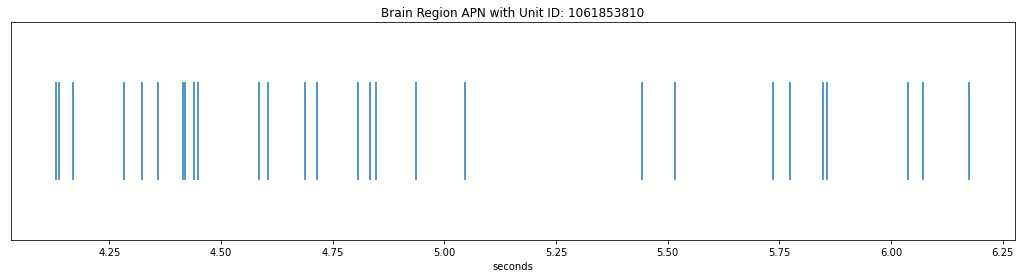

In [9]:
util.plot_unit_spikes(1061853810, spike_times, 6, session)

[[ 0.        2.17815   1.83729  ... -4.041765 -4.03455  -2.351895]
 [ 0.        1.245075  2.311335 ... -2.211885 -3.53925  -1.399125]
 [ 0.       -0.256035  1.0686   ... -4.374045 -4.27869  -3.94914 ]
 ...
 [ 0.        0.104715  0.649155 ... -0.19773  -0.912405 -1.197105]
 [ 0.        0.727935 -0.435825 ... -0.64311  -0.51753  -1.45782 ]
 [ 0.        0.502125  0.04797  ...  0.25038  -0.382395 -0.58773 ]]


81

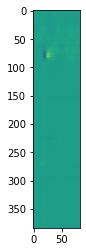

In [10]:
waveforms = session.mean_waveforms
# skipping waveforms !
waveform = waveforms[1061853810]
print(waveform)
waveform.shape

# get waveform
unit_waveform = waveforms[1061853810]

# get shape
unit_waveform.shape

plt.imshow(unit_waveform)

# relevant section of the probe. We can use the column `probe_channel_number` to get the index of the channel on the probe where the waveform has the largest amplitude.
peak_channel = units.loc[1061853810]['probe_channel_number']
peak_channel

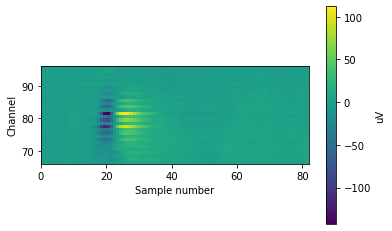

In [11]:
fig, ax = plt.subplots()
im = ax.imshow(unit_waveform[peak_channel-15:peak_channel+15], origin='lower', 
               extent=[0, 82, peak_channel-15, peak_channel+15])
ax.set_xlabel('Sample number')
ax.set_ylabel('Channel')
plt.colorbar(im, label='uV')

Text(0, 0.5, 'uV')

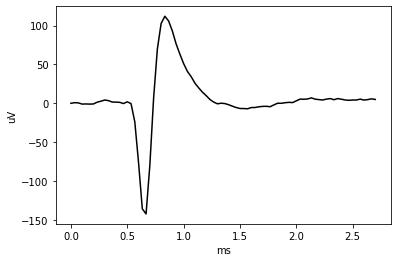

In [12]:
# print(units.loc[1061853810][['waveform_duration', 'PT_ratio', 'amplitude']])

# Now let's plot the 1D waveform on the peak channel for this unit. We'll convert the x-axis units from samples to time (remember the sampling rate was 30 kHz). Compare what you see in this plot to the waveform metrics in the units table for this unit.

#now get the waveform on this channel
unit_peak_waveform = unit_waveform[peak_channel]

#make a time vector for your x axis
waveform_time = np.arange(unit_peak_waveform.size)/30.

#now plot the waveform
fig, ax = plt.subplots()
ax.plot(waveform_time, unit_peak_waveform, 'k')
ax.set_xlabel('ms')
ax.set_ylabel('uV')

In [13]:
trials = session.trials
trials.head()

start_time  stop_time initial_image_name change_image_name  \
trials_id                                                               
0            25.20983   26.19343            im104_r           im104_r   
1            26.71046   28.34528            im104_r           im104_r   
2            28.96234   32.73245            im104_r           im104_r   
3            33.46618   35.85175            im104_r           im104_r   
4            36.46863   39.62138            im104_r           im104_r   

           is_change  change_time_no_display_delay     go  catch  \
trials_id                                                          
0              False                           NaN  False  False   
1              False                           NaN  False  False   
2              False                           NaN  False  False   
3              False                           NaN  False  False   
4              False                           NaN  False  False   

                     lick_times  response_time  reward_time  reward_volume  \
trials_id                                                                    
0          [25.72637, 25.87602]            NaN          NaN            0.0   
1                    [28.02817]            NaN          NaN            0.0   
2                    [32.39844]            NaN          NaN            0.0   
3                    [35.53463]            NaN          NaN            0.0   
4          [39.15441, 39.28716]            NaN          NaN            0.0   

             hit  false_alarm   miss  correct_reject  aborted  auto_rewarded  \
trials_id                                                                      
0          False        False  False           False     True          False   
1          False        False  False           False     True          False   
2          False        False  False           False     True          False   
3          False        False  False           False     True          False   
4          False        False  False           False     True          False   

           change_frame  trial_length  
trials_id                              
0                   NaN       0.98360  
1                   NaN       1.63482  
2                   NaN       3.77011  
3                   NaN       2.38557  
4                   NaN       3.15275

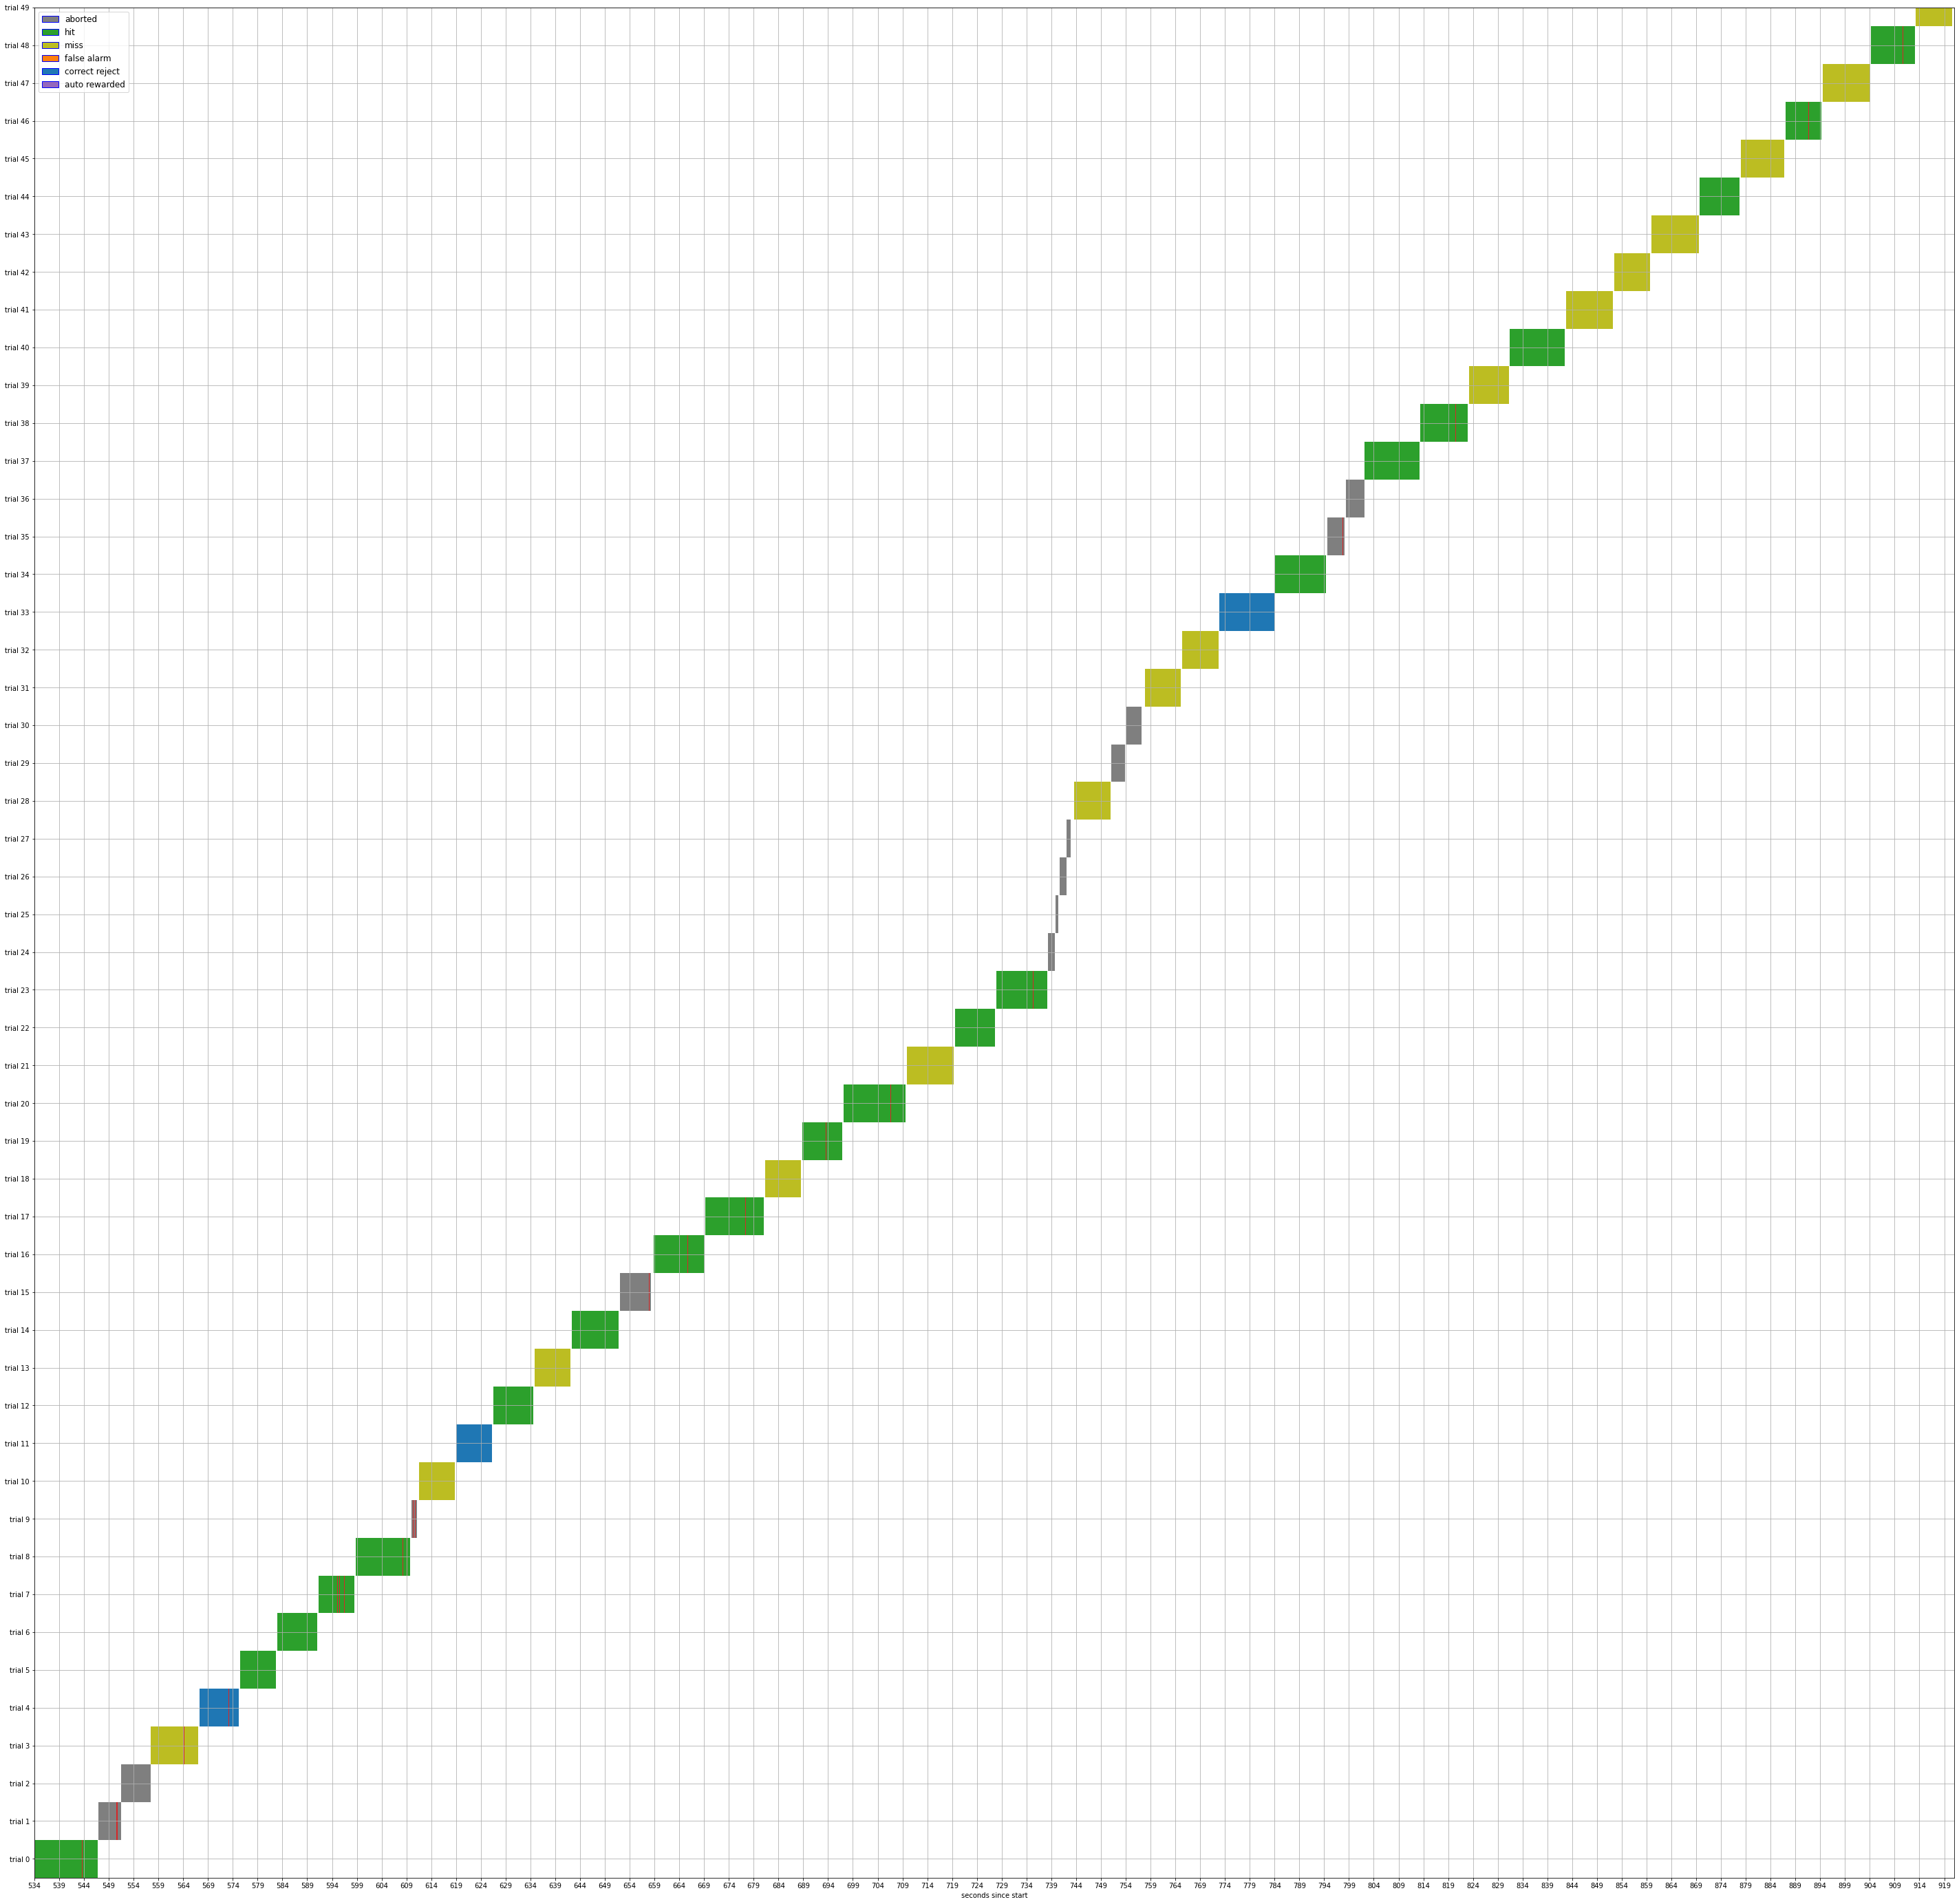

In [14]:
plot_trials_chron(trials[100:150])

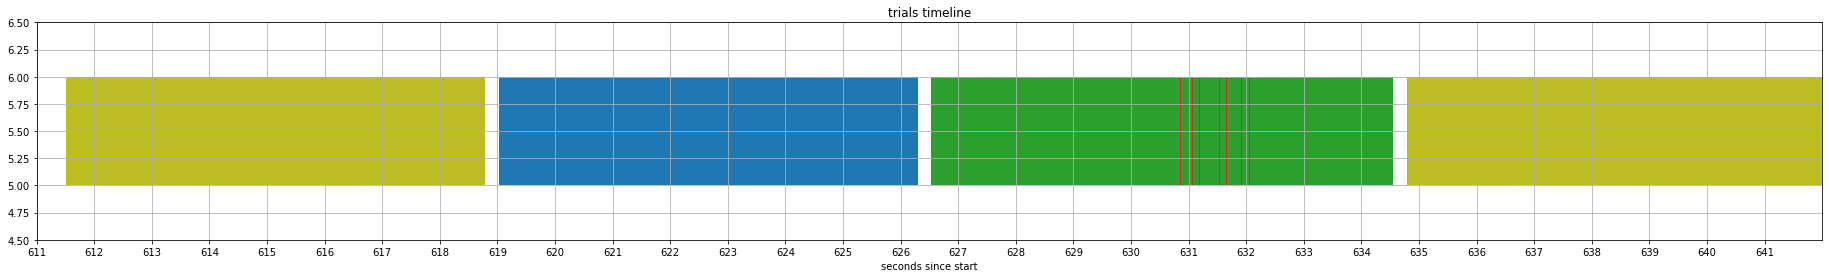

In [15]:
plot_trials_timeline(trials[110:114])

In [14]:
trials.iloc[49]

start_time                       212.1154
stop_time                       219.40483
initial_image_name                im034_r
change_image_name                 im111_r
is_change                            True
change_time_no_display_delay    215.13478
go                                   True
catch                               False
lick_times                             []
response_time                         NaN
reward_time                           NaN
reward_volume                         0.0
hit                                 False
false_alarm                         False
miss                                 True
correct_reject                      False
aborted                             False
auto_rewarded                       False
change_frame                      11446.0
trial_length                      7.28943
Name: 49, dtype: object

In [15]:
change_trials = trials[trials.is_change]
#Get the change frames for these trials
change_frames = change_trials.change_frame.values

#Find the flashes in the stimulus_presentations table that started on these frames
change_flashes = stimulus_presentations[np.isin(stimulus_presentations.start_frame, change_frames)]


#Get the display start times for these flashes
change_times = change_flashes.start_time
change_times

stimulus_presentations_id
26        44.770720
52        64.287019
74        80.800805
125      119.082772
139      129.591550
           ...     
4674    3534.188989
4716    3565.732053
4750    3591.253417
4771    3607.033288
4781    3614.539574
Name: start_time, Length: 298, dtype: float64

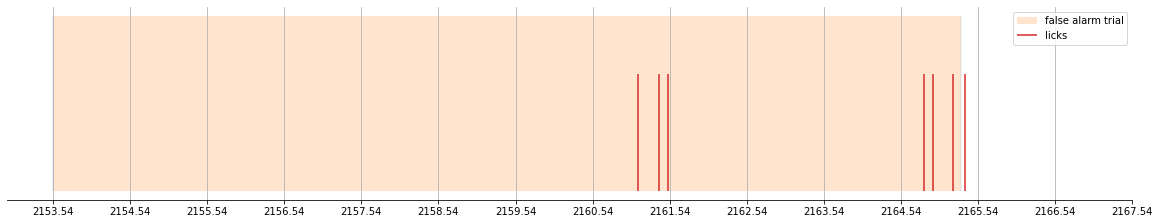

In [16]:
plot_one_trial(trials.iloc[303], (16, 3), dense_view=True)

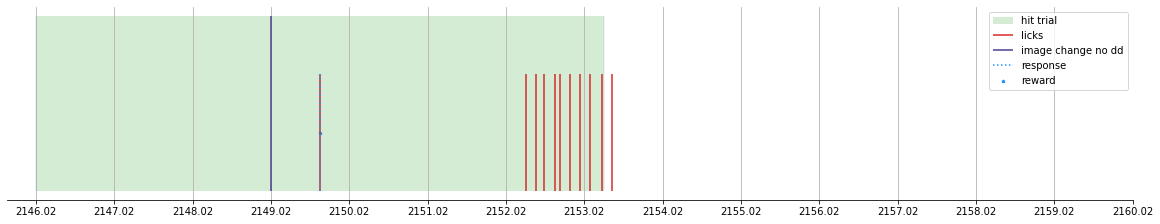

In [19]:
plot_one_trial(trials.iloc[302], (16, 3), dense_view=True)

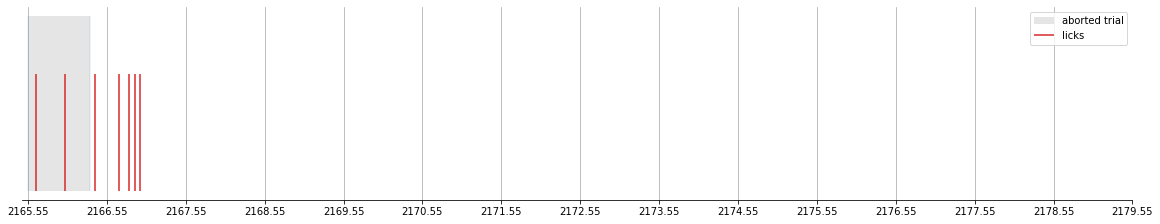

In [20]:
plot_one_trial(trials.iloc[304], (16, 3), dense_view=True)

In [21]:
max_trial_length = max(trials.trial_length)

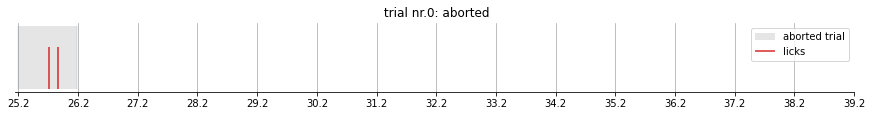

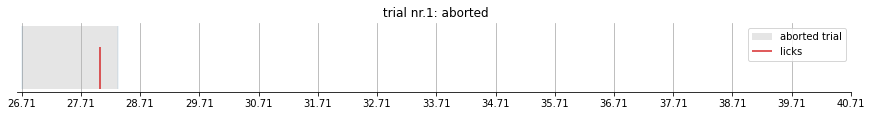

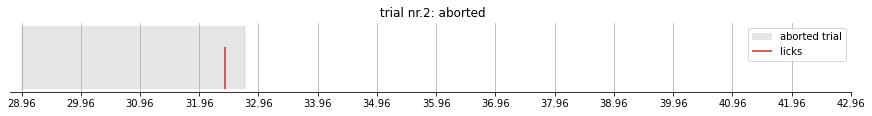

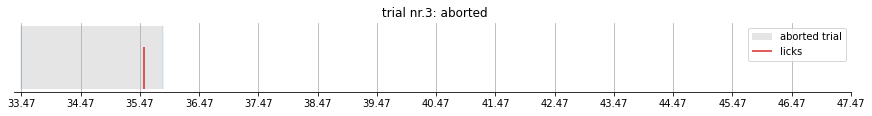

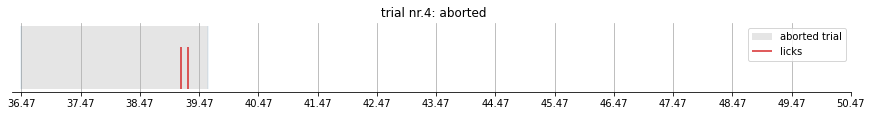

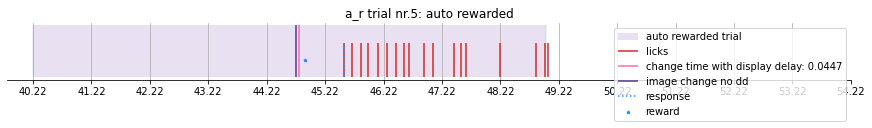

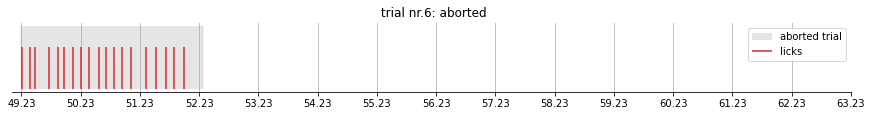

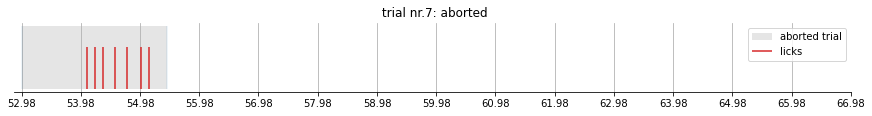

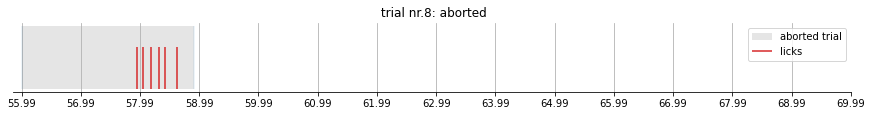

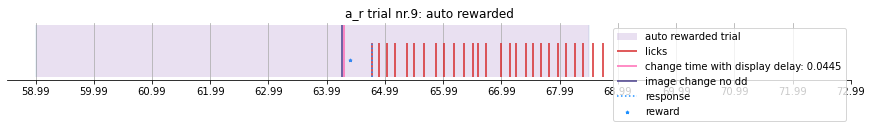

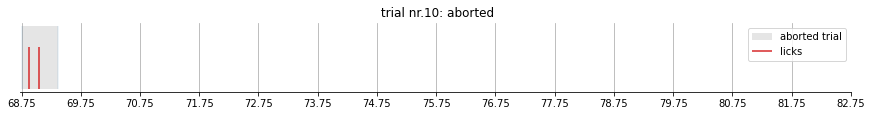

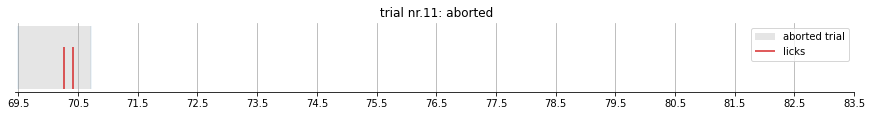

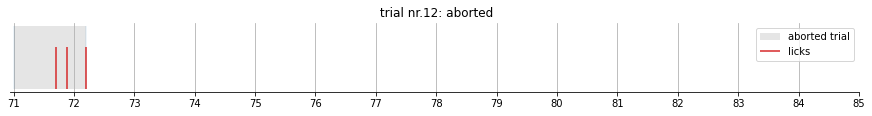

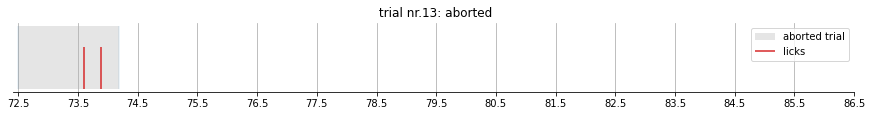

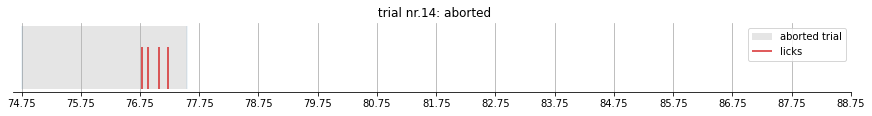

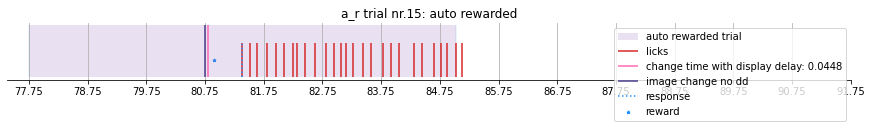

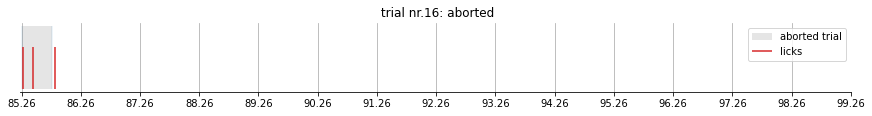

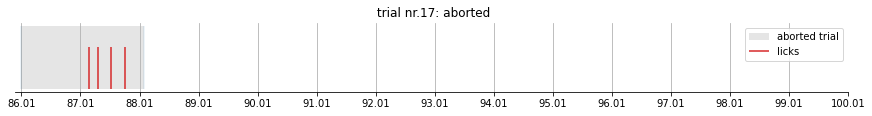

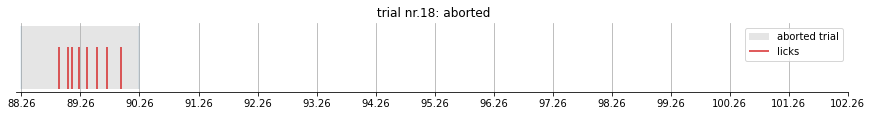

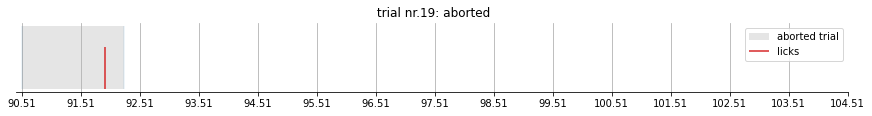

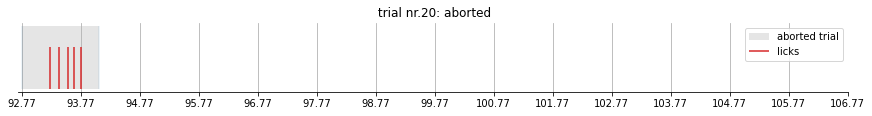

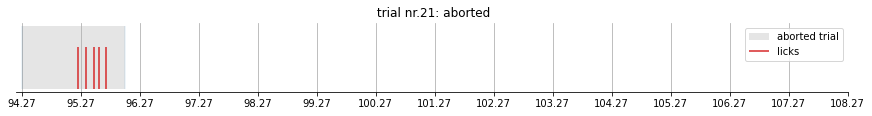

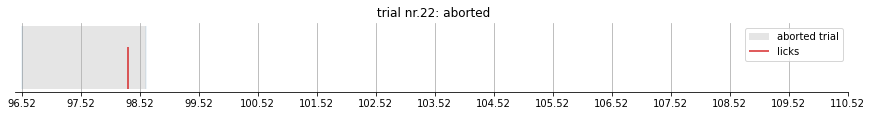

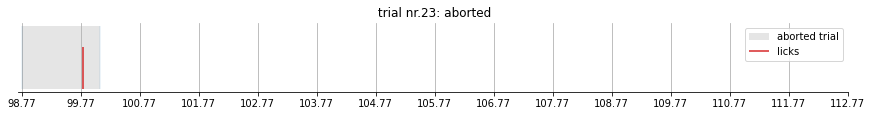

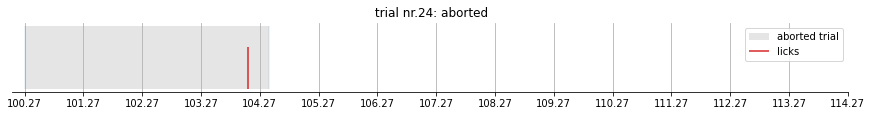

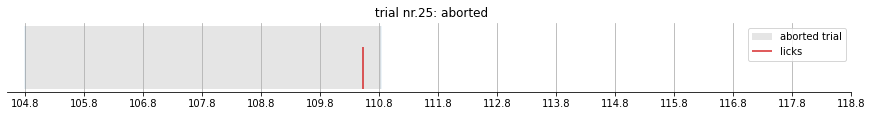

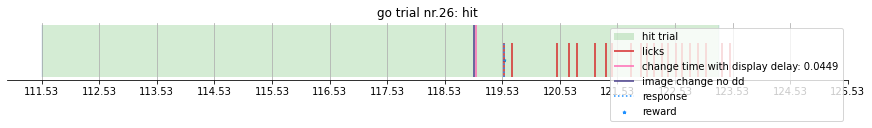

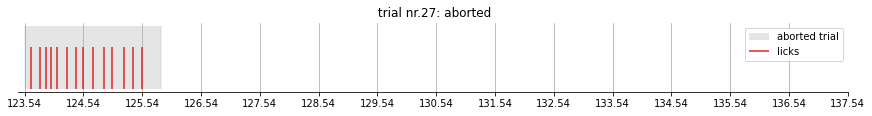

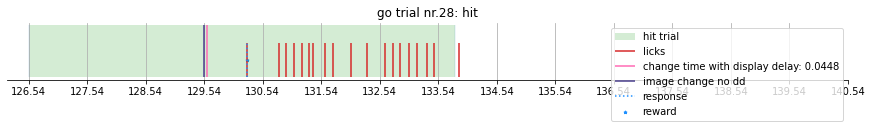

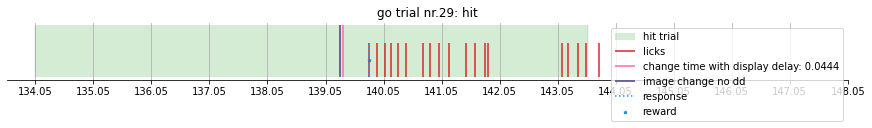

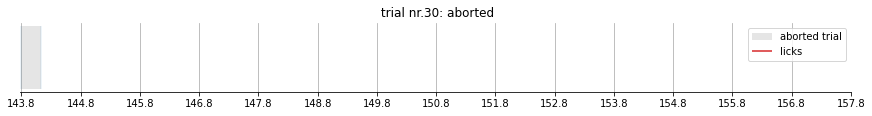

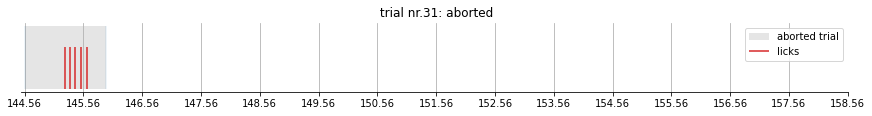

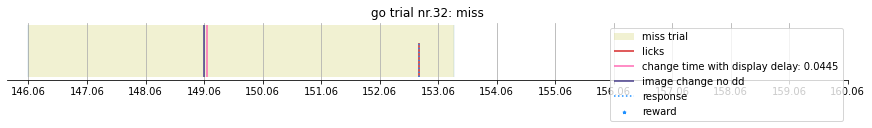

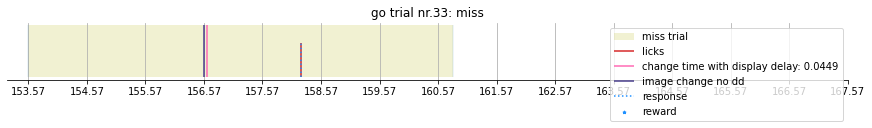

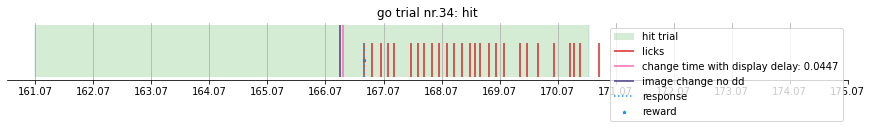

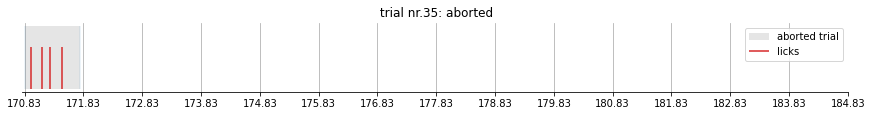

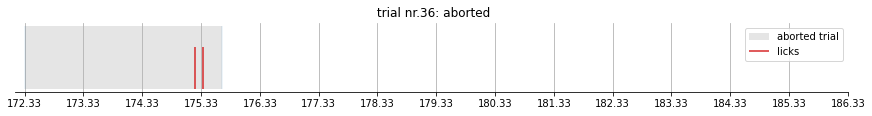

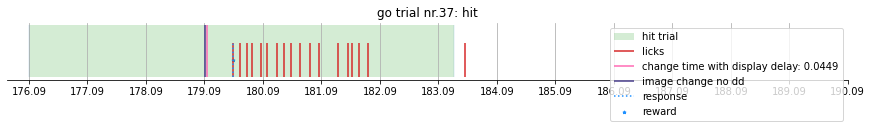

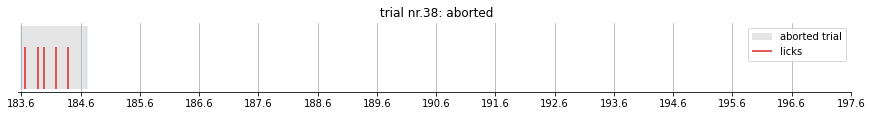

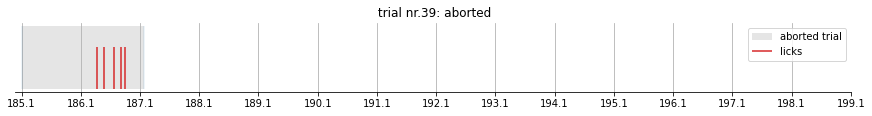

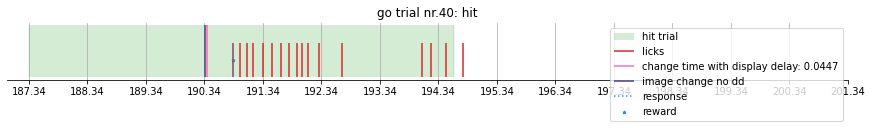

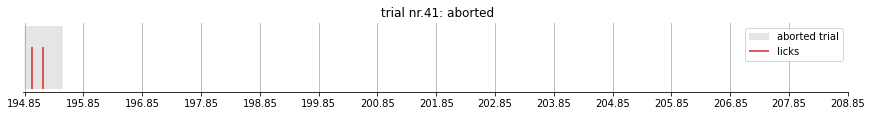

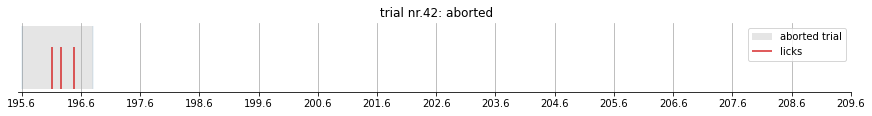

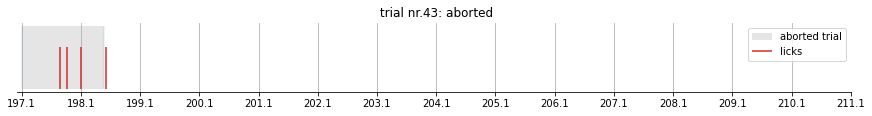

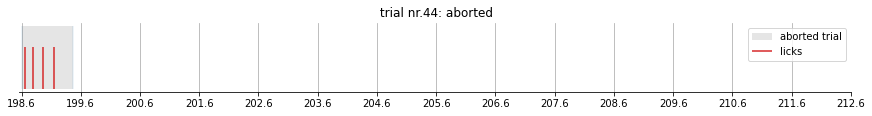

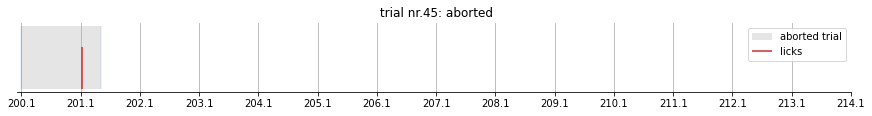

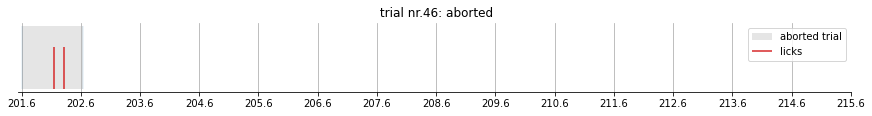

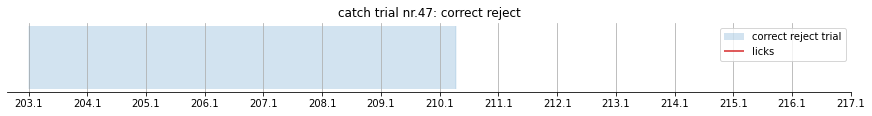

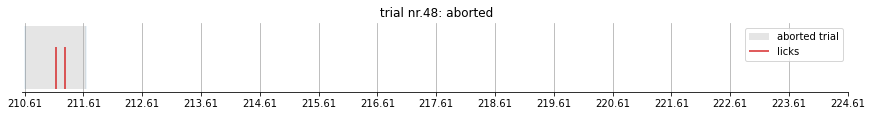

/Users/kiracordes/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


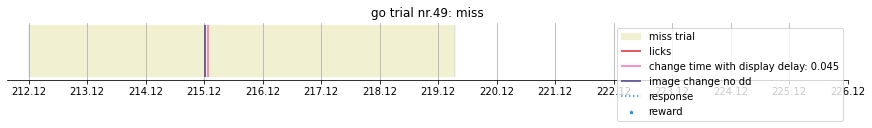

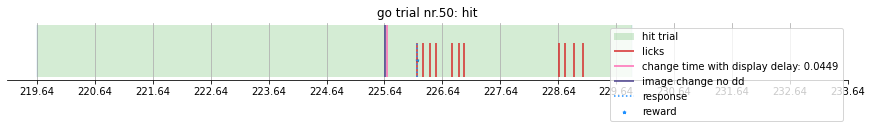

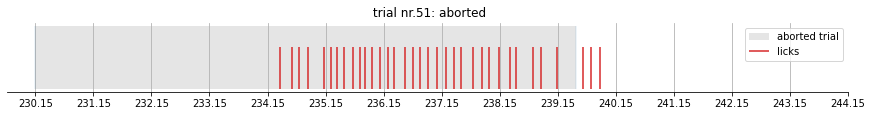

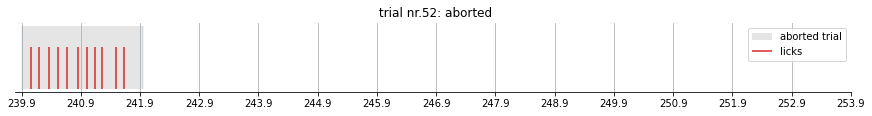

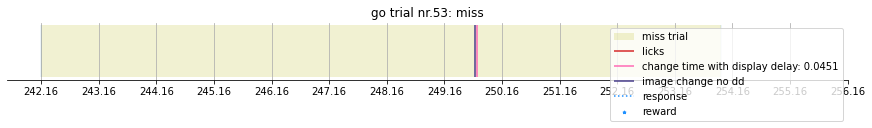

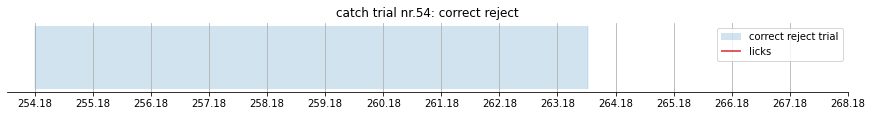

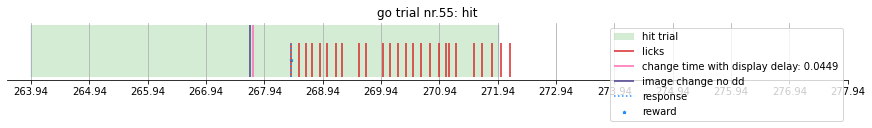

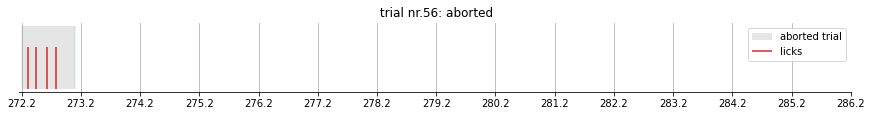

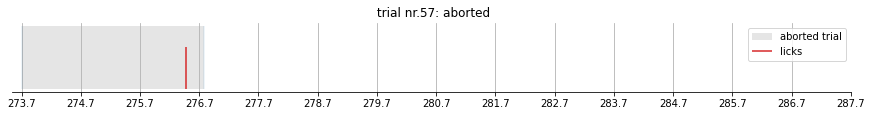

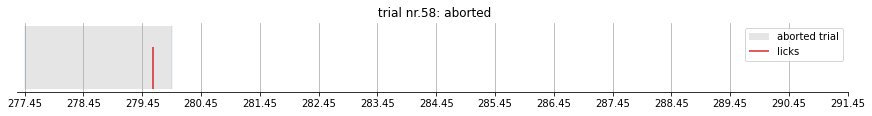

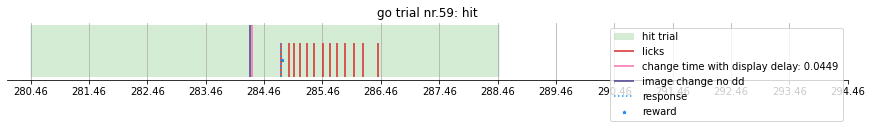

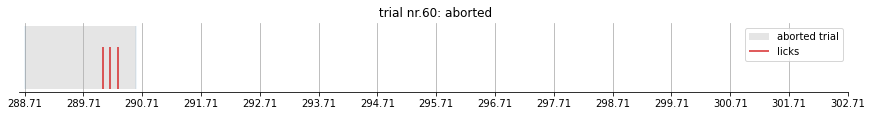

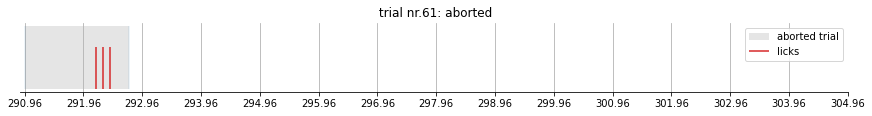

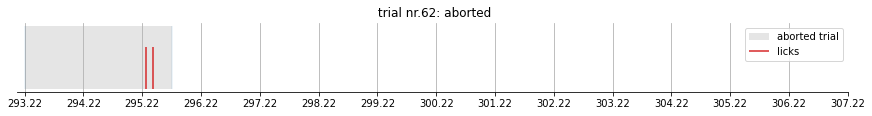

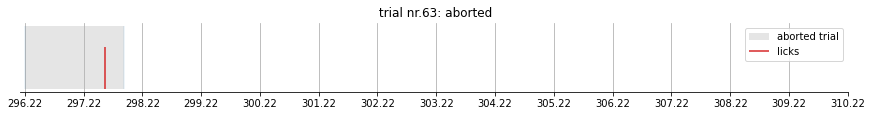

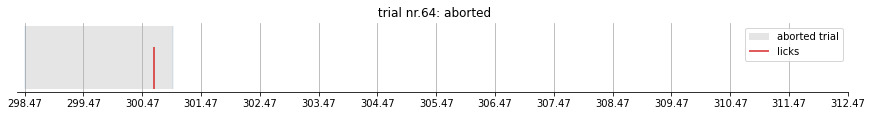

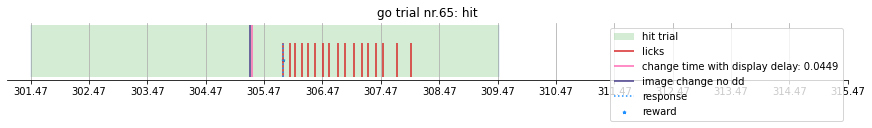

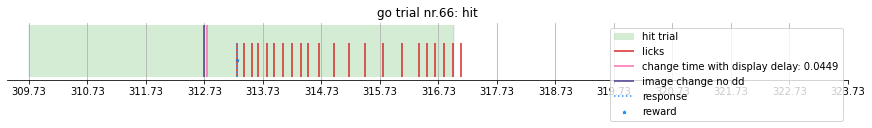

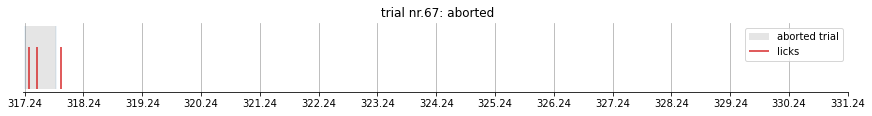

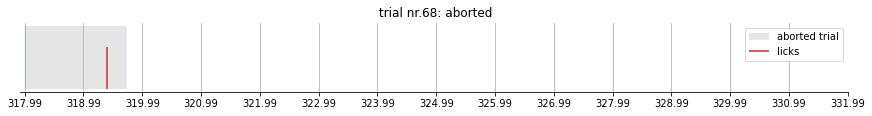

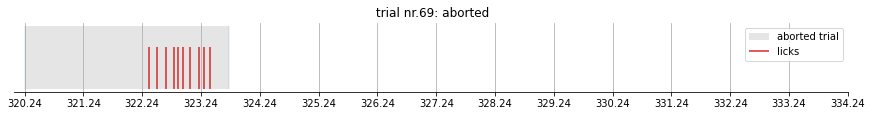

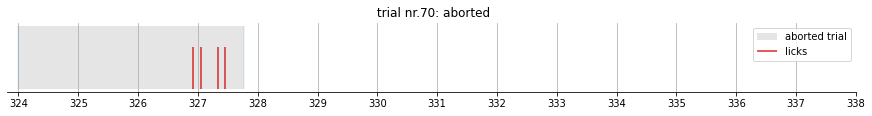

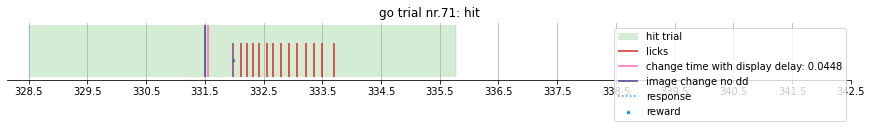

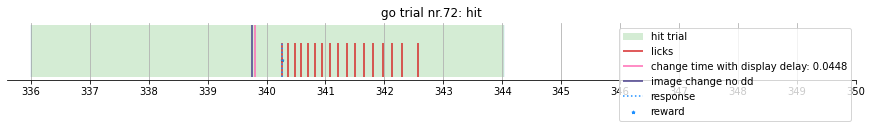

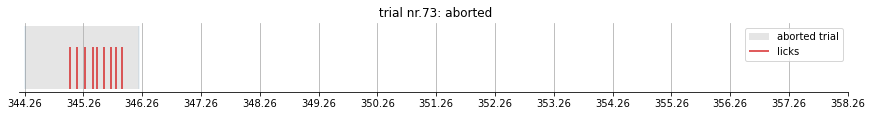

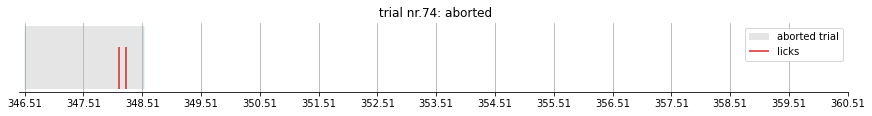

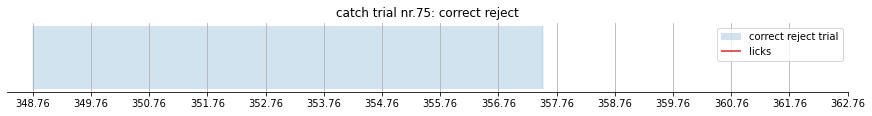

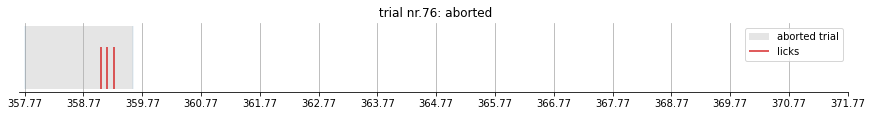

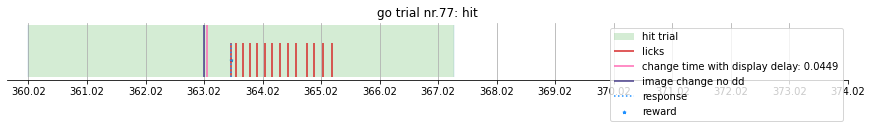

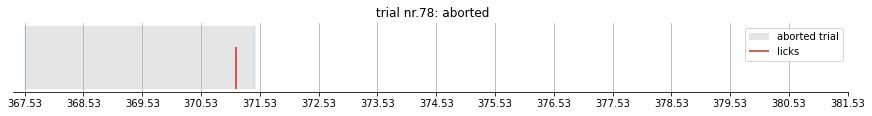

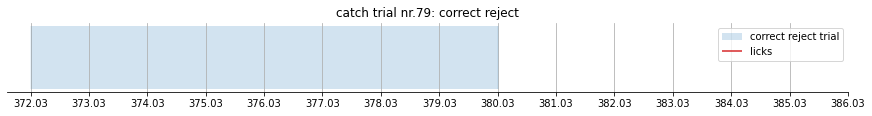

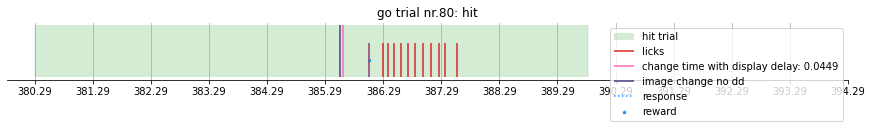

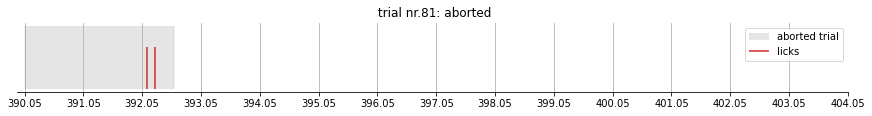

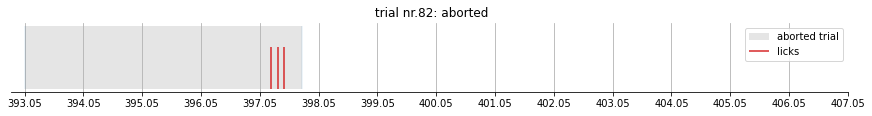

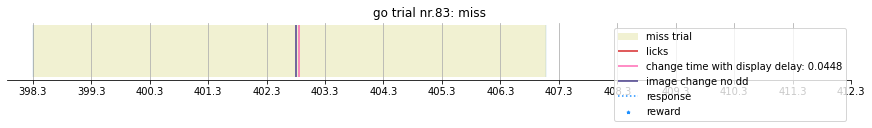

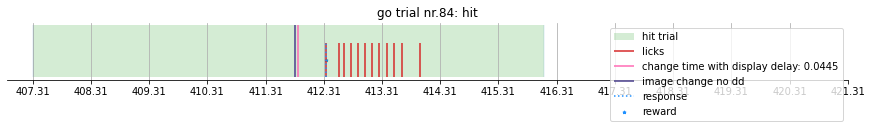

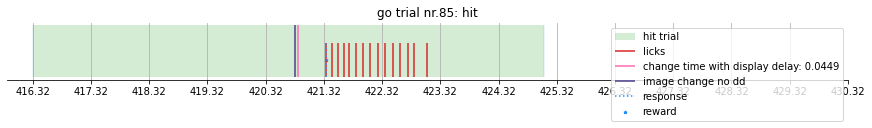

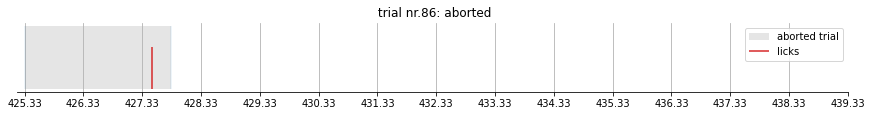

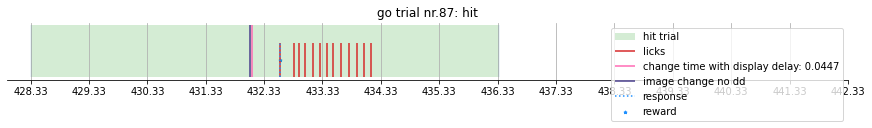

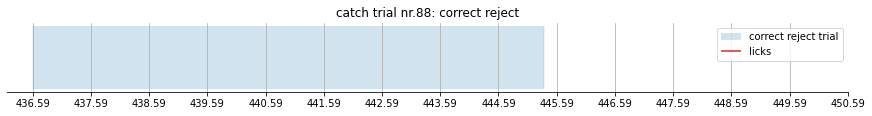

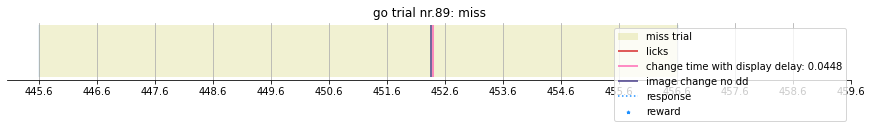

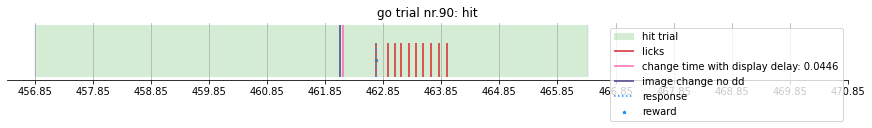

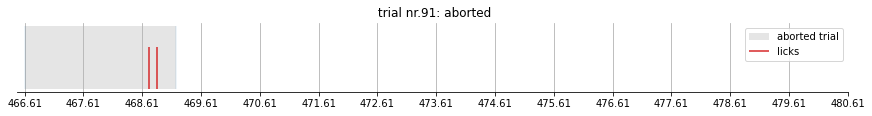

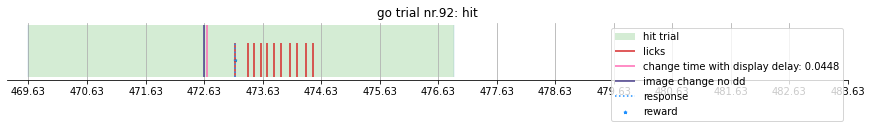

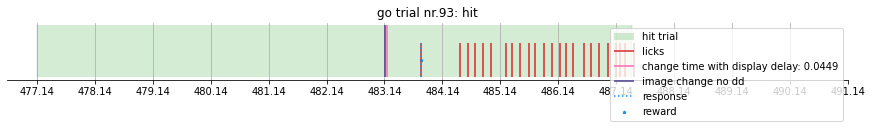

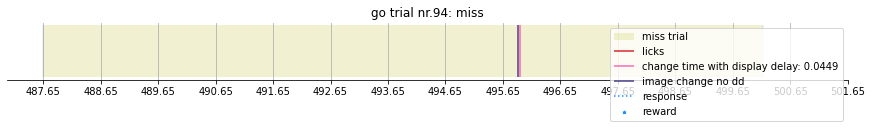

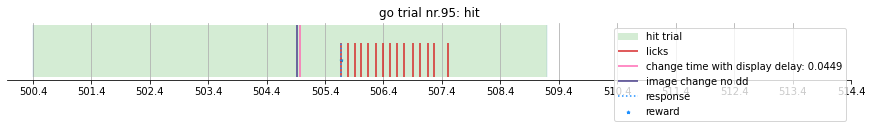

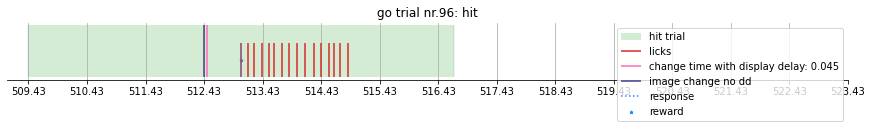

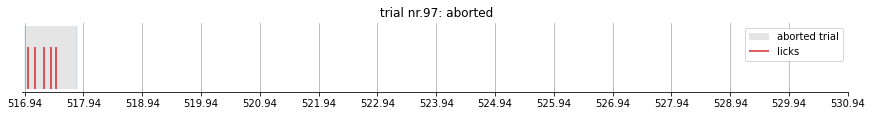

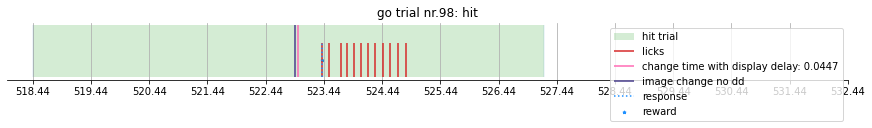

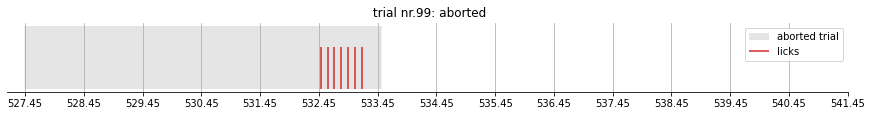

In [22]:
util.plot_all_trials(trials, change_times, 100, length=max_trial_length, size=(12, 1.5), dense_view=False)

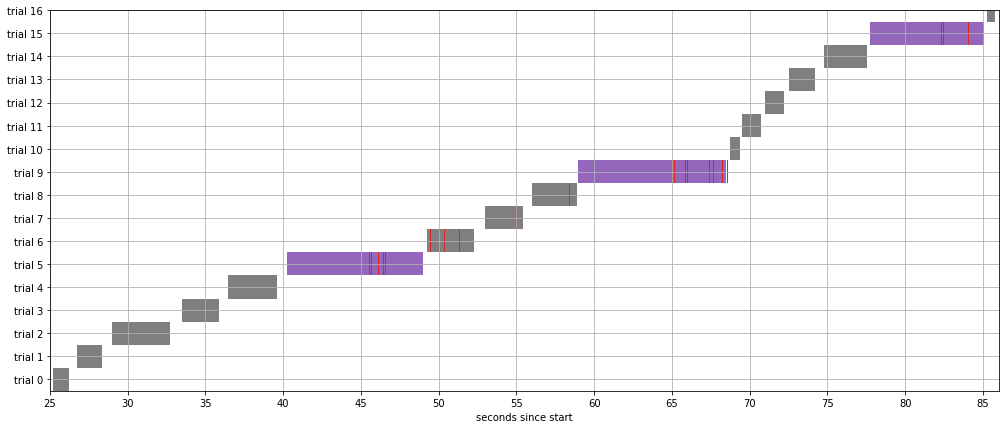

In [23]:
util.horizontal_bar_plot_trials(trials)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

## Putting it all together to make a change-triggered PSTH for hit trials

#### Understanding the Peri-stimulus-time histogram
<img src=https://neuronaldynamics.epfl.ch/online/x187.png>

K is the number of trials   
&Delta;t is the time bin width  
n<sub>k</sub>(t; t + &Delta;t) is the total count of spikes across trials in that time bin

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Let's make a PSTH aligned on the change times for the first 20 hit trials. To find these times, we'll need to combine information from the trials table and the stimulus_presentations table as follows:
        <p>1) Get the first 20 hit trials from the trials dataframe.
        <p>2) Find what stimulus frame the change for these trials occurred on.
        <p>3) Find the flashes (rows) in the stimulus_presentations table that started on these same frames (use the <code>start_frame</code> column).
    <p>4) Get the <code>start_time</code> for these flashes. These are the times we're looking for.
</div>

In [17]:
# grab the first 20 hit trials. To do this we'll use iloc to index the trials dataframe by position
first_20_hits = trials[trials.hit].iloc[:20]
first_20_miss = trials[trials.miss].iloc[:20]
first_20_hits.head()

start_time  stop_time initial_image_name change_image_name  \
trials_id                                                               
26          111.53134  123.29171            im111_r           im104_r   
28          126.54407  133.83337            im104_r           im005_r   
29          134.05003  143.57470            im005_r           im034_r   
34          161.07253  170.61417            im111_r           im034_r   
37          176.08527  183.35841            im034_r           im087_r   

           is_change  change_time_no_display_delay    go  catch  \
trials_id                                                         
26              True                     119.03784  True  False   
28              True                     129.54671  True  False   
29              True                     139.30535  True  False   
34              True                     166.32763  True  False   
37              True                     179.08806  True  False   

                                                  lick_times  response_time  \
trials_id                                                                     
26         [119.55534, 119.70437, 120.48827, 120.68841, 1...      119.55534   
28         [130.28088, 130.81353, 130.94707, 131.0805, 13...      130.28088   
29         [139.80542, 139.93793, 140.07157, 140.17142, 1...      139.80542   
34         [166.74467, 166.87711, 167.02716, 167.14395, 1...      166.74467   
37         [179.57194, 179.68808, 179.80451, 179.90462, 1...      179.57194   

           reward_time  reward_volume   hit  false_alarm   miss  \
trials_id                                                         
26           119.55534          0.003  True        False  False   
28           130.28088          0.003  True        False  False   
29           139.80542          0.003  True        False  False   
34           166.74467          0.003  True        False  False   
37           179.57194          0.003  True        False  False   

           correct_reject  aborted  auto_rewarded  change_frame  trial_length  
trials_id                                                                      
26                  False    False          False        5685.0      11.76037  
28                  False    False          False        6315.0       7.28930  
29                  False    False          False        6900.0       9.52467  
34                  False    False          False        8520.0       9.54164  
37                  False    False          False        9285.0       7.27314

In [18]:
first_20_hit_change_times = util.get_real_change_times(first_20_hits, stimulus_presentations)
first_20_miss_change_times = util.get_real_change_times(first_20_miss, stimulus_presentations)

first_20_miss_change_times

array([149.10787492, 156.61412914, 215.17976062, 249.72531554,
       402.85338769, 452.39484042, 495.94793384, 562.77049018,
       614.56379744, 637.83326146, 684.372206  , 715.1479345 ,
       746.67427978, 760.93624877, 768.44249017, 826.9914396 ,
       848.02571093, 855.53198092, 865.29016202, 882.55457614])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now that we have our change times, we're almost ready to make our PSTH. Next we need to get spike times for a good unit. To start out, let's filter our units dataframe for 'good' units, based on the following criteria:
    <p> &emsp; a) <code>quality</code> == 'good'
            <p> &emsp; b) <code>firing_rate</code> > 1 Hz
            <p> &emsp; c) <code>snr</code> > 1
            <p> &emsp; d) <code>isi_violations</code> < 1
                                                         
Then we'll grab an example unit from this curated list
</div>

In [19]:
# Filter units by the quality criteria
good_units = units[(units['quality']=='good') &
                   (units['firing_rate']>1) &
                   (units['snr']>1) &
                   (units['isi_violations']<1)]

In [20]:
len(good_units)

987

In [21]:
# Grab an example V1 unit id from good_units
v1_unit_id = good_units[good_units['structure_acronym']=='VISp'].index.values[0] #just take the first one

In [22]:
def makePSTH(spikes, startTimes, windowDur, binSize=0.001):
    '''
    Convenience function to compute a peri-stimulus-time histogram
    (see section 7.2.2 here: https://neuronaldynamics.epfl.ch/online/Ch7.S2.html)
    INPUTS:
        spikes: spike times in seconds for one unit
        startTimes: trial start times in seconds; the first spike count 
            bin will be aligned to these times
        windowDur: trial duration in seconds
        binSize: size of spike count bins in seconds
    OUTPUTS:
        Tuple of (PSTH, bins), where:
            PSTH gives the trial-averaged spike rate for 
                each time bin aligned to the start times;
            bins are the bin edges as defined by numpy histogram
    '''
    bins = np.arange(0,windowDur+binSize,binSize)
    counts = np.zeros(bins.size-1)
    for start in startTimes:
        startInd = np.searchsorted(spikes, start)
        endInd = np.searchsorted(spikes, start+windowDur)
        counts = counts + np.histogram(spikes[startInd:endInd]-start, bins)[0]
    
    counts = counts/len(startTimes)
    return counts/binSize, bins[:-1]

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    <p><b>Task 4.2:</b> Plot a PSTH for one VISp unit aligned to the change times for the first 20 hit trials.  
        <p>1) Get the spike times for this unit
        <p>2) Call <code>makePSTH</code> to make a PSTH for this unit aligned to <code>first_20_hit_change_times</code>. Use a <code>binSize</code> of 10 ms (0.01) and a <code>windowDur</code> of 1 second.
        <p>3) Plot the PSTH. What do you make of it? When is this neuron active?

</div>

In [30]:
# first 10 spike times for this v1_unit
spike_times[v1_unit_id][:10]

array([4.06276121, 4.08542782, 4.93582604, 5.35675849, 6.0825903 ,
       6.1968234 , 6.3992563 , 6.61755585, 6.90092192, 7.80695335])

In [31]:
# Get the spike times for this unit
unit_spike_times = spike_times[v1_unit_id]

In [32]:
# trial_duration = first_20_hits.trial_length.values
# isn't needed

In [33]:
# Compute the PSTH
unit_psth, bins = makePSTH(unit_spike_times, first_20_hit_change_times, 1, 0.01)

In [34]:
print(bins)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


<function matplotlib.pyplot.show(close=None, block=None)>

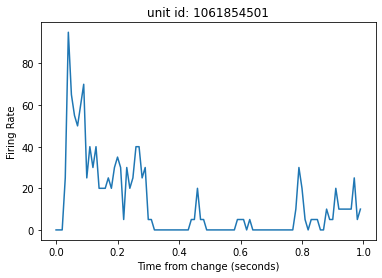

In [35]:
# Plot the PSTH
plt.plot(bins, unit_psth)
plt.xlabel('Time from change (seconds)')
plt.ylabel('Firing Rate')
plt.title(f'unit id: {v1_unit_id}')

plt.show

In [36]:
def plot20unitsPSTH(trial_start_times, units=None, windowDur=1, binSize=0.01, title='', layered=None, label=''):
    '''
    plots 20 PSTHs for different units at once with given change times
    INPUTS:
        units: optional, the 20 unit ids we'd like to see plotted, by default takes the first 20 'good' VISps
        trial_start_times: trial start times in seconds; the first spike count 
                            bin will be aligned to these times
        windowDur: trial duration in seconds -> PSTH argument
        binSize: size of spike count bins in seconds -> PSTH argument
    OUTPUTS:
        PSTH Diagrams for 20 units
    '''
    if units==None:
        units = good_units[good_units['structure_acronym']=='VISp'].index.values[:20] #just take the first twenty good VISp units
        
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(21,9), sharex=True, sharey=True)
    for i, ax in enumerate(axes.flatten()):
        unit_id = units[i]
        
        # get spike times of iths unit
        unit_spike_times = spike_times[unit_id]
        
        # Compute the PSTH
        unit_psth, bins = makePSTH(unit_spike_times, trial_start_times, windowDur, binSize)
        
        if layered is not None:
            other_unit_psth, other_bins = makePSTH(unit_spike_times, layered, windowDur, binSize)
            ax.plot(other_bins, other_unit_psth, label='miss', alpha=0.7)
            #ax.plot(other_bins, np.abs(unit_psth - other_unit_psth), label='diff', alpha=0.5)
            
        
        ax.plot(bins, unit_psth, label=label, alpha=0.9)
        ax.set_title(f'unit id: {unit_id}')
        #ax.set_xticks(df.iloc[:,0]) 
        ax.legend()
    
    fig.suptitle(f'{title} trials PSTH (averaged spike times per unit)', fontsize=26)
    
    
    plt.show()

        

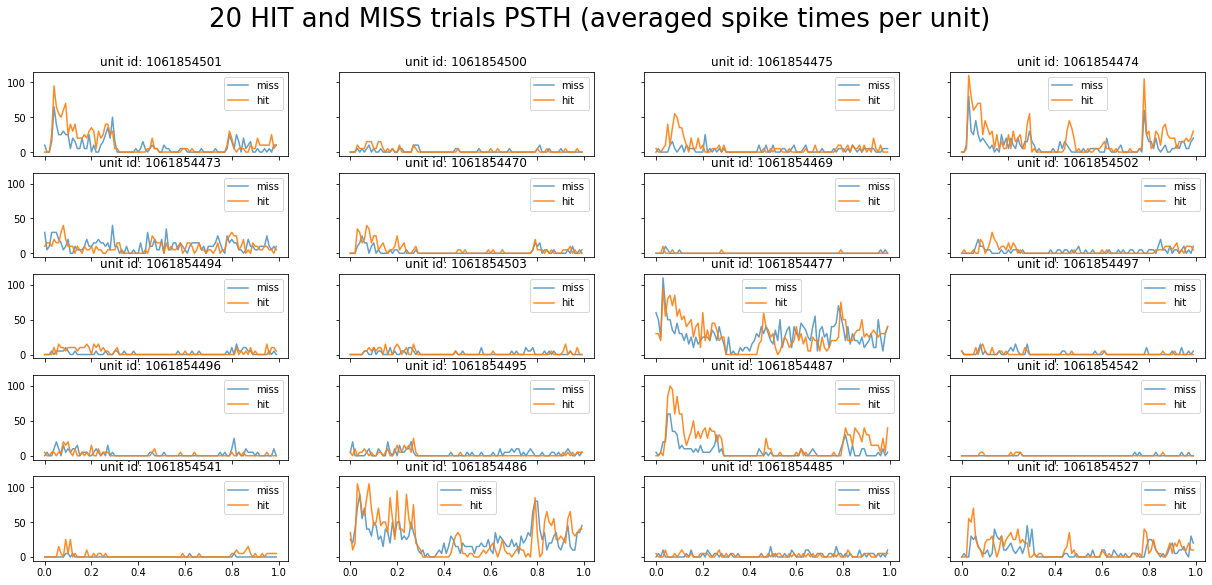

In [37]:
plot20unitsPSTH(first_20_hit_change_times, title='20 HIT and MISS', layered=first_20_miss_change_times, label='hit')


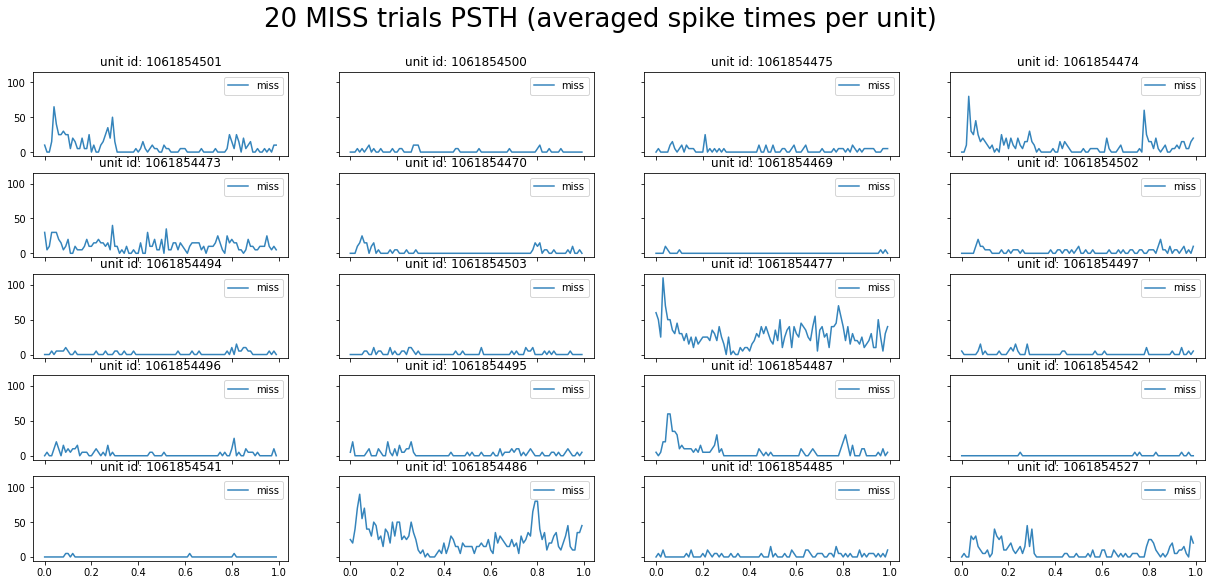

In [38]:
plot20unitsPSTH(first_20_miss_change_times, title='20 MISS', label='miss')

plot all psths over time:
for a fix picture -> all trials 
hypothesis: the same picture results in similar activity

([], [])

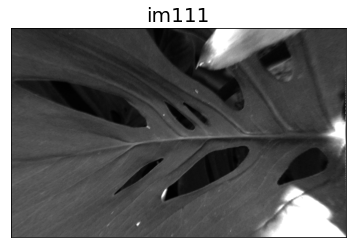

In [30]:
# im111_r:
plt.imshow(np.abs(session.stimulus_templates.iloc[6].warped), cmap='gray',vmin=0,vmax=255)
plt.title('im111', fontsize=20)
plt.xticks([])
plt.yticks([])

In [40]:
# get trials with same picture
change_trials = trials[trials.is_change]
im111_trials = change_trials[change_trials.change_image_name == 'im111_r']
im111_hit_trials = im111_trials[im111_trials.hit == True] #5
im111_miss_trials = im111_trials[im111_trials.miss == True] #32
im111_trials.tail()
# 38 total

start_time   stop_time initial_image_name change_image_name  \
trials_id                                                                
472        3100.19740  3111.20671            im005_r           im111_r   
508        3260.86492  3270.38998            im114_r           im111_r   
531        3350.97398  3358.99730            im024_r           im111_r   
536        3371.24091  3378.49694            im005_r           im111_r   
569        3505.61995  3515.91206            im104_r           im111_r   

           is_change  change_time_no_display_delay    go  catch  \
trials_id                                                         
472             True                    3106.95334  True  False   
508             True                    3266.11982  True  False   
531             True                    3354.72777  True  False   
536             True                    3374.24368  True  False   
569             True                    3511.62538  True  False   

                                                  lick_times  response_time  \
trials_id                                                                     
472                                                       []            NaN   
508        [3266.47047, 3266.56937, 3266.68618, 3266.7862...     3266.47047   
531                                                       []            NaN   
536                                                       []            NaN   
569        [3512.0594, 3512.20855, 3512.30836, 3512.40889...     3512.05940   

           reward_time  reward_volume    hit  false_alarm   miss  \
trials_id                                                          
472                NaN          0.000  False        False   True   
508         3266.47047          0.003   True        False  False   
531                NaN          0.000  False        False   True   
536                NaN          0.000  False        False   True   
569         3512.05940          0.003   True        False  False   

           correct_reject  aborted  auto_rewarded  change_frame  trial_length  
trials_id                                                                      
472                 False    False          False      184807.0      11.00931  
508                 False    False          False      194349.0       9.52506  
531                 False    False          False      199661.0       8.02332  
536                 False    False          False      200831.0       7.25603  
569                 False    False          False      209067.0      10.29211

In [41]:
# get the actual change times
im111_change_times = util.get_real_change_times(im111_trials, stimulus_presentations)
im111_hit_change_times = util.get_real_change_times(im111_hit_trials, stimulus_presentations)
im111_miss_change_times = util.get_real_change_times(im111_miss_trials, stimulus_presentations)

im111_change_times

array([  80.80080453,  156.61412914,  215.17976062,  249.72531554,
        452.39484042,  495.94793384,  637.83326146,  882.55457614,
        950.12776274, 1248.96094565, 1279.73669851, 1298.50239811,
       1314.26556897, 1363.80699468, 1411.84716468, 1498.93663369,
       1543.22369529, 1628.0612719 , 1682.890442  , 1876.5690457 ,
       1953.90035827, 2107.02840029, 2218.88858492, 2270.69859439,
       2317.23750029, 2371.28269096, 2425.32789112, 2451.61655687,
       2594.98647558, 2609.99901614, 2936.58890598, 3013.92030013,
       3069.46676821, 3106.99818243, 3266.16468758, 3354.77218657,
       3374.28851103, 3511.67014845])

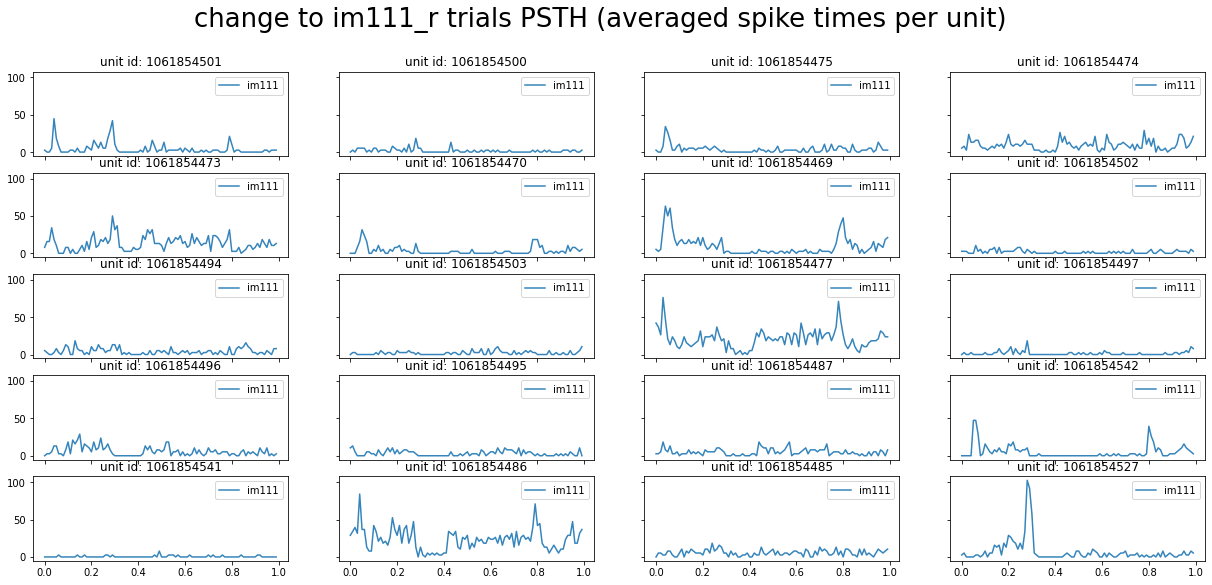

In [42]:
plot20unitsPSTH(im111_change_times, title='change to im111_r', label='im111')

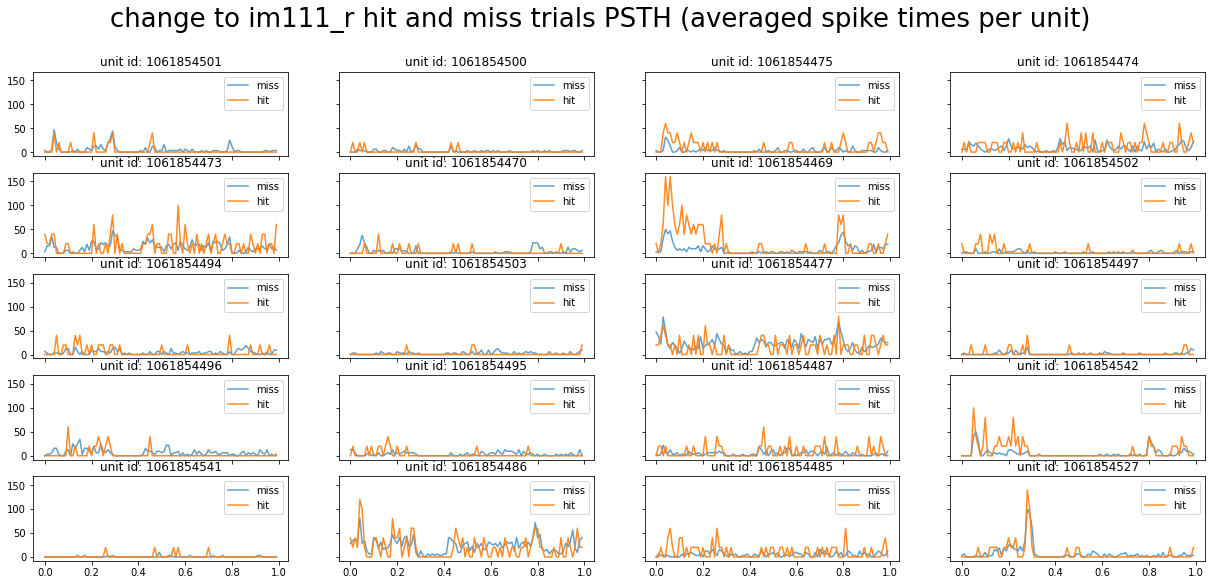

In [43]:
plot20unitsPSTH(im111_hit_change_times, title='change to im111_r hit and miss', label='hit', layered=im111_miss_change_times)

In [44]:
def plot20units_over_time(trial_start_times, units=None, windowDur=0.25, binSize=0.01, title='', layered=None, label=''):
    '''
    plots 20 PSTHs for different units at once with given change times
    INPUTS:
        units: optional, the 20 unit ids we'd like to see plotted, by default takes the first 20 'good' VISps
        trial_start_times: trial start times in seconds; the first spike count 
                            bin will be aligned to these times
        windowDur: trial duration in seconds -> PSTH argument
        binSize: size of spike count bins in seconds -> PSTH argument
    OUTPUTS:
        PSTH Diagrams for 20 units
    '''   
    if units==None:
        units = good_units[good_units['structure_acronym']=='VISp'].index.values[:20] #just take the first twenty good VISp units
        
    alpha_steps = 1/len(trial_start_times)    
        
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(21,9), sharex=True, sharey=True)
    for i, ax in enumerate(axes.flatten()):
        unit_id = units[i]
        
        # get spike times of iths unit
        unit_spike_times = spike_times[unit_id]
        
        unit_psth, bins = makePSTH(unit_spike_times, trial_start_times, windowDur, binSize)
        ax.plot(bins, unit_psth, label='psth', alpha=0.9)

        alph = 1.0
        for start_time in trial_start_times:
            sInd = np.searchsorted(unit_spike_times, start_time)
            eInd = np.searchsorted(unit_spike_times, start_time+windowDur)

            ax.vlines(unit_spike_times[sInd:eInd]-start_time, 0, 5, alpha=alph, colors=['r', 'g', 'b'])
            alph = alph - alpha_steps
        
        if layered is not None:
            other_unit_psth, other_bins = makePSTH(unit_spike_times, layered, windowDur, binSize)
            ax.plot(other_bins, other_unit_psth, label='miss', alpha=0.7)
            #ax.plot(other_bins, np.abs(unit_psth - other_unit_psth), label='diff', alpha=0.5)
            
        

        ax.set_title(f'unit id: {unit_id}')
        ax.legend()
    
    fig.suptitle(f'{title} trials PSTH (averaged spike times per unit)', fontsize=26)
    
    
    plt.show()

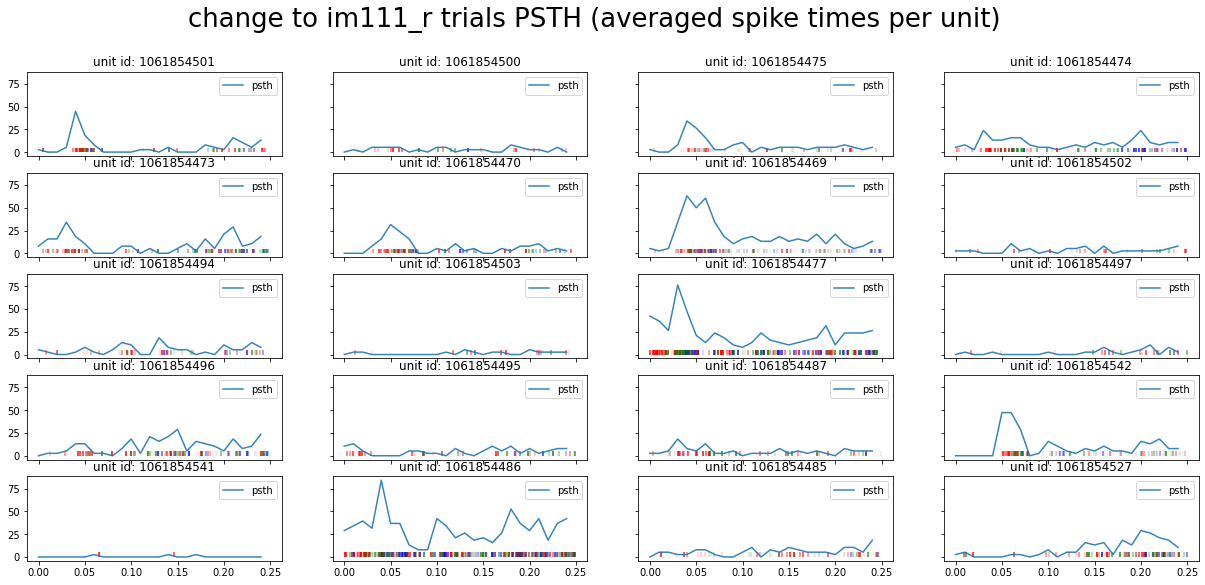

In [45]:
plot20units_over_time(im111_change_times, title='change to im111_r', label='im111')

In [31]:
stimulus_presentations.head(20)

active  color  contrast  duration  end_frame  \
stimulus_presentations_id                                                 
0                            True    NaN       NaN  0.250212         75   
1                            True    NaN       NaN  0.250212        120   
2                            True    NaN       NaN  0.250208        165   
3                            True    NaN       NaN  0.250207        210   
4                            True    NaN       NaN  0.250213        255   
5                            True    NaN       NaN  0.250213        300   
6                            True    NaN       NaN  0.250205        345   
7                            True    NaN       NaN       NaN        390   
8                            True    NaN       NaN  0.250205        435   
9                            True    NaN       NaN  0.250205        480   
10                           True    NaN       NaN  0.250213        525   
11                           True    NaN       NaN  0.250212        570   
12                           True    NaN       NaN  0.250205        615   
13                           True    NaN       NaN  0.250205        660   
14                           True    NaN       NaN  0.250207        705   
15                           True    NaN       NaN  0.250208        750   
16                           True    NaN       NaN  0.250212        795   
17                           True    NaN       NaN  0.250212        840   
18                           True    NaN       NaN  0.250208        885   
19                           True    NaN       NaN  0.250202        930   

                           flashes_since_change image_name  is_change  \
stimulus_presentations_id                                               
0                                           0.0    im104_r        0.0   
1                                           1.0    im104_r        0.0   
2                                           2.0    im104_r        0.0   
3                                           3.0    im104_r        0.0   
4                                           4.0    im104_r        0.0   
5                                           5.0    im104_r        0.0   
6                                           6.0    im104_r        0.0   
7                                           6.0    omitted        0.0   
8                                           7.0    im104_r        0.0   
9                                           8.0    im104_r        0.0   
10                                          9.0    im104_r        0.0   
11                                         10.0    im104_r        0.0   
12                                         11.0    im104_r        0.0   
13                                         12.0    im104_r        0.0   
14                                         13.0    im104_r        0.0   
15                                         14.0    im104_r        0.0   
16                                         15.0    im104_r        0.0   
17                                         16.0    im104_r        0.0   
18                                         17.0    im104_r        0.0   
19                                         18.0    im104_r        0.0   

                           is_image_novel  omitted  ...  position_y  rewarded  \
stimulus_presentations_id                           ...                         
0                                     1.0      0.0  ...         NaN       0.0   
1                                     1.0      0.0  ...         NaN       0.0   
2                                     1.0      0.0  ...         NaN       0.0   
3                                     1.0      0.0  ...         NaN       0.0   
4                                     1.0      0.0  ...         NaN       0.0   
5                                     1.0      0.0  ...         NaN       0.0   
6                                     1.0      0.0  ...         NaN       0.0   
7                                     Na

### good units are for now: 
units[(units['quality']=='good') & (units['firing_rate']>1) & (units['snr']>1) & (units['isi_violations']<1)]

In [32]:
good_VISp_units = good_units[good_units['structure_acronym']=='VISp']
good_VISp_units.head()

PT_ratio   amplitude  amplitude_cutoff  cluster_id  \
id                                                               
1061854501  0.446287  401.528400          0.000576         129   
1061854500  0.398903  223.795650          0.500000         128   
1061854475  0.490084  280.680075          0.237569         103   
1061854474  0.587454  535.292355          0.000061         102   
1061854473  0.482713  358.923630          0.005010         101   

            cumulative_drift   d_prime  firing_rate  isi_violations  \
id                                                                    
1061854501            105.13  6.019849     7.009432        0.014437   
1061854500            251.62  2.403955     2.980341        0.598928   
1061854475            283.65  2.884945    10.078509        0.363133   
1061854474             73.71  3.815425    13.701978        0.016792   
1061854473            102.60  2.915335    16.454170        0.071759   

            isolation_distance   l_ratio  ...  waveform_duration  \
id                                        ...                      
1061854501           84.204193  0.001509  ...           0.206030   
1061854500           44.284914  0.026939  ...           0.274707   
1061854475           54.521865  0.026504  ...           0.549414   
1061854474           59.901621  0.021321  ...           0.467002   
1061854473           81.727142  0.011970  ...           0.576884   

            anterior_posterior_ccf_coordinate  dorsal_ventral_ccf_coordinate  \
id                                                                             
1061854501                             9209.0                         1183.0   
1061854500                             9209.0                         1183.0   
1061854475                             9143.0                         1418.0   
1061854474                             9143.0                         1418.0   
1061854473                             9143.0                         1418.0   

                                                    filtering  \
id                                                              
1061854501  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
1061854500  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
1061854475  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
1061854474  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
1061854473  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   

            left_right_ccf_coordinate  probe_channel_number  \
id                                                            
1061854501                     8064.0                   319   
1061854500                     8064.0                   319   
1061854475                     8103.0                   302   
1061854474                     8103.0                   302   
1061854473                     8103.0                   302   

           probe_horizontal_position    probe_id  probe_vertical_position  \
id                                                                          
1061854501                        27  1054059291                     3200   
1061854500                        27  1054059291                     3200   
1061854475                        59  1054059291                     3040   
1061854474                        59  1054059291                     3040   
1061854473                        59  1054059291                     3040   

            structure_acronym  
id                             
1061854501               VISp  
1061854500               VISp  
1061854475               VISp  
1061854474               VISp  
1061854473               VISp  

[5 rows x 34 columns]

In [33]:
# stimulus presentations plot:
def plot_stimulus_presentations(stimulus_presentations, size=(180, 2), block=0, activities=None):

    if activities is not None:
        fig, (ax0, ax1) = plt.subplots(2, figsize=size) #sharex=True
    else:
        fig, ax0 = plt.subplots(figsize=size)
        
    
    for i in range(len(stimulus_presentations)):
        stimulus = stimulus_presentations.iloc[i]

            
        color = util.image_to_color(stimulus.image_name)
        ax0.add_patch(Rectangle((stimulus.start_time, 0), stimulus.duration, 0.1, facecolor=color, alpha=0.8))
        

    #ax.vlines([trial.start_time, trial.stop_time], 0, 1.5, alpha=0.1)
    #ax.vlines(trial.lick_times, 0, 1, color="tab:red", label='licks')



    # remove y-axis and spines
    # ax.yaxis.set_visible(False)
    ax0.set_yticks([0, 1])
    ax0.set_xticks(np.arange(25.0, 800.0, step=1))
    ax0.spines[["left", "top", "right"]].set_visible(False)
    ax0.grid(True)
    ax0.margins(x=0, y=0)
    
    #plt.ylim(0, 1)
    plt.tight_layout()
    #ax.legend()
    
    if activities is not None:
        #plt.figure(figsize=(15, 1), dpi=180)
        ax1.imshow(activities, aspect='auto')
    

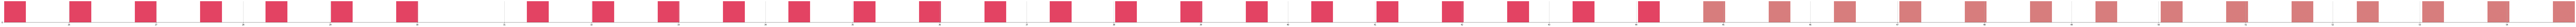

In [34]:
plot_stimulus_presentations(stimulus_presentations[:40])

In [35]:
stimulus_presentations
(len(stimulus_presentations),len(stimulus_presentations[stimulus_presentations.stimulus_block == 0]))

(13405, 4804)

In [36]:
# stimulus presentations plot:
def plot_stimulus_presentations_complete_block(stimulus_presentations, size=(180, 70), block=0):

    number_of_subplots = int(len(stimulus_presentations)/200)
    print(number_of_subplots)
    
    fig, axs = plt.subplots(number_of_subplots, figsize=size)
    fig.suptitle(f"Stimulus Presentation Block {block}", fontsize=150)
    
    for sub in range(number_of_subplots):
        for i in range(200*sub, (sub+1)*200):
            stimulus = stimulus_presentations.iloc[i]

            color = util.image_to_color(stimulus.image_name)
            axs[sub].add_patch(Rectangle((stimulus.start_time, 0), stimulus.duration, 0.1, facecolor=color, alpha=0.8))
        
            
        # remove y-axis and spines
        # ax.yaxis.set_visible(False)
        axs[sub].set_yticks([0, 1])
        axs[sub].set_xticks(np.arange(25.0, 800.0, step=1))
        axs[sub].spines[["left", "top", "right"]].set_visible(False)
        axs[sub].grid(True)
        axs[sub].margins(x=0, y=0)
        #axs[sub].ylim(lower_limit, upper_limit)
        #ax.legend()
        
    #ax.vlines([trial.start_time, trial.stop_time], 0, 1.5, alpha=0.1)
    #ax.vlines(trial.lick_times, 0, 1, color="tab:red", label='licks')
    patches = []

    patches.append(Patch(color='mediumpurple', label='im_111_r'))
    patches.append(Patch(color='mediumorchid', label='im_083_r'))
    patches.append(Patch(color='crimson', label='im_104_r'))
    patches.append(Patch(color='salmon', label='im_114_r'))
    patches.append(Patch(color='orangered', label='im_024_r'))
    patches.append(Patch(color='firebrick', label='im_005_r'))
    patches.append(Patch(color='indianred', label='im_087_r'))
    patches.append(Patch(color='tomato', label='im_034_r'))
    
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1.04), fontsize=150)

    plt.show()

In [37]:
block_0_length = len(stimulus_presentations[stimulus_presentations.stimulus_block == 0])
#plot_stimulus_presentations_complete_block(stimulus_presentations[:block_0_length])


In [38]:
stimulus_presentations.duration

stimulus_presentations_id
0        0.250212
1        0.250212
2        0.250208
3        0.250207
4        0.250213
           ...   
13400    0.250211
13401    0.250204
13402    0.250216
13403    0.250214
13404    0.266894
Name: duration, Length: 13405, dtype: float64

In [39]:
durations = stimulus_presentations[['duration']].to_numpy().flatten()
len(durations), durations[7]

(13405, nan)

In [40]:
def get_missing_durations(durations, stimulus_presentations):
    for i in range(len(durations)):
        if np.isnan(durations[i]):
            durations[i] = stimulus_presentations.iloc[i].stop_time - stimulus_presentations.iloc[i].start_time
    return durations

In [41]:
durations_complete = get_missing_durations(np.copy(durations), stimulus_presentations)
durations_complete[7], durations[7]

(0.25021039315390325, nan)

In [42]:
s_times = spike_times[good_VISp_units.index[0]]
s_times[100:150]

array([23.29775419, 23.36118739, 23.69198669, 24.36011863, 25.31688329,
       25.40631643, 25.41524975, 25.42594972, 25.53028284, 25.62791597,
       25.78331564, 25.81288225, 26.09701498, 26.22198139, 26.25134799,
       26.26211464, 26.26658129, 26.27674794, 26.42078097, 26.43461427,
       26.47508086, 26.49134749, 26.50958078, 26.81008015, 26.87494668,
       26.89704664, 26.93397989, 26.94401321, 26.94967986, 26.98184646,
       27.5671119 , 27.63841175, 27.65207839, 27.67251168, 27.68727831,
       27.71311159, 27.72814489, 27.74737819, 27.78391144, 28.3442436 ,
       28.36134357, 28.38911017, 28.4547767 , 28.47041   , 28.51527658,
       28.53397654, 28.55050984, 28.70540951, 28.79470932, 28.81714261])

In [43]:
# last spike_times
s_times[-20:]

array([9514.71901019, 9514.75351011, 9514.77977673, 9514.78974337,
       9514.81017666, 9514.82577663, 9514.90630979, 9514.95417636,
       9514.99467628, 9515.00677625, 9515.02327622, 9515.03300953,
       9515.04210951, 9515.05307615, 9515.08690942, 9515.11270936,
       9515.17354257, 9515.20184251, 9515.23774243, 9515.27540902])

In [44]:
len(s_times) # 66 669
s_times[63400:63450]

array([8799.68844348, 8799.71507676, 8799.72247674, 8799.72521007,
       8799.73554338, 8799.74074337, 8799.75861   , 8799.76764331,
       8799.88824306, 8799.89690971, 8799.90620969, 8799.91120968,
       8799.92114299, 8799.94010962, 8800.46177519, 8800.46747518,
       8800.47537516, 8800.48250848, 8800.49694178, 8800.53970836,
       8800.58017494, 8800.61954153, 8800.62940817, 8800.66747476,
       8800.69444137, 8801.0137407 , 8801.08154056, 8801.09960718,
       8801.12310714, 8801.16464038, 8801.17414036, 8801.21564027,
       8801.22200693, 8801.23007358, 8801.23364024, 8801.26520684,
       8801.30497342, 8801.35800664, 8801.36647329, 8801.44107314,
       8801.45027312, 8801.95347206, 8802.62710398, 8802.69393717,
       8802.89207009, 8802.92240336, 8803.13680291, 8803.23823603,
       8803.30016924, 8803.32730251])

In [45]:
# bins would actually be every second bin only, 
# looking like: bins = [start_time_0, stop_time_0, start_time_1, stop_time_1, ..., start_time_n, stop_time_n]
# -> also includes the intervalls between the bins we are looking for

custom_bins = stimulus_presentations[['start_time', 'stop_time']].to_numpy().flatten()
(len(custom_bins), custom_bins[:10], custom_bins[-10:])

(26810,
 array([25.25442032, 25.50463242, 26.00505664, 26.25526874, 26.75568453,
        27.00589242, 27.50630742, 27.75651453, 28.25692874, 28.50714164]),
 array([8798.17516031, 8798.42537178, 8798.92577938, 8799.17598291,
        8799.67640205, 8799.92661852, 8800.42705144, 8800.67726518,
        8801.17769225, 8801.44458669]))

In [46]:
# try solution for one unit 
hist, edges = np.histogram(s_times, bins=custom_bins)
(hist[:22], hist[-17:])

(array([4, 4, 3, 8, 7, 0, 8, 1, 5, 8, 7, 2, 3, 4, 1, 1, 6, 1, 3, 3, 4, 0]),
 array([14,  5, 10,  3,  7,  6, 11, 11, 11,  5,  8,  8, 13,  1, 10,  7,  9]))

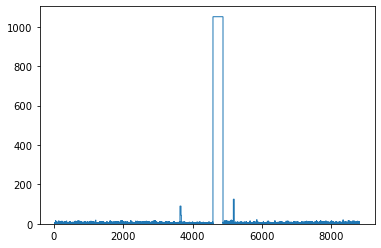

In [47]:
plt.stairs(hist, edges)

In [48]:
every_2nd_bin = hist[::2]
every_2nd_bin[:20]

array([4, 3, 7, 8, 5, 7, 3, 1, 6, 3, 4, 2, 1, 2, 4, 5, 3, 2, 4, 5])

In [49]:
every_2nd_bin[-17:]

array([ 5,  6,  5,  6,  2,  6,  6,  7, 14, 10,  7, 11, 11,  8, 13, 10,  9])

In [50]:
sh = every_2nd_bin.shape
print(sh)
C = [ ]
for element in zip(np.zeros(sh, dtype=int), every_2nd_bin):
    C.extend(element)

C = np.array(C)
(C[:20], C.shape)

(13405,)


(array([0, 4, 0, 3, 0, 7, 0, 8, 0, 5, 0, 7, 0, 3, 0, 1, 0, 6, 0, 3]), (26810,))

In [51]:
# this cell should not be needed anymore when using the function in the next cell

M = np.zeros((len(good_VISp_units), len(durations)))

for i, unit_id in enumerate(good_VISp_units.index):
    unit_spike_times = spike_times[unit_id] # get spike times for current unit
    # count spike_times for each bin and intervals in between
    unit_hist, bin_edges = np.histogram(unit_spike_times, bins=custom_bins) 
    unit_bin_counts = unit_hist[::2] # take every 2nd Element so that we only have the desired bins
    
    mean_unit_bin_counts = unit_bin_counts / durations_complete
    
    assert M[i, :].shape == mean_unit_bin_counts.shape
    
    M[i, :] = mean_unit_bin_counts
    

print(M.shape)
v0 = M[:, 0]
v0

(43, 13405)


array([15.98643667,  3.99660917, 19.98304584, 39.96609167,  7.99321833,
       15.98643667,  3.99660917,  7.99321833, 19.98304584,  7.99321833,
       55.95252834,  0.        ,  3.99660917, 19.98304584, 55.95252834,
        0.        ,  0.        , 71.93896501,  0.        ,  7.99321833,
       59.94913751, 15.98643667, 11.9898275 ,  3.99660917, 19.98304584,
       15.98643667,  0.        ,  0.        , 27.97626417,  3.99660917,
        7.99321833, 47.95931001,  3.99660917,  0.        ,  0.        ,
        0.        ,  7.99321833,  0.        ,  3.99660917,  0.        ,
        3.99660917, 15.98643667,  3.99660917])

In [52]:
def create_unit_activity_vectors(units, spike_times, stimulus_presentations) -> np.array:
    """
    creates the general population Response Matrix with all unit activity vectors
    """
    
    custom_bins = stimulus_presentations[['start_time', 'stop_time']].to_numpy().flatten()
    
    durations = stimulus_presentations[['duration']].to_numpy().flatten()
    
    durations = get_missing_durations(np.copy(durations), stimulus_presentations)
    
    
    # construct Matrix:
    M = np.zeros((len(good_VISp_units), len(durations)))

    for i, unit_id in enumerate(units.index):
        unit_spike_times = spike_times[unit_id] # get spike times for current unit
        # count spike_times for each bin and intervals in between
        unit_hist, bin_edges = np.histogram(unit_spike_times, bins=custom_bins) 
        unit_bin_counts = unit_hist[::2] # take every 2nd Element so that we only have the desired bins

        mean_unit_bin_counts = unit_bin_counts / durations

        assert M[i, :].shape == mean_unit_bin_counts.shape

        M[i, :] = mean_unit_bin_counts
    
    return M

In [53]:
M1 = create_unit_activity_vectors(good_VISp_units, spike_times, stimulus_presentations)
M1

array([[15.98643667, 11.9898275 , 27.97673531, ..., 51.95501447,
        39.9658322 , 33.72119722],
       [ 3.99660917,  0.        ,  0.        , ...,  7.99307915,
         0.        , 11.24039907],
       [19.98304584, 23.979655  , 15.98670589, ...,  7.99307915,
        19.9829161 ,  7.49359938],
       ...,
       [ 3.99660917, 15.98643667, 19.98338237, ...,  3.99653957,
        11.98974966,  3.74679969],
       [15.98643667,  3.99660917,  3.99667647, ...,  7.99307915,
        11.98974966,  7.49359938],
       [ 3.99660917,  0.        ,  0.        , ..., 19.98269787,
        15.98633288, 11.24039907]])

In [54]:
(np.corrcoef(M[:, 0]), np.corrcoef(M[:, 1]), np.corrcoef(M[:, 2]))

(1.0, 1.0, 1.0)

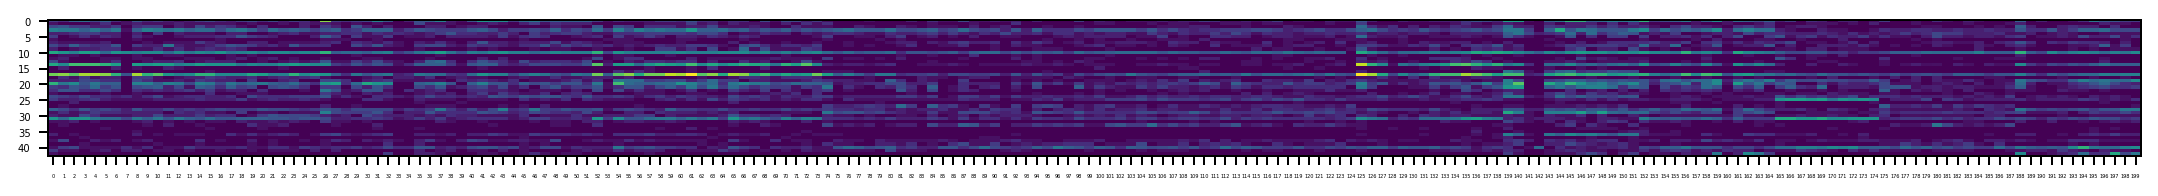

In [55]:
plt.figure(figsize=(15, 1), dpi=180)
plt.xticks(np.arange(200), fontsize=2)
plt.yticks(np.arange(44, step=5), fontsize=4)
plt.imshow(M[:, :200], aspect='auto')

In [135]:
# stimulus presentations plot:
def plot_stimulus_presentations_with_activities(stimulus_presentations, size=(180, 2), block=0, activities=None, title=None):

    if activities is not None:
        fig, (ax1, ax0) = plt.subplots(2, figsize=size, sharex=True, gridspec_kw={'height_ratios': [5, 1]})
    else:
        fig, ax0 = plt.subplots(figsize=size)
      
    if title is not None:
        # fig.suptitle(title, fontsize=int(0.5 * size[0]))
        fig.suptitle(title, fontsize=40)
        
    timings = []
    for i in range(len(stimulus_presentations)):
        stimulus = stimulus_presentations.iloc[i]

            
        color = util.image_to_color(stimulus.image_name)
        ax0.add_patch(Rectangle((stimulus.start_time, 0), stimulus.duration, 0.1, facecolor=color, alpha=0.8))
        timings.append((stimulus.start_time, stimulus.stop_time))
        # print(stimulus.image_name)
        
        if activities is not None:
            im = ax1.imshow(np.flip(activities[:, [i]]), extent=(stimulus.start_time-0.22, 
                                                        stimulus.stop_time+0.22, 
                                                        0, 
                                                        activities.shape[0]
                                                       ), aspect='auto')

    ax0.set_yticks([0, 1])
    ax0.set_xticks(np.arange(25.0, 800.0, step=1))
    ax0.spines[["left", "top", "right"]].set_visible(False)
    ax0.grid(True)
    ax0.margins(x=0, y=0)
    ax0.set_xlabel(' \n (im104)                               (im005)                                   (im034)                                  (im083)                                  (im111)                                        (im034)', fontsize=30)

    plt.tight_layout()
    plt.xticks(fontsize=11)
    # plt.legend()
    # fig.colorbar(im, orientation='horizontal', shrink=2.5)
    
    if activities is not None:
        ax1.set_xlim(timings[0][0], timings[-1][1])
        #ax1.set_yticks(np.arange(activities.shape[0], step=5))
        ax1.invert_yaxis()
        ### TODO:
        # values on y axis are wrong direction! 
        
        #ax1.set_xticks(np.arange(len(stimulus_presentations)))
    plt.savefig('plots/activity_illustration')

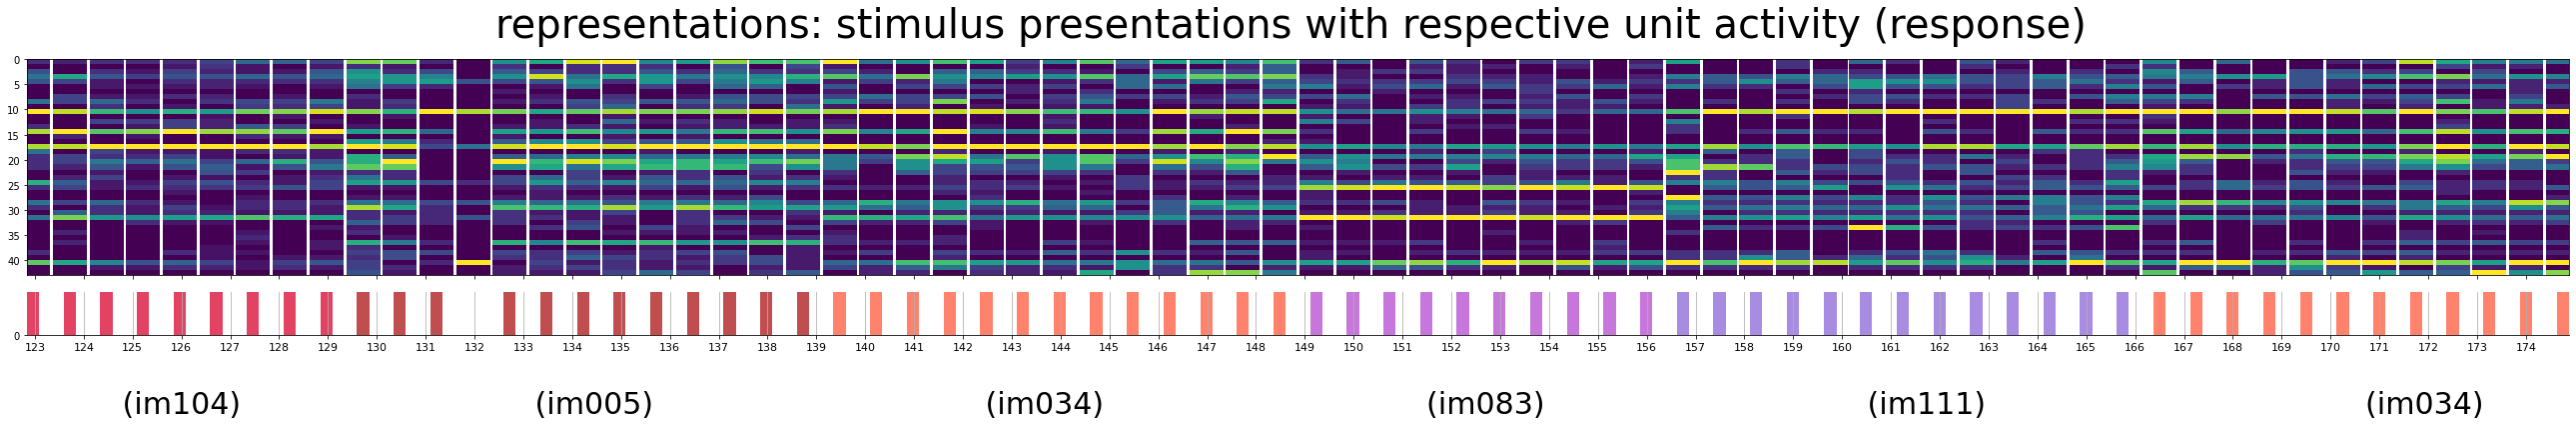

In [136]:
plot_stimulus_presentations_with_activities(stimulus_presentations[130:200], size=(36, 6), activities=M[:, 130:200], title="representations: stimulus presentations with respective unit activity (response)")


In [78]:
def plot_multiple_stimulus_with_activities(amount, blocks_per_sub, stimulus_presentations, M):
    for sub in range(amount):
        low_i = blocks_per_sub*sub
        up_i =(sub+1)*blocks_per_sub
        plot_stimulus_presentations_with_activities(stimulus_presentations[low_i:up_i], size=(80, 5), activities=M[:, low_i:up_i])


In [80]:
#plot_multiple_stimulus_with_activities(4, 80, stimulus_presentations, M)

In [81]:
C = np.corrcoef(np.transpose(M1))
np.set_printoptions(precision=3)
print(C)

[[1.    0.895 0.909 ... 0.319 0.213 0.344]
 [0.895 1.    0.9   ... 0.271 0.214 0.288]
 [0.909 0.9   1.    ... 0.344 0.248 0.353]
 ...
 [0.319 0.271 0.344 ... 1.    0.871 0.803]
 [0.213 0.214 0.248 ... 0.871 1.    0.719]
 [0.344 0.288 0.353 ... 0.803 0.719 1.   ]]


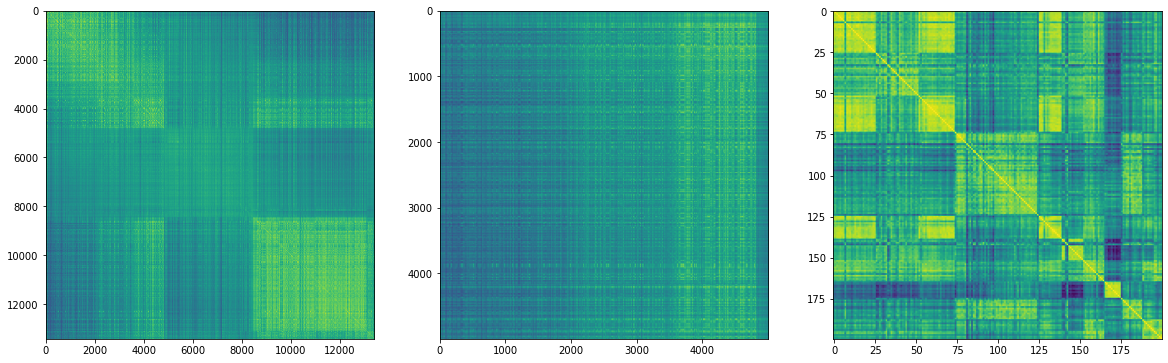

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

im0 = axs[0].imshow(C)
im1 = axs[1].imshow(C[-5000:, :5000])
im2 = axs[2].imshow(C[:200, :200])
#fig.colorbar(im1, orientation='horizontal')

In [83]:
stimulus_presentations.head()

active  color  contrast  duration  end_frame  \
stimulus_presentations_id                                                 
0                            True    NaN       NaN  0.250212         75   
1                            True    NaN       NaN  0.250212        120   
2                            True    NaN       NaN  0.250208        165   
3                            True    NaN       NaN  0.250207        210   
4                            True    NaN       NaN  0.250213        255   

                           flashes_since_change image_name  is_change  \
stimulus_presentations_id                                               
0                                           0.0    im104_r        0.0   
1                                           1.0    im104_r        0.0   
2                                           2.0    im104_r        0.0   
3                                           3.0    im104_r        0.0   
4                                           4.0    im104_r        0.0   

                           is_image_novel  omitted  ...  position_y  rewarded  \
stimulus_presentations_id                           ...                         
0                                     1.0      0.0  ...         NaN       0.0   
1                                     1.0      0.0  ...         NaN       0.0   
2                                     1.0      0.0  ...         NaN       0.0   
3                                     1.0      0.0  ...         NaN       0.0   
4                                     1.0      0.0  ...         NaN       0.0   

                           spatial_frequency  start_frame  start_time  \
stimulus_presentations_id                                               
0                                        NaN           60   25.254420   
1                                        NaN          105   26.005057   
2                                        NaN          150   26.755685   
3                                        NaN          195   27.506307   
4                                        NaN          240   28.256929   

                           stimulus_block  stimulus_index  \
stimulus_presentations_id                                   
0                                       0             NaN   
1                                       0             NaN   
2                                       0             NaN   
3                                       0             NaN   
4                                       0             NaN   

                                                         stimulus_name  \
stimulus_presentations_id                                                
0                          Natural_Images_Lum_Matched_set_ophys_H_2019   
1                          Natural_Images_Lum_Matched_set_ophys_H_2019   
2                          Natural_Images_Lum_Matched_set_ophys_H_2019   
3                          Natural_Images_Lum_Matched_set_ophys_H_2019   
4                          Natural_Images_Lum_Matched_set_ophys_H_2019   

                           stop_time temporal_frequency  
stimulus_presentations_id                                
0                          25.504632                NaN  
1                          26.255269                NaN  
2                          27.005892                NaN  
3                          27.756515                NaN  
4                          28.507142                NaN  

[5 rows x 22 columns]

# Get Unit Activites for Fixed Images

In [84]:
def get_unit_activity_vectors_for_image(image_name, M, stimulus_presentations):
    image_stimuli = stimulus_presentations[stimulus_presentations.image_name == image_name]
    image_stimuli_block0 = image_stimuli[image_stimuli.stimulus_block == 0]
    image_stimuli_block5 = image_stimuli[image_stimuli.stimulus_block == 5]
    
    A_image = M[:, image_stimuli.index]
    A_image_b0 = M[:, image_stimuli_block0.index]
    A_image_b5 = M[:, image_stimuli_block5.index]
    
    assert A_image.shape[1] == A_image_b0.shape[1] + A_image_b5.shape[1]
    
    return A_image, A_image_b0, A_image_b5

In [85]:
def plot_blockwise_unit_activities_for_image(image_name, M, stimulus_presentations, session):
    fig, axs = plt.subplots(5, 1, figsize=(60,36))

    image = session.stimulus_templates.loc[image_name].warped
    
    complete, b0, b5 = get_unit_activity_vectors_for_image(image_name, M, stimulus_presentations)
    
    C = np.corrcoef(np.transpose(complete))

    axs[0].set_title(image_name, fontsize=46)
    im0 = axs[0].imshow(image)
    
    
    axs[1].set_title('all ocurrences', fontsize=46)
    im1 = axs[1].imshow(complete)
    
    axs[2].set_title('CORRCOEF', fontsize=46)
    im2 = axs[2].imshow(C)
    
    axs[3].set_title('in active block 0', fontsize=46)
    im3 = axs[3].imshow(b0)
    axs[4].set_title('in passive block 5', fontsize=46)
    im4 = axs[4].imshow(b5)
    

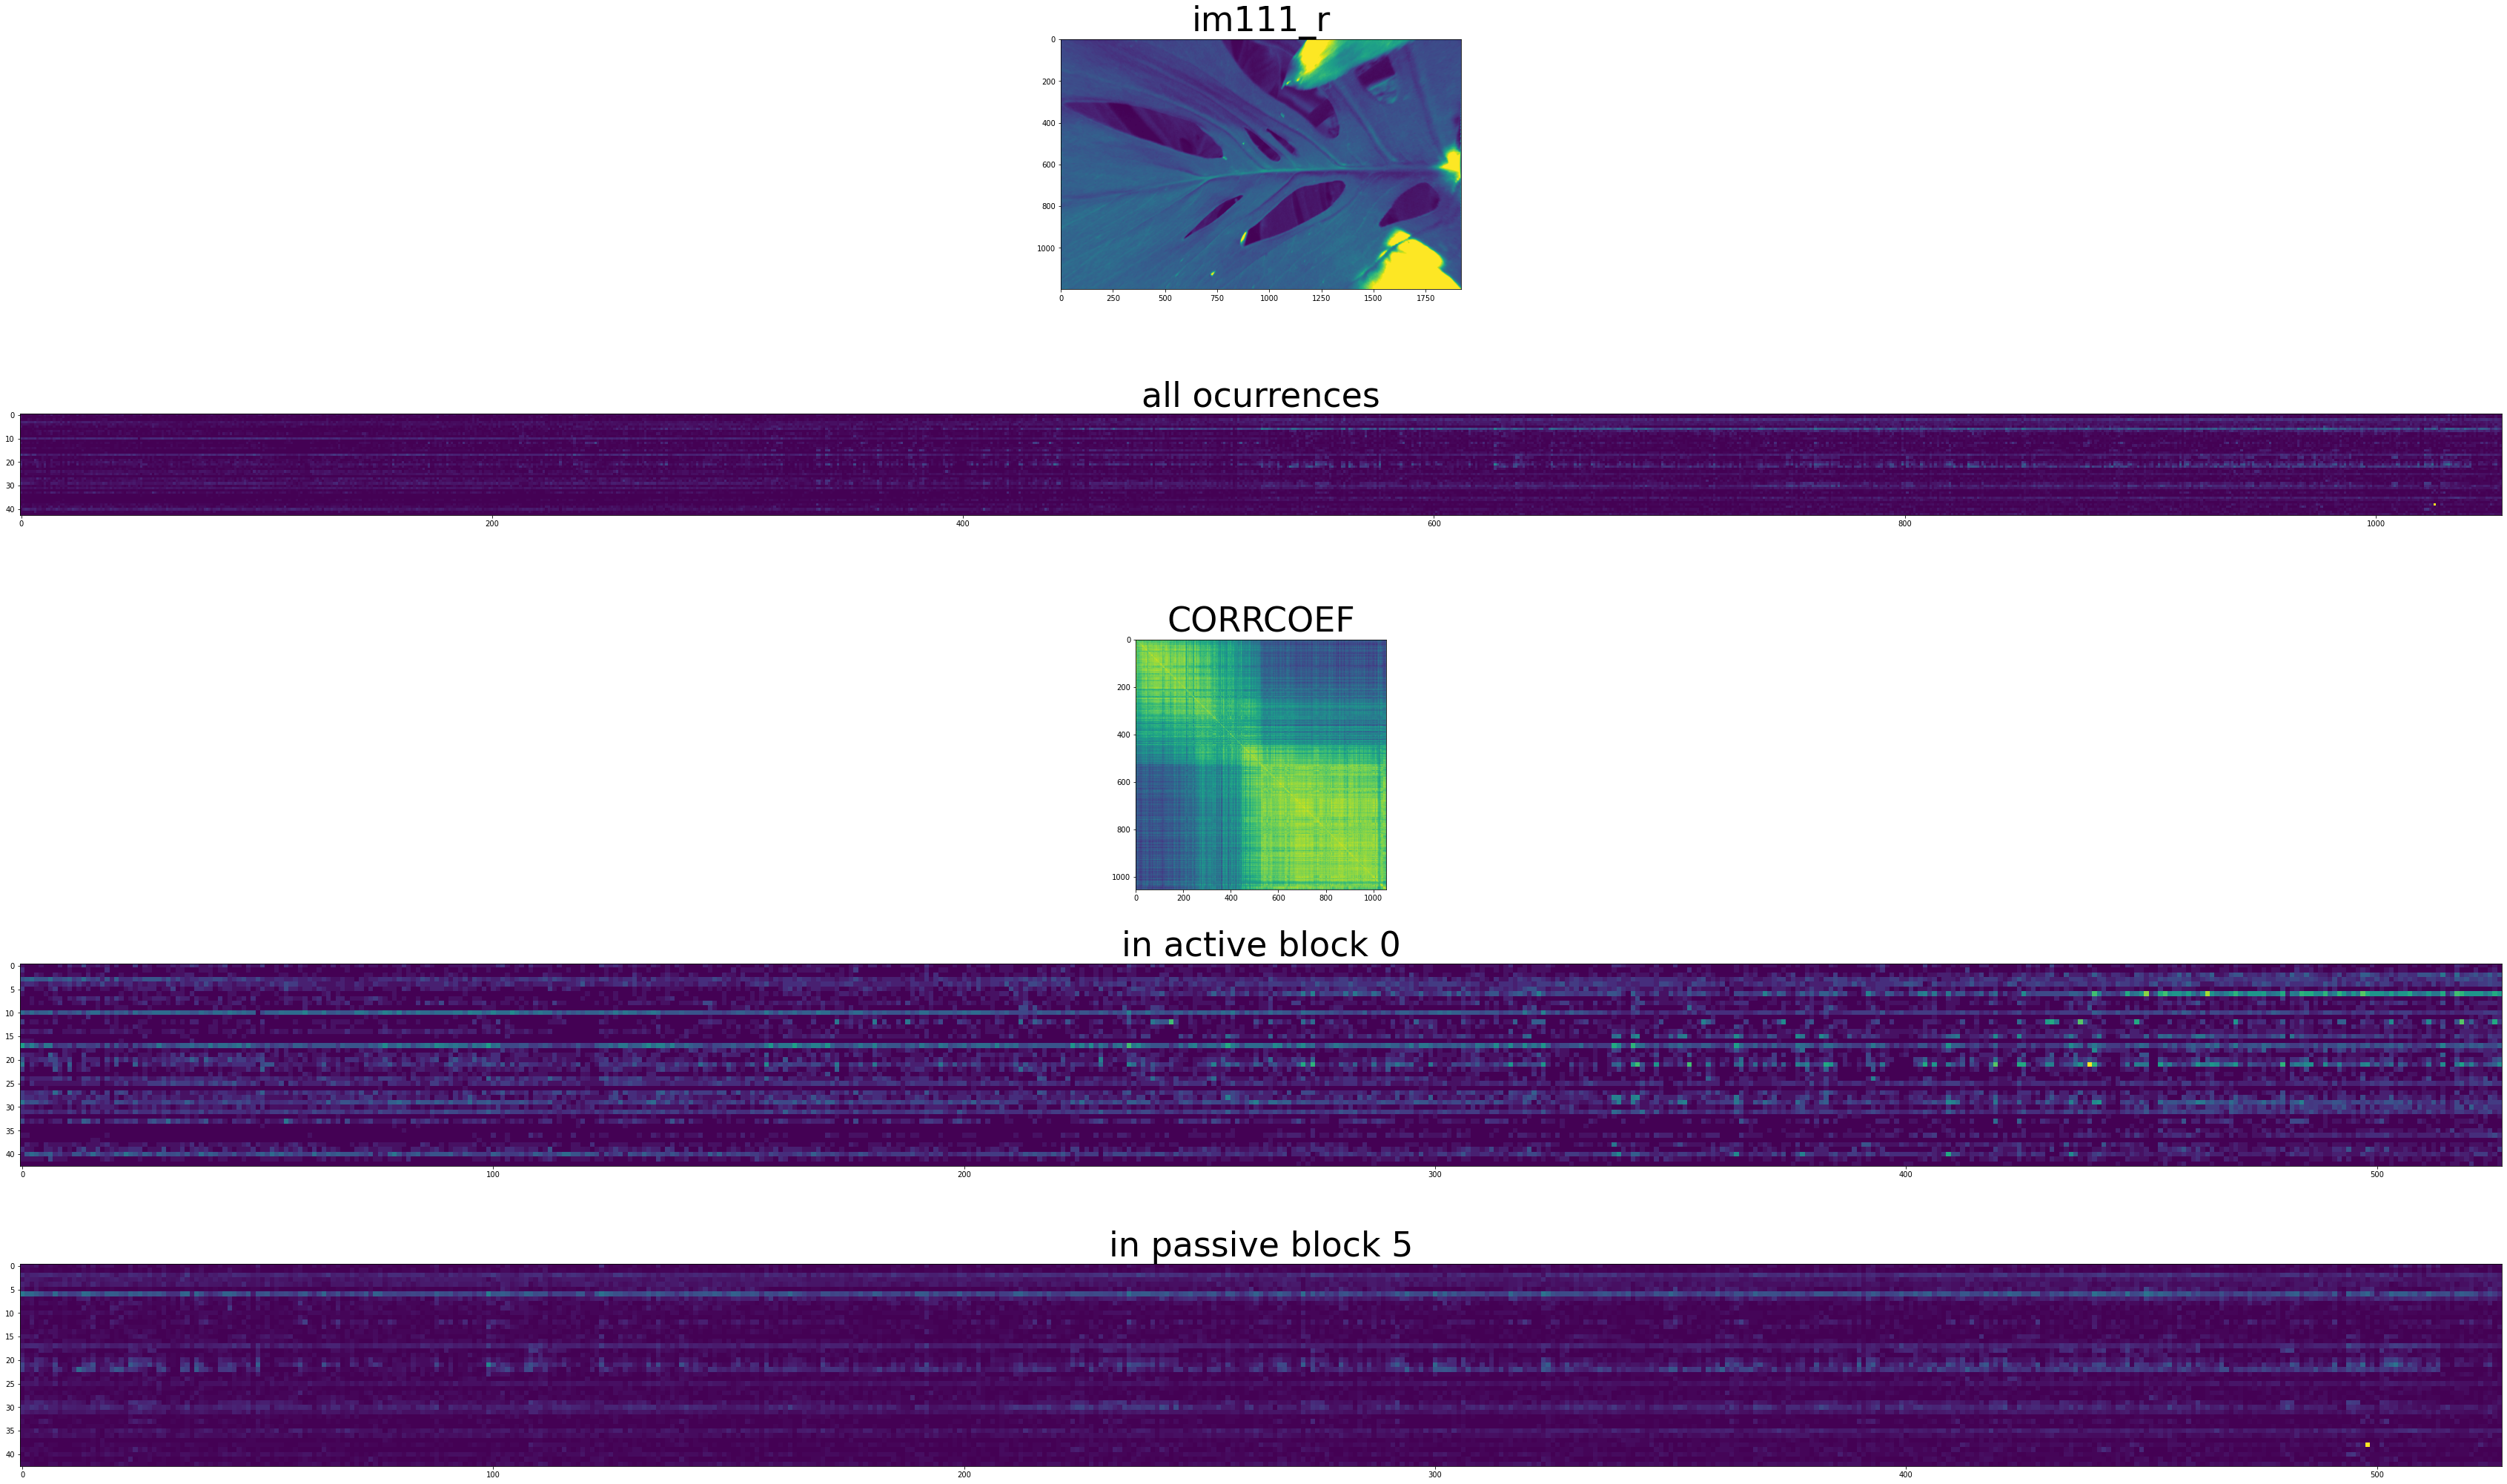

In [86]:
plot_blockwise_unit_activities_for_image('im111_r', M, stimulus_presentations, session)

In [87]:
complete, b0, b5 = get_unit_activity_vectors_for_image('im111_r', M, stimulus_presentations)

complete.shape, b0.shape, b5.shape

((43, 1054), (43, 527), (43, 527))

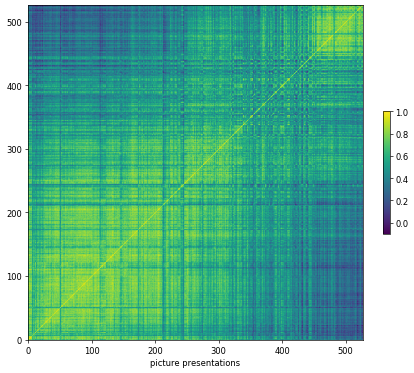

In [88]:
plt.figure(figsize=(9, 9), dpi=60)

RS = np.corrcoef(np.transpose(b0))

plt.imshow(RS, origin='lower')
plt.xlabel('picture presentations')
plt.colorbar(shrink=0.3)

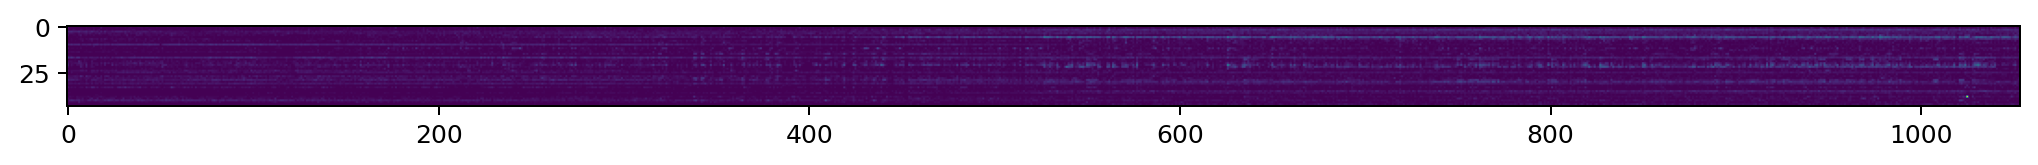

In [89]:
plt.figure(figsize=(14, 4), dpi=180)

plt.imshow(complete)

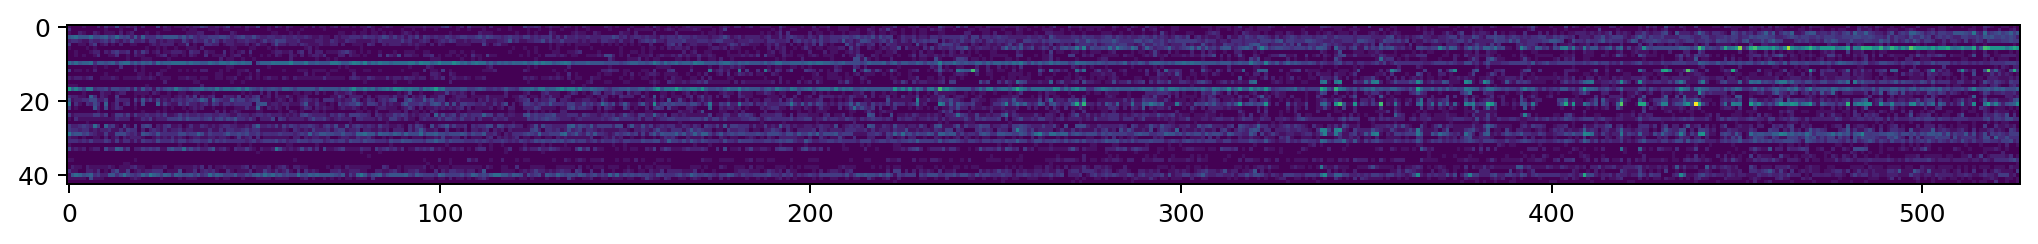

In [90]:
plt.figure(figsize=(14, 4), dpi=180)
#plt.xticks(np.arange(200), fontsize=2)
#plt.yticks(np.arange(44, step=5), fontsize=4)
#plt.imshow(M[:, :200], aspect='auto')
plt.imshow(b0)

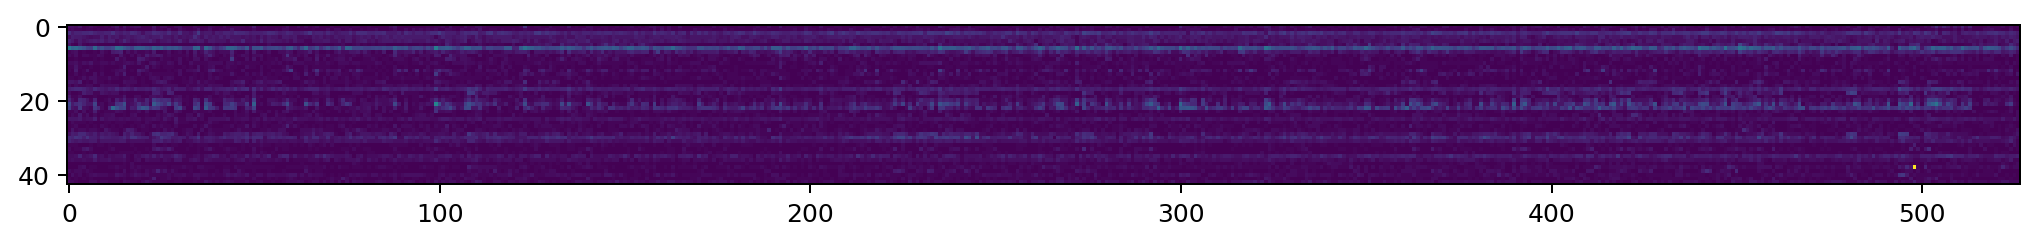

In [91]:
plt.figure(figsize=(14, 4), dpi=180)
plt.imshow(b5)

In [92]:
# reduce amount of stimuli:

In [93]:
stimulus_presentations.head(10)

active  color  contrast  duration  end_frame  \
stimulus_presentations_id                                                 
0                            True    NaN       NaN  0.250212         75   
1                            True    NaN       NaN  0.250212        120   
2                            True    NaN       NaN  0.250208        165   
3                            True    NaN       NaN  0.250207        210   
4                            True    NaN       NaN  0.250213        255   
5                            True    NaN       NaN  0.250213        300   
6                            True    NaN       NaN  0.250205        345   
7                            True    NaN       NaN       NaN        390   
8                            True    NaN       NaN  0.250205        435   
9                            True    NaN       NaN  0.250205        480   

                           flashes_since_change image_name  is_change  \
stimulus_presentations_id                                               
0                                           0.0    im104_r        0.0   
1                                           1.0    im104_r        0.0   
2                                           2.0    im104_r        0.0   
3                                           3.0    im104_r        0.0   
4                                           4.0    im104_r        0.0   
5                                           5.0    im104_r        0.0   
6                                           6.0    im104_r        0.0   
7                                           6.0    omitted        0.0   
8                                           7.0    im104_r        0.0   
9                                           8.0    im104_r        0.0   

                           is_image_novel  omitted  ...  position_y  rewarded  \
stimulus_presentations_id                           ...                         
0                                     1.0      0.0  ...         NaN       0.0   
1                                     1.0      0.0  ...         NaN       0.0   
2                                     1.0      0.0  ...         NaN       0.0   
3                                     1.0      0.0  ...         NaN       0.0   
4                                     1.0      0.0  ...         NaN       0.0   
5                                     1.0      0.0  ...         NaN       0.0   
6                                     1.0      0.0  ...         NaN       0.0   
7                                     NaN      1.0  ...         NaN       0.0   
8                                     1.0      0.0  ...         NaN       0.0   
9                                     1.0      0.0  ...         NaN       0.0   

                           spatial_frequency  start_frame  start_time  \
stimulus_presentations_id                                               
0                                        NaN           60   25.254420   
1                                        NaN          105   26.005057   
2                                        NaN          150   26.755685   
3                                        NaN          195   27.506307   
4                                        NaN          240   28.256929   
5                                        NaN          285   29.007567   
6                                        NaN          330   29.758190   
7                                        NaN          375   30.508809   
8                                        NaN          420   31.259440   
9                                        NaN          465   32.010054   

                           stimulus_block  stimulus_index  \
stimulus_presentations_id                                   
0                                       0             NaN   
1                                       0             NaN   
2                                       0             NaN   
3                                       0             NaN   
4                                

In [94]:
def count_same_image_appearences(image_name, stimulus_presentations):
    """
    counts lengths of same stimulus (image) chains throughout stimulus presentations, while tracking the time medians
    of these chains
    """

    current_image = 'no'
    counts = []
    timings = []
    timings_start_end = []
    count = 0
    for i in range(len(stimulus_presentations)):
        stimulus = stimulus_presentations.iloc[i]
        if stimulus.image_name != current_image:     # if we have a new image
            if not (stimulus.image_name == 'omitted'):   # to skip the omitted pictures and count on
                if stimulus.image_name == image_name:        # if its the one we look for 
                    count = 1
                    #indices.append(i)
                    time_begin = stimulus.start_time        # keep track of timings

                elif current_image == image_name:            # if its the last in row of the one we look for (previous-image)
                    counts.append(count)
                    timings.append(np.median([time_begin, current_time_end])) 
                    timings_start_end.append([time_begin, current_time_end])

                current_image = stimulus.image_name
        else:                                        # no image change (previous is the same as current one)
            if stimulus.image_name == image_name:        # if its the one we look for
                count += 1
                #indices.append(i)
                current_time_end = stimulus.stop_time    # keep track of timings

    #indices
    return counts, timings, timings_start_end
    

In [95]:
def average_population_response_over_same_stimulus_presentations(M, image_name, stimulus_presentations):
    """
    calculating averages for same stimulus presentations, which means the repeated display of the same image (specified through image_name), 
    seperated through the presentation of a different stimulus
    returning: 
    - a reduced population response Matrix M
    - also split up in the passive and active block
    - as well as the time medians
    
    """
    # take population activity Matrix for fixed image
    M_image, M_image_b0, M_image_b5 = get_unit_activity_vectors_for_image(image_name, M, stimulus_presentations)
    
    # count in stimulus_presentations table how long each row of image presentation is,
    # also get median timings for each chain of images
    counts, timings, timings_start_end = count_same_image_appearences(image_name, stimulus_presentations)
    
    assert sum(counts) == M_image.shape[1]
    assert len(counts) == len(timings)
    
    b = int(len(counts)/2)
    
    # construct Matrix that averages presentations of same picture in a row
    M_avg = np.zeros((M_image.shape[0], len(counts))) 
    M_avg_active = np.zeros((M_image.shape[0], b))
    M_avg_passive = np.zeros((M_image.shape[0], b))
    
    prev = 0
    for i, cnt in enumerate(counts):
        M_avg[:, i] = np.mean(M_image[:, prev : prev + cnt], axis=1)
         
        if i < b:
            # might not be necessary at this point
            M_avg_active[:, i] = np.mean(M_image_b0[:, prev : prev + cnt], axis=1)
            M_avg_passive[:, i] = np.mean(M_image_b5[:, prev:prev + cnt], axis= 1)
        
        prev += cnt
    
    return M_avg, M_avg_active, M_avg_passive, timings, timings_start_end
        

In [96]:
M_reduced, M_rd_active, M_rd_passive, timings, timings_start_end = average_population_response_over_same_stimulus_presentations(M, 'im111_r', stimulus_presentations)


Text(0, 0.5, 'VIsp Units')

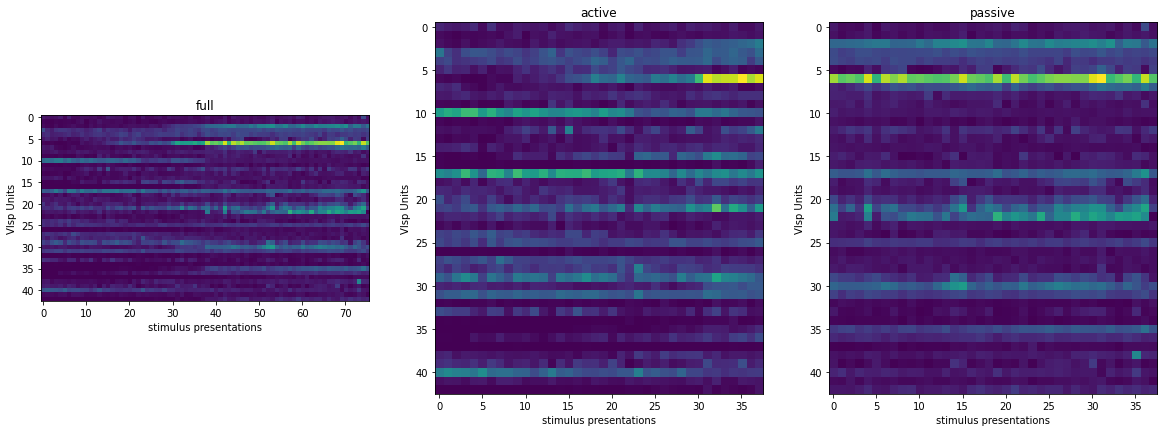

In [97]:
# to check if it makes sense:

fig, axs = plt.subplots(1, 3, figsize=(20,20))
fig.title = 'averaged population response'

im0 = axs[0].imshow(M_reduced)
axs[0].set_title('full')
axs[0].set_xlabel('stimulus presentations')
axs[0].set_ylabel('VIsp Units')

im1 = axs[1].imshow(M_rd_active)
axs[1].set_title('active')
axs[1].set_xlabel('stimulus presentations')
axs[1].set_ylabel('VIsp Units')

im2 = axs[2].imshow(M_rd_passive)
axs[2].set_title('passive')
axs[2].set_xlabel('stimulus presentations')
axs[2].set_ylabel('VIsp Units')

Text(0.5, 0, 'stimulus presentations')

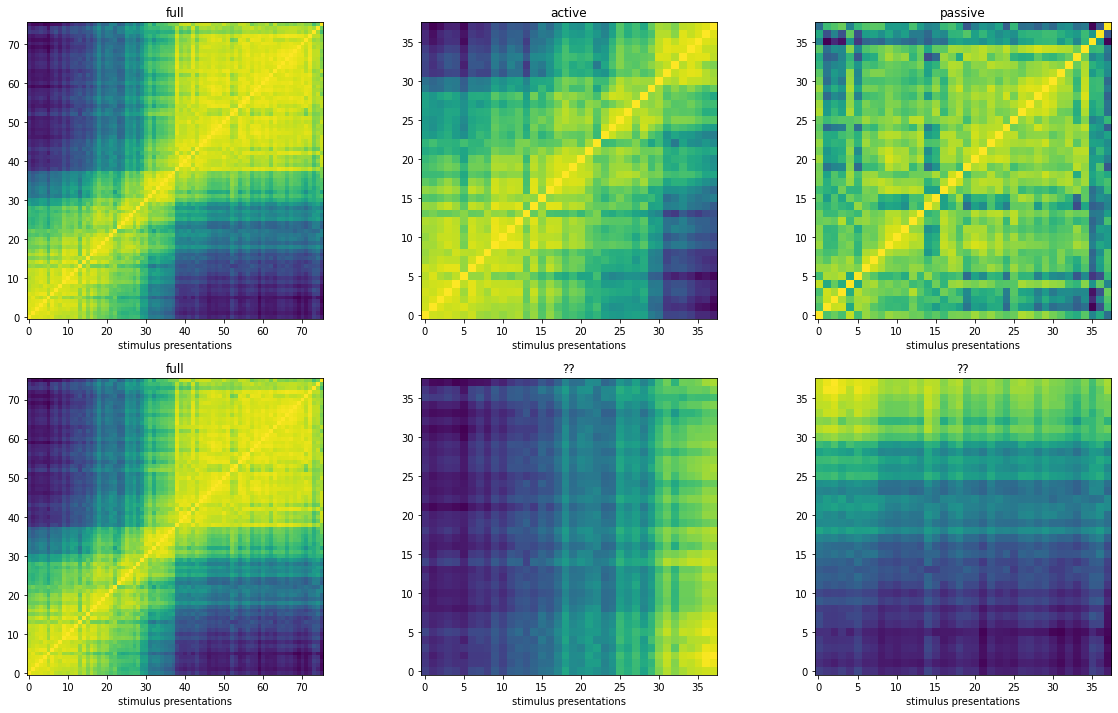

In [98]:
C_reduced = np.corrcoef(np.transpose(M_reduced))#
C_rd_active = np.corrcoef(np.transpose(M_rd_active))#
C_rd_passive = np.corrcoef(np.transpose(M_rd_passive))#

half = len(C_rd_active)

fig, axs = plt.subplots(2, 3, figsize=(20,12))
fig.title = 'averaged population response'

im0 = axs[0, 0].imshow(C_reduced, origin='lower')
axs[0, 0].set_title('full')
axs[0, 0].set_xlabel('stimulus presentations')

im1 = axs[0, 1].imshow(C_rd_active, origin='lower')
axs[0, 1].set_title('active')
axs[0, 1].set_xlabel('stimulus presentations')

im2 = axs[0, 2].imshow(C_rd_passive, origin='lower')
axs[0, 2].set_title('passive')
axs[0, 2].set_xlabel('stimulus presentations')

im3 = axs[1, 0].imshow(C_reduced, origin='lower')
axs[1, 0].set_title('full')
axs[1, 0].set_xlabel('stimulus presentations')

im4 = axs[1, 1].imshow(C_reduced[half:, :half], origin='lower')
axs[1, 1].set_title('??')
axs[1, 1].set_xlabel('stimulus presentations')

im5 = axs[1, 2].imshow(C_reduced[:half, half:], origin='lower')
axs[1, 2].set_title('??')
axs[1, 2].set_xlabel('stimulus presentations')

#fig.colorbar(im0, shrink=0.1)

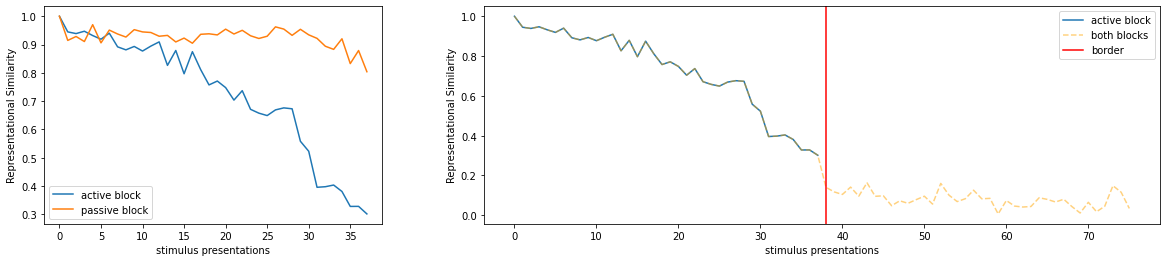

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(20,4), gridspec_kw={'width_ratios': [1, 2]})

axs[0].plot(C_rd_active[0,:], label='active block')           #[0, :] takes first row of matrix
axs[0].plot(C_rd_passive[0,:], label='passive block')
axs[0].set_xlabel('stimulus presentations')
axs[0].set_ylabel('Representational Similarity')
axs[0].legend()

axs[1].plot(C_rd_active[0,:], label='active block')
axs[1].plot(C_reduced[0,:], label='both blocks', linestyle='dashed', alpha=0.5, c='orange')
axs[1].axvline(half, c='r', label='border')
axs[1].set_xlabel('stimulus presentations')
axs[1].set_ylabel('Representational Similarity')
axs[1].legend()

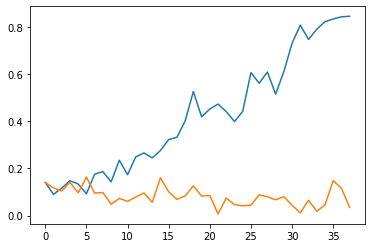

In [100]:
## TODO: don't know what this actually is

across_blocks = C_reduced[half:, :half]
across_blocks2 = C_reduced[:half, half:]
plt.plot(across_blocks[0,:]) # blue    == plt.plot(across_blocks2[:,0]) is the RS rising again due to symmetry
plt.plot(across_blocks2[0,:]) # orange == plt.plot(across_blocks[:,0]) the actual passive blocks RS?


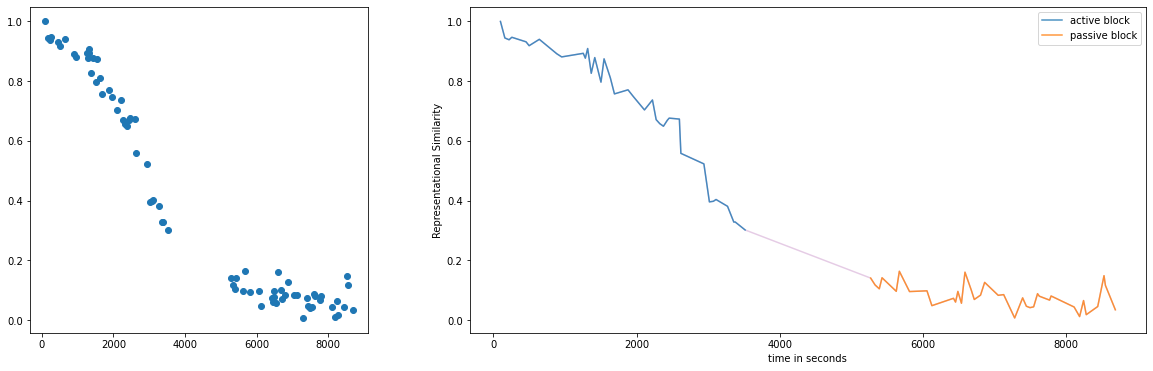

In [101]:
fig, axs = plt.subplots(1, 2, figsize=(20,6), gridspec_kw={'width_ratios': [1, 2]})

axs[0].scatter(timings, C_reduced[0,:])
axs[1].plot(timings, C_reduced[0,:], c='purple', alpha=0.2)
axs[1].plot(timings[:half], C_rd_active[0,:], alpha=0.8, label='active block')
axs[1].plot(timings[half:], across_blocks2[0,:], alpha=0.8, label='passive block')
axs[1].set_xlabel('time in seconds')
axs[1].set_ylabel('Representational Similarity')
axs[1].legend()

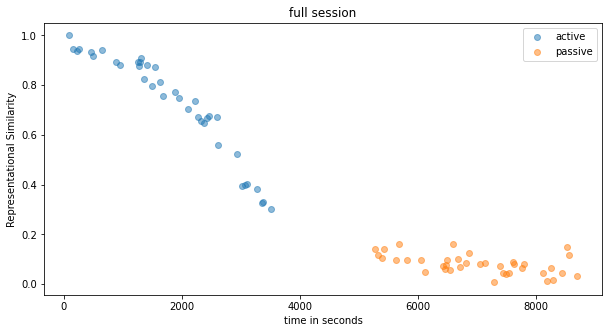

In [102]:
# next: get timings for presentation means - to plot over time instead of stimulus presentations
# added to count appearences function

fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(label='full session')
ax.scatter(timings[:half], C_rd_active[0,:], alpha=0.5, label='active')
ax.scatter(timings[half:], across_blocks2[0,:], alpha=0.5, label='passive')
ax.set_xlabel('time in seconds')
ax.set_ylabel('Representational Similarity')
ax.legend()


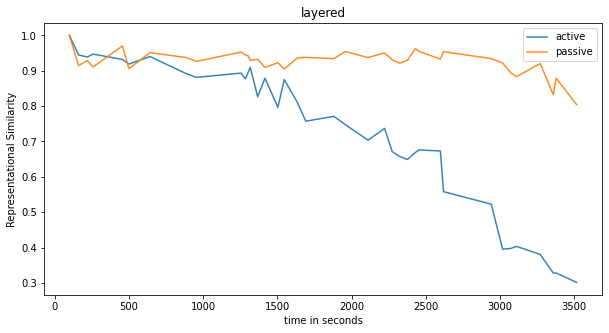

In [103]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(label='layered')
ax.plot(timings[:half], C_rd_active[0,:], alpha=0.9, label='active')
ax.plot(timings[:half], C_rd_passive[0,:], alpha=0.9, label='passive')
ax.set_xlabel('time in seconds')
ax.set_ylabel('Representational Similarity')
ax.legend()

51
0.6315541479213644


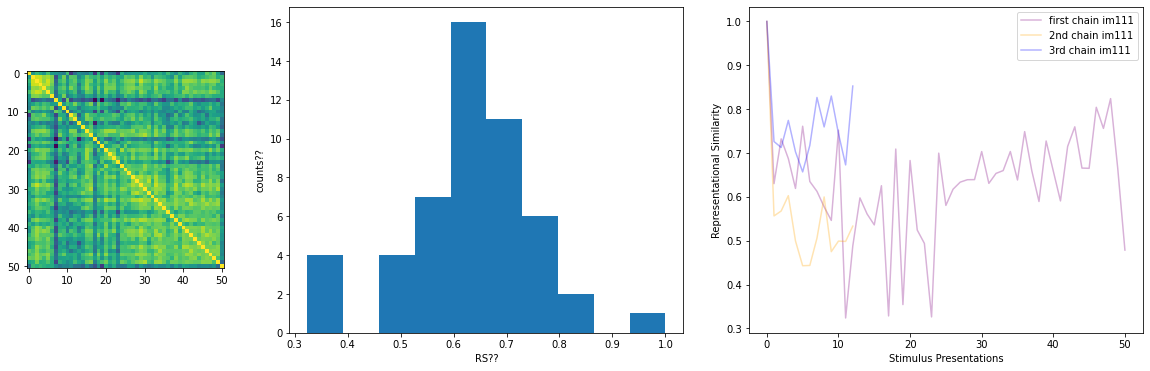

In [158]:
counts, timings, timings_start_end = count_same_image_appearences('im111_r', stimulus_presentations)
print(counts[0])
first_chain = b0[:, :counts[0]] 
second_chain = b0[:, counts[0]: counts[0] + counts[1]] ## -1 should be, TODO: check if done correctly before
third_chain = b0[:, counts[0] + counts[1]: counts[0] + counts[1] + counts[2]]


C_chain2 = np.corrcoef(np.transpose(second_chain))
C_chain3 = np.corrcoef(np.transpose(third_chain))


C_chain = np.corrcoef(np.transpose(first_chain))


fig, axs = plt.subplots(1, 3, figsize=(20,6), gridspec_kw={'width_ratios': [1, 2, 2]})

axs[0].imshow(C_chain)

print(np.mean(C_chain[0, :]))

axs[1].hist(C_chain[0, :])
axs[1].set_ylabel('counts??')
axs[1].set_xlabel('RS??')

axs[2].plot(C_chain[0, :], c='purple', alpha=0.3, label='first chain im111')
axs[2].plot(C_chain2[0, :], c='orange', alpha=0.3, label='2nd chain im111')
axs[2].plot(C_chain3[0, :], c='blue', alpha=0.3, label='3rd chain im111')
axs[2].set_ylabel('Representational Similarity')
axs[2].set_xlabel('Stimulus Presentations')
axs[2].legend()


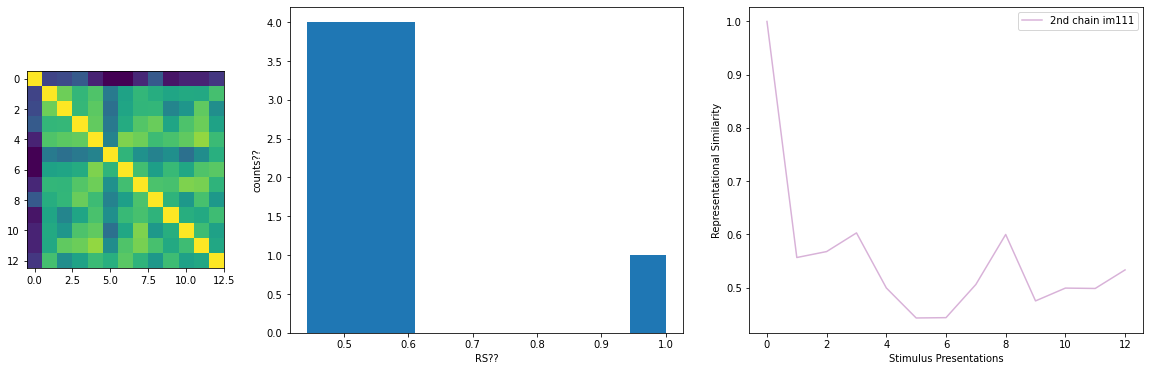

In [154]:
second_chain = b0[:, counts[0]: counts[0] + counts[1]] ## -1 should be, TODO: check if done correctly before

C_chain2 = np.corrcoef(np.transpose(second_chain))

counts[0], counts[1], b0.shape, second_chain.shape, first_chain.shape


fig, axs = plt.subplots(1, 3, figsize=(20,6), gridspec_kw={'width_ratios': [1, 2, 2]})

axs[0].imshow(C_chain2)

axs[1].hist(C_chain2[0, :])
axs[1].set_ylabel('counts??')
axs[1].set_xlabel('RS??')


axs[2].plot(C_chain2[0, :], c='purple', alpha=0.3, label='2nd chain im111')
axs[2].set_ylabel('Representational Similarity')
axs[2].set_xlabel('Stimulus Presentations')
axs[2].legend()

In [163]:
stimulus_presentations.columns, len(stimulus_presentations)

(Index(['active', 'color', 'contrast', 'duration', 'end_frame',
        'flashes_since_change', 'image_name', 'is_change', 'is_image_novel',
        'omitted', 'orientation', 'position_x', 'position_y', 'rewarded',
        'spatial_frequency', 'start_frame', 'start_time', 'stimulus_block',
        'stimulus_index', 'stimulus_name', 'stop_time', 'temporal_frequency'],
       dtype='object'),
 13405)

In [164]:
stimulus_presentations.head()

active  color  contrast  duration  end_frame  \
stimulus_presentations_id                                                 
0                            True    NaN       NaN  0.250212         75   
1                            True    NaN       NaN  0.250212        120   
2                            True    NaN       NaN  0.250208        165   
3                            True    NaN       NaN  0.250207        210   
4                            True    NaN       NaN  0.250213        255   

                           flashes_since_change image_name  is_change  \
stimulus_presentations_id                                               
0                                           0.0    im104_r        0.0   
1                                           1.0    im104_r        0.0   
2                                           2.0    im104_r        0.0   
3                                           3.0    im104_r        0.0   
4                                           4.0    im104_r        0.0   

                           is_image_novel  omitted  ...  position_y  rewarded  \
stimulus_presentations_id                           ...                         
0                                     1.0      0.0  ...         NaN       0.0   
1                                     1.0      0.0  ...         NaN       0.0   
2                                     1.0      0.0  ...         NaN       0.0   
3                                     1.0      0.0  ...         NaN       0.0   
4                                     1.0      0.0  ...         NaN       0.0   

                           spatial_frequency  start_frame  start_time  \
stimulus_presentations_id                                               
0                                        NaN           60   25.254420   
1                                        NaN          105   26.005057   
2                                        NaN          150   26.755685   
3                                        NaN          195   27.506307   
4                                        NaN          240   28.256929   

                           stimulus_block  stimulus_index  \
stimulus_presentations_id                                   
0                                       0             NaN   
1                                       0             NaN   
2                                       0             NaN   
3                                       0             NaN   
4                                       0             NaN   

                                                         stimulus_name  \
stimulus_presentations_id                                                
0                          Natural_Images_Lum_Matched_set_ophys_H_2019   
1                          Natural_Images_Lum_Matched_set_ophys_H_2019   
2                          Natural_Images_Lum_Matched_set_ophys_H_2019   
3                          Natural_Images_Lum_Matched_set_ophys_H_2019   
4                          Natural_Images_Lum_Matched_set_ophys_H_2019   

                           stop_time temporal_frequency  
stimulus_presentations_id                                
0                          25.504632                NaN  
1                          26.255269                NaN  
2                          27.005892                NaN  
3                          27.756515                NaN  
4                          28.507142                NaN  

[5 rows x 22 columns]

In [178]:
def count_all_same_image_appearences(stimulus_presentations):
    """
    counts lengths of same stimulus (image) chains throughout stimulus presentations, while tracking the time medians
    of these chains
    """

    images = stimulus_presentations['image_name'].unique()
    im_counts = {}
    for image in images:
        im_counts[image] = -1  
    
    image_chain_column = np.zeros((len(stimulus_presentations)))
    current_image = 'no'
    for i in range(len(stimulus_presentations)):
        stimulus = stimulus_presentations.iloc[i]
        if stimulus.image_name != current_image:     # if we have a new image
            if not (stimulus.image_name == 'omitted'):   # to skip the omitted pictures and count on
                im_counts[stimulus.image_name] += 1
                image_chain_column[i] = im_counts[stimulus.image_name]
                current_image = stimulus.image_name
        else:                                        # no image change (previous is the same as current one)
            image_chain_column[i] = im_counts[stimulus.image_name]

    return image_chain_column 

In [205]:
im_chains = count_all_same_image_appearences(stimulus_presentations)
stimulus_presentations['image_chain'] = im_chains
im111_sp = stimulus_presentations[stimulus_presentations['image_name']=='im111_r']
len(im111_sp[im111_sp['image_chain']==3.0])


22

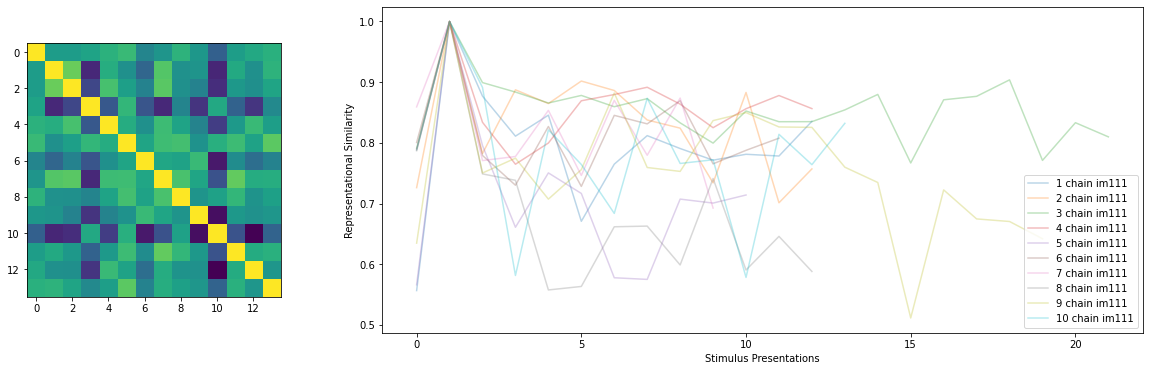

In [221]:

fig, axs = plt.subplots(1, 2, figsize=(20,6), gridspec_kw={'width_ratios': [1, 3]})

axs[0].imshow(C_chain)

for i in range(10):
    i += 1
    chain = im111_sp[im111_sp['image_chain']==float(i)]
    M_chain = M[:, chain.index]
    C_chain = np.corrcoef(np.transpose(M_chain))
    axs[1].plot(C_chain[0, :], alpha=0.3, label=f'{i} chain im111')
    #print(np.mean(C_chain[0, :]))


axs[1].set_ylabel('Representational Similarity')
axs[1].set_xlabel('Stimulus Presentations')
axs[1].legend()



# SESSION 2

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

## Getting reward, pupil, running and licking data
    
Now let's grab the reward, licking, running and pupil tracking data for this session and align them to a common time point. We'll use the time of one of the rewards to align the data.

In [104]:
#Let's get the four behavior data frames
rewards = session.rewards
eye_tracking = session.eye_tracking
running_speed = session.running_speed
licks = session.licks

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

**Reward dataframe**: The timestamps and water volumes for every reward given to the mouse. The `auto_rewarded` column is True for the first three change trials, when the reward is automatically given to the mouse to kick-start the behavior session. After that, the mouse must earn rewards by licking after a change in the reward window.

In [105]:
rewards.head()

volume  timestamps  auto_rewarded
0   0.005    44.87655           True
1   0.005    64.39291           True
2   0.005    80.90632           True
3   0.003   119.55534          False
4   0.003   130.28088          False

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Let's grab a random reward to align the rest of the behavior data to:

In [106]:
reward_time = rewards.timestamps.iloc[10]
reward_time

268.39632

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

**Running dataframe**: One entry for each read of the analog input line monitoring the encoder voltage, recorded at ~60 Hz. `speed` is in units cm/s. 

In [107]:
running_speed.head()

timestamps      speed
0    24.21123  -0.025043
1    24.22482  11.007905
2    24.24165  21.528507
3    24.25821  31.042079
4    24.27497  39.117779

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <p> Let's cut out a snippet of the running speed in a window 3 seconds before and after our <code>reward_time</code>.
</div>

In [108]:
# grab the pupil data corresponding to our window
time_before = 3.0 #how much time to plot before the reward
time_after = 3.0 #how much time to plot after the reward

#Get running data aligned to this reward
trial_running = running_speed[(running_speed['timestamps']>=reward_time-time_before)&
                              (running_speed['timestamps']< reward_time+time_after)]
trial_running

timestamps      speed
14431   265.40962  50.780766
14432   265.42609  50.373077
14433   265.44292  49.949172
14434   265.45949  49.512843
14435   265.47623  49.068668
...           ...        ...
14784   271.31433   5.457145
14785   271.33142   5.486388
14786   271.34773   5.499019
14787   271.36434   5.521121
14788   271.38115   5.572203

[358 rows x 2 columns]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <p>Now we can plot this running trace together with the reward for reference.
</div>

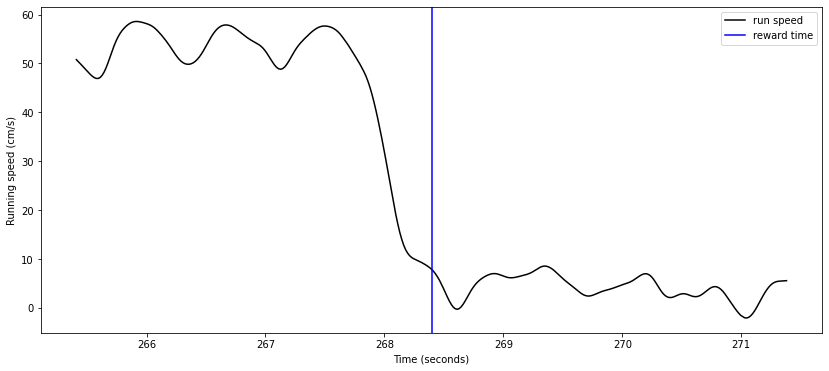

In [109]:
# plot the running
fig, ax_running = plt.subplots()
fig.set_size_inches(14,6)
ax_running.plot(trial_running['timestamps'], trial_running['speed'], 'k')

# label our axes
ax_running.set_xlabel('Time (seconds)')
ax_running.set_ylabel('Running speed (cm/s)')

# now plot the reward
ax_running.axvline(reward_time, color='b')
ax_running.legend(['run speed', 'reward time'])

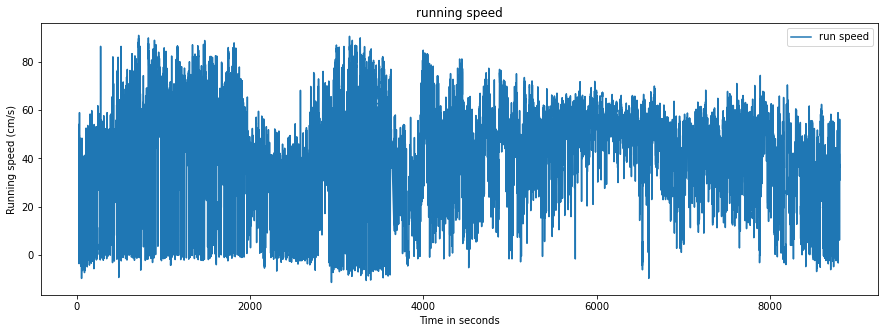

In [110]:
fig, ax = plt.subplots(figsize=(15,5))

ax.set_title(label='running speed')
ax.plot(running_speed['timestamps'], running_speed['speed'], label='run speed')

ax.set_xlabel('Time in seconds')
ax.set_ylabel('Running speed (cm/s)')
ax.legend()

In [111]:
len(running_speed), len(stimulus_presentations), running_speed, stimulus_presentations[['start_time', 'stop_time']]

(523284,
 13405,
         timestamps      speed
 0         24.21123  -0.025043
 1         24.22482  11.007905
 2         24.24165  21.528507
 3         24.25821  31.042079
 4         24.27497  39.117779
 ...            ...        ...
 523279  8802.54992  32.395234
 523280  8802.56657  32.115166
 523281  8802.58348  31.793629
 523282  8802.59993  31.430691
 523283  8802.61657  31.040701
 
 [523284 rows x 2 columns],
                             start_time    stop_time
 stimulus_presentations_id                          
 0                            25.254420    25.504632
 1                            26.005057    26.255269
 2                            26.755685    27.005892
 3                            27.506307    27.756515
 4                            28.256929    28.507142
 ...                                ...          ...
 13400                      8798.175160  8798.425372
 13401                      8798.925779  8799.175983
 13402                      8799.676402  8799.92661

In [232]:
running_speed

timestamps      speed
0         24.21123  -0.025043
1         24.22482  11.007905
2         24.24165  21.528507
3         24.25821  31.042079
4         24.27497  39.117779
...            ...        ...
523279  8802.54992  32.395234
523280  8802.56657  32.115166
523281  8802.58348  31.793629
523282  8802.59993  31.430691
523283  8802.61657  31.040701

[523284 rows x 2 columns]

In [239]:
timings_start_end = np.array(timings_start_end)
timings_start_end[:,0], timings_start_end[:,1]

(array([  80.801,  156.614,  215.18 ,  249.725,  452.395,  495.948,
         637.833,  882.555,  950.128, 1248.961, 1279.737, 1298.502,
        1314.266, 1363.807, 1411.847, 1498.937, 1543.224, 1628.061,
        1682.89 , 1876.569, 1953.9  , 2107.028, 2218.889, 2270.699,
        2317.238, 2371.283, 2425.328, 2451.617, 2594.986, 2609.999,
        2936.589, 3013.92 , 3069.467, 3106.998, 3266.165, 3354.772,
        3374.289, 3511.67 , 5250.976, 5326.789, 5385.355, 5419.901,
        5622.57 , 5666.123, 5807.958, 6052.68 , 6120.253, 6419.086,
        6449.862, 6468.628, 6484.391, 6533.932, 6581.972, 6669.062,
        6713.349, 6798.186, 6853.016, 7046.694, 7124.025, 7277.153,
        7389.014, 7440.824, 7487.362, 7541.408, 7595.453, 7621.741,
        7765.111, 7780.124, 8106.714, 8184.045, 8239.591, 8277.123,
        8436.289, 8524.897, 8544.413, 8681.794]),
 array([ 118.582,  165.872,  225.188,  267.24 ,  461.653,  504.472,
         647.091,  889.56 ,  959.402, 1263.473, 1290.496, 1306.259

In [240]:
def average_running_speed_all_stimuli(stimulus_presentations, running_speed, custom_timings=None):

    startTimes = stimulus_presentations['start_time'].to_numpy()
    endTimes = stimulus_presentations['stop_time'].to_numpy()
    if custom_timings is not None:
        startTimes = custom_timings[:,0]
        endTimes = custom_timings[:,1]

    running_timestamps = running_speed['timestamps'].to_numpy()
    speeds = running_speed['speed'].to_numpy()

    mean_running_speeds = []
    std_running_speeds = []

    for i, start in enumerate(startTimes):
        startInd = np.searchsorted(running_timestamps, start)
        endInd = np.searchsorted(running_timestamps, endTimes[i])

        mean_running_speeds.append(np.mean(speeds[startInd:endInd]))  
        std_running_speeds.append(np.std(speeds[startInd:endInd]))


    #assert len(mean_running_speeds) == len(stimulus_presentations)
    return mean_running_speeds, std_running_speeds


In [241]:
sp = stimulus_presentations[stimulus_presentations.image_name == 'im111_r']
avg_running_speed, std_running_speed = average_running_speed_all_stimuli(sp, running_speed, timings_start_end)

In [242]:
half

38

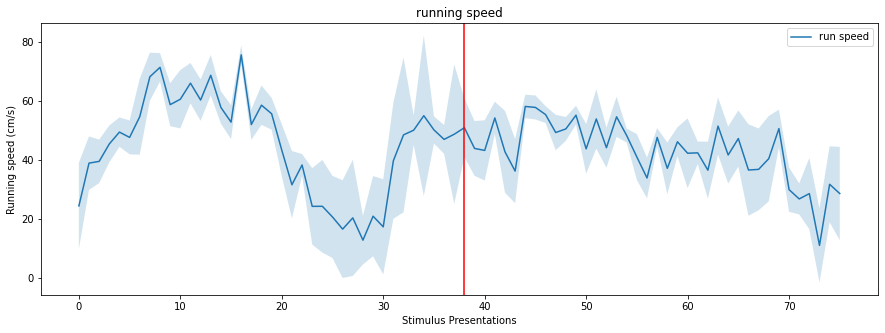

In [243]:
fig, ax = plt.subplots(figsize=(15,5))

ax.set_title(label='running speed')
ax.plot(avg_running_speed, label='run speed')
error = np.array(std_running_speed)
ax.fill_between(np.arange(len(avg_running_speed)), np.array(avg_running_speed)-error, np.array(avg_running_speed)+error, alpha=0.2)
ax.axvline(half, c='r')

ax.set_xlabel('Stimulus Presentations')
ax.set_ylabel('Running speed (cm/s)')
ax.legend()

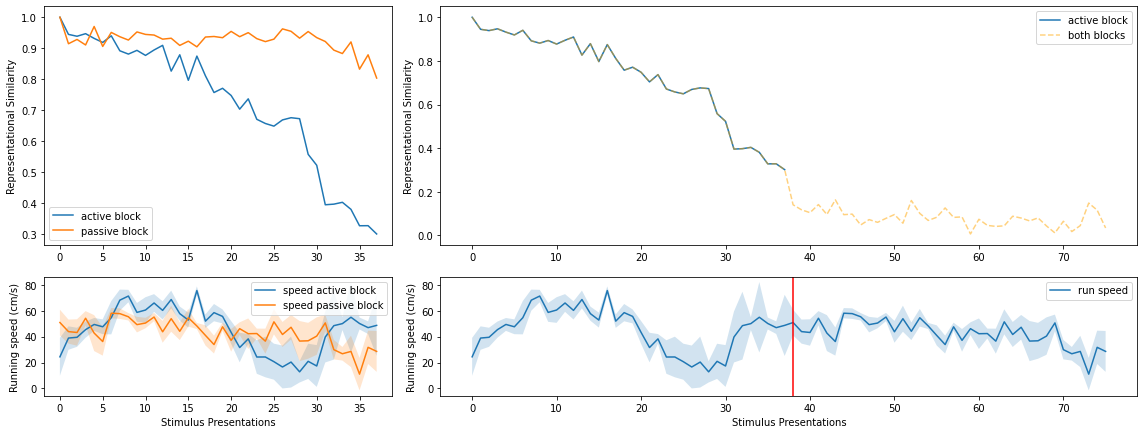

In [244]:
fig, axs = plt.subplots(2, 2, figsize=(16,6), gridspec_kw={'width_ratios': [1, 2], 'height_ratios': [2,1]})
fig.tight_layout()

error = np.array(std_running_speed)

axs[0,0].plot(C_rd_active[0,:], label='active block')           #[0, :] takes first row of matrix
axs[0,0].plot(C_rd_passive[0,:], label='passive block')
#axs[0,0].set_xlabel('stimulus presentations')
axs[0,0].set_ylabel('Representational Similarity')
axs[0,0].legend()

axs[0,1].plot(C_rd_active[0,:], label='active block')
axs[0,1].plot(C_reduced[0,:], label='both blocks', linestyle='dashed', alpha=0.5, c='orange')
#axs[0,1].set_xlabel('stimulus presentations')
axs[0,1].set_ylabel('Representational Similarity')
axs[0,1].legend()

#axs[1,0].set_title(label='running speed')
axs[1,0].plot(avg_running_speed[:half], label='speed active block')
axs[1,0].fill_between(np.arange(len(avg_running_speed[:half])), np.array(avg_running_speed[:half])-error[:half], np.array(avg_running_speed[:half])+error[:half], alpha=0.2)
axs[1,0].plot(avg_running_speed[-half:], label='speed passive block')
axs[1,0].fill_between(np.arange(len(avg_running_speed[-half:])), np.array(avg_running_speed[-half:])-error[-half:], np.array(avg_running_speed[-half:])+error[-half:], alpha=0.2)
axs[1,0].set_xlabel('Stimulus Presentations')
axs[1,0].set_ylabel('Running speed (cm/s)')
axs[1,0].legend()

#axs[1,1].set_title(label='running speed')
axs[1,1].plot(avg_running_speed, label='run speed')
axs[1,1].fill_between(np.arange(len(avg_running_speed)), np.array(avg_running_speed)-error, np.array(avg_running_speed)+error, alpha=0.2)
axs[1,1].axvline(half, c='r')
axs[1,1].set_xlabel('Stimulus Presentations')
axs[1,1].set_ylabel('Running speed (cm/s)')
axs[1,1].legend()

In [245]:
# get the hits to plot them too
im111_trials = change_trials[change_trials.change_image_name == 'im111_r']
im111_hit_trials = im111_trials[im111_trials.hit == True]
#im111_hit_trials.head(15)
#next: find actual change time?
hit_change_times_im111 = im111_hit_trials['change_time_no_display_delay']
hit_change_times_im111.to_numpy()

hit_trials = change_trials[change_trials.hit == True]
hit_change_times = hit_trials['change_time_no_display_delay'].to_numpy()
hit_change_times

# get the miss trials
miss_trials = change_trials[change_trials.miss == True]
miss_change_times = miss_trials['change_time_no_display_delay'].to_numpy()

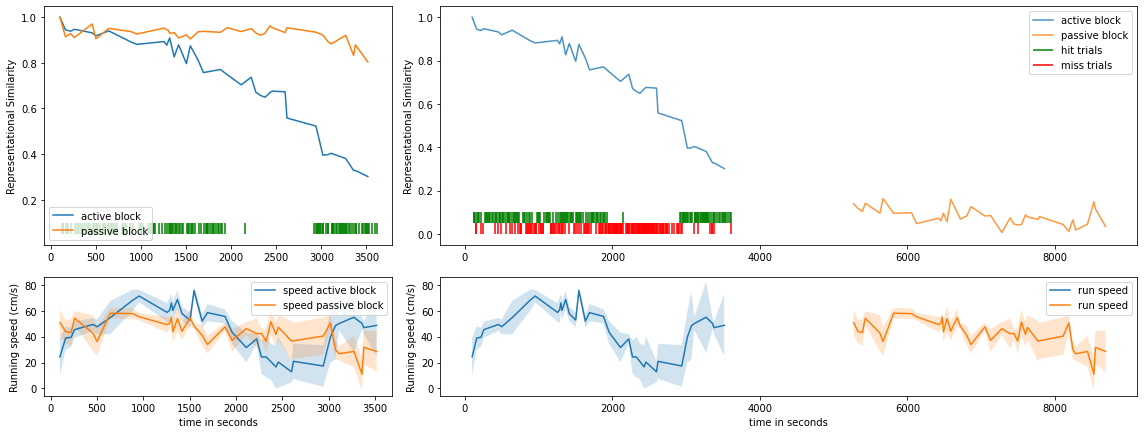

In [246]:
fig, axs = plt.subplots(2, 2, figsize=(16,6), gridspec_kw={'width_ratios': [1, 2], 'height_ratios': [2,1]})
fig.tight_layout()

error = np.array(std_running_speed)

axs[0,0].plot(timings[:half], C_rd_active[0,:], label='active block')           #[0, :] takes first row of matrix
axs[0,0].plot(timings[:half], C_rd_passive[0,:], label='passive block')
axs[0,0].vlines(hit_change_times, 0.05, 0.1, linestyles ="solid", colors ="green")
#axs[0,0].set_xlabel('stimulus presentations')
axs[0,0].set_ylabel('Representational Similarity')
axs[0,0].legend()

#axs[0,1].plot(timings, C_reduced[0,:], c='purple', alpha=0.2)
axs[0,1].vlines(hit_change_times, 0.05, 0.1, linestyles ="solid", colors ="green", label='hit trials')
axs[0,1].vlines(miss_change_times, 0.00, 0.05, linestyles ="solid", colors ="red", label='miss trials')
axs[0,1].plot(timings[:half], C_rd_active[0,:], alpha=0.8, label='active block')
axs[0,1].plot(timings[half:], across_blocks2[0,:], alpha=0.8, label='passive block')
#axs[0,1].set_xlabel('time in seconds')
axs[0,1].set_ylabel('Representational Similarity')
axs[0,1].legend()

#axs[1,0].set_title(label='running speed')
axs[1,0].plot(timings[:half], avg_running_speed[:half], label='speed active block')
axs[1,0].fill_between(timings[:half], np.array(avg_running_speed[:half])-error[:half], np.array(avg_running_speed[:half])+error[:half], alpha=0.2)
axs[1,0].plot(timings[:half], avg_running_speed[-half:], label='speed passive block')
axs[1,0].fill_between(timings[:half], np.array(avg_running_speed[-half:])-error[-half:], np.array(avg_running_speed[-half:])+error[-half:], alpha=0.2)
axs[1,0].set_xlabel('time in seconds')
axs[1,0].set_ylabel('Running speed (cm/s)')
axs[1,0].legend()

#axs[1,1].set_title(label='running speed')
axs[1,1].plot(timings[:half], avg_running_speed[:half], label='run speed')
axs[1,1].fill_between(timings[:half], np.array(avg_running_speed[:half])-error[:half], np.array(avg_running_speed[:half])+error[:half], alpha=0.2)
axs[1,1].plot(timings[half:], avg_running_speed[half:], label='run speed')
axs[1,1].fill_between(timings[half:], np.array(avg_running_speed[half:])-error[half:], np.array(avg_running_speed[half:])+error[half:], alpha=0.2)
#axs[1,1].axvline(half, c='r')
axs[1,1].set_xlabel('time in seconds')
axs[1,1].set_ylabel('Running speed (cm/s)')
axs[1,1].legend()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

**Eye tracking dataframe**: One entry containing ellipse fit parameters for the eye, pupil and corneal reflection for every frame of the eye tracking video stream. These fits are the result of a [DeepLabCut](http://www.mackenziemathislab.org/deeplabcut) model trained on these eye features.

In [247]:
eye_tracking.head()

timestamps  cr_area  eye_area  pupil_area  likely_blink  \
frame                                                            
0         1.36447      NaN       NaN         NaN          True   
1         1.38113      NaN       NaN         NaN          True   
2         1.39780      NaN       NaN         NaN          True   
3         1.41446      NaN       NaN         NaN          True   
4         1.43113      NaN       NaN         NaN          True   

       pupil_area_raw  cr_area_raw  eye_area_raw  cr_center_x  cr_center_y  \
frame                                                                        
0                 NaN          NaN           NaN          NaN          NaN   
1                 NaN          NaN           NaN          NaN          NaN   
2                 NaN          NaN           NaN          NaN          NaN   
3                 NaN          NaN           NaN          NaN          NaN   
4                 NaN          NaN           NaN          NaN          NaN   

       ...  eye_center_x  eye_center_y  eye_width  eye_height  eye_phi  \
frame  ...                                                               
0      ...           NaN           NaN        NaN         NaN      NaN   
1      ...           NaN           NaN        NaN         NaN      NaN   
2      ...           NaN           NaN        NaN         NaN      NaN   
3      ...           NaN           NaN        NaN         NaN      NaN   
4      ...           NaN           NaN        NaN         NaN      NaN   

       pupil_center_x  pupil_center_y  pupil_width  pupil_height  pupil_phi  
frame                                                                        
0                 NaN             NaN          NaN           NaN        NaN  
1                 NaN             NaN          NaN           NaN        NaN  
2                 NaN             NaN          NaN           NaN        NaN  
3                 NaN             NaN          NaN           NaN        NaN  
4                 NaN             NaN          NaN           NaN        NaN  

[5 rows x 23 columns]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

There seem to be several rows for which there are no valid data. We can use the 'likely_blink' column to filter these out. This column indicates frames where the eye or pupil failed to fit or where the z-scored value of the eye or pupil area exceeds 3. In addition, two frames before and after each such likely_blink frame are also labeled likely_blink to avoid fits to partially closed or obstructed eye images.

In [248]:
eye_tracking_noblinks = eye_tracking[~eye_tracking['likely_blink']]
eye_tracking_noblinks.head()

timestamps     cr_area      eye_area    pupil_area  likely_blink  \
frame                                                                     
18        1.68114  124.496878  80242.785195  16745.289582         False   
19        1.69781  123.635359  79751.038277  16714.291578         False   
20        1.71446  126.786150  80047.938510  17011.966515         False   
21        1.73113  125.499820  80455.812438  16980.668668         False   
22        1.74780  125.322643  80325.325277  17062.517640         False   

       pupil_area_raw  cr_area_raw  eye_area_raw  cr_center_x  cr_center_y  \
frame                                                                        
18       16745.289582   124.496878  80242.785195   319.022720   250.040195   
19       16714.291578   123.635359  79751.038277   319.495616   250.370579   
20       17011.966515   126.786150  80047.938510   319.370721   250.517232   
21       16980.668668   125.499820  80455.812438   319.460923   250.304993   
22       17062.517640   125.322643  80325.325277   318.788323   249.441627   

       ...  eye_center_x  eye_center_y   eye_width  eye_height   eye_phi  \
frame  ...                                                                 
18     ...    299.845062    243.459515  170.130669  150.132084 -0.117730   
19     ...    300.310986    243.292274  169.847920  149.460434 -0.097911   
20     ...    300.324160    243.947900  169.934887  149.940078 -0.087952   
21     ...    300.694063    243.883540  170.484281  150.218427 -0.088550   
22     ...    300.010309    243.120696  170.311250  150.127165 -0.108505   

       pupil_center_x  pupil_center_y  pupil_width  pupil_height  pupil_phi  
frame                                                                        
18         314.825135      228.266183    73.008159     68.378221   0.394571  
19         314.511686      228.197930    72.940553     67.705300   0.428495  
20         314.455601      228.205356    73.587208     68.166068   0.423260  
21         314.077673      228.185581    73.519485     67.545130   0.460218  
22         314.283247      227.043133    73.696459     67.493397   0.442226  

[5 rows x 23 columns]

In [249]:
eye_track = eye_tracking_noblinks[['timestamps', 'pupil_area']]
eye_track

timestamps    pupil_area
frame                           
18         1.68114  16745.289582
19         1.69781  16714.291578
20         1.71446  17011.966515
21         1.73113  16980.668668
22         1.74780  17062.517640
...            ...           ...
570968  9517.30376  16003.929728
570969  9517.32043  16443.148002
570970  9517.33710  15717.832202
570971  9517.35375  15174.983922
570972  9517.37042  15145.960196

[540200 rows x 2 columns]

In [252]:
def average_pupil_area_all_stimuli(stimulus_presentations, pupil_area, custom_timings=None):

    startTimes = stimulus_presentations['start_time'].to_numpy()
    endTimes = stimulus_presentations['stop_time'].to_numpy()
    if custom_timings.any():
        startTimes = custom_timings[:,0]
        endTimes = custom_timings[:,1]

    pupil_timestamps = pupil_area['timestamps'].to_numpy()
    area = pupil_area['pupil_area'].to_numpy()

    mean_pupil_areas = []
    std_pupil_areas = []

    for i, start in enumerate(startTimes):
        startInd = np.searchsorted(pupil_timestamps, start)
        endInd = np.searchsorted(pupil_timestamps, endTimes[i])

        mean_pupil_areas.append(np.mean(area[startInd:endInd]))  
        std_pupil_areas.append(np.std(area[startInd:endInd]))


    #assert len(mean_running_speeds) == len(stimulus_presentations)
    return mean_pupil_areas, std_pupil_areas

In [256]:
#sp = stimulus_presentations[stimulus_presentations.image_name == 'im111_r']
avg_pupil_area, std_pupil_area = average_pupil_area_all_stimuli(sp, eye_track, timings_start_end)

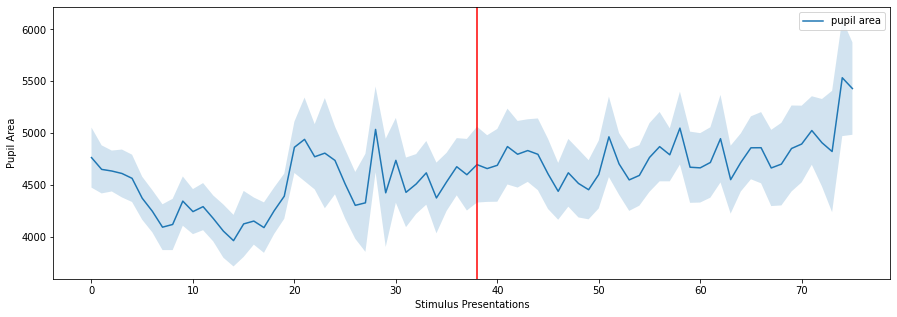

In [258]:
fig, ax = plt.subplots(figsize=(15,5))

#ax.set_title(label='pupil')
ax.plot(avg_pupil_area, label='pupil area')
error = np.array(std_pupil_area)
ax.fill_between(np.arange(len(avg_pupil_area)), np.array(avg_pupil_area)-error, np.array(avg_pupil_area)+error, alpha=0.2)
ax.axvline(half, c='r')

ax.set_xlabel('Stimulus Presentations')
ax.set_ylabel('Pupil Area')
ax.legend()

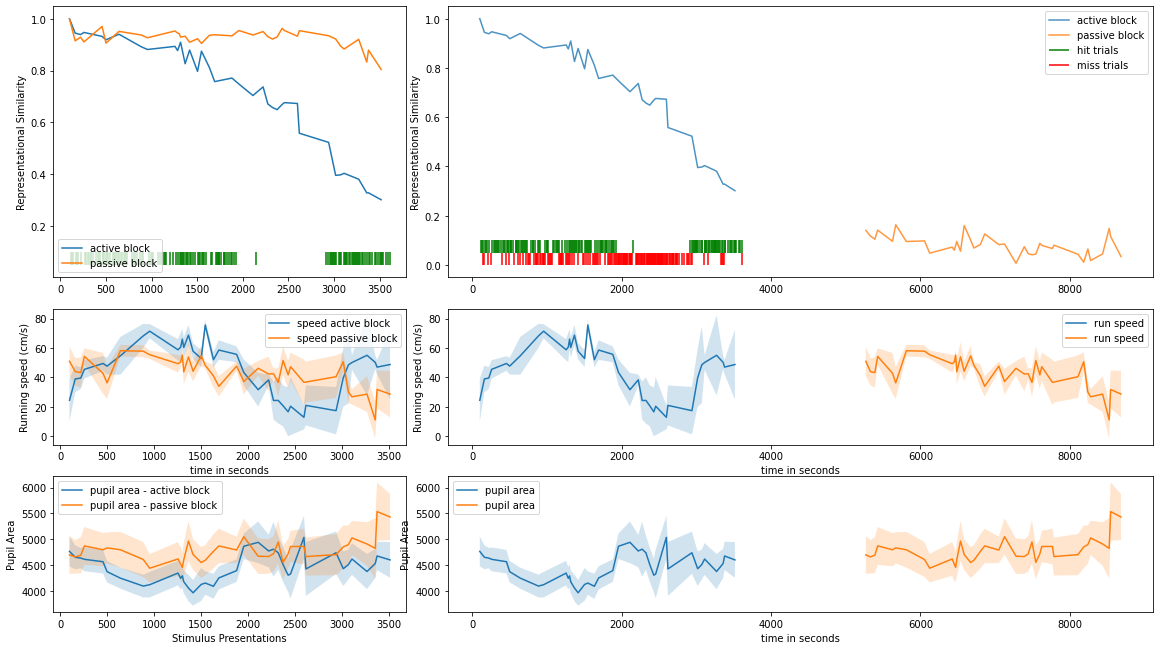

In [264]:
fig, axs = plt.subplots(3, 2, figsize=(16,9), gridspec_kw={'width_ratios': [1, 2], 'height_ratios': [2,1,1]})
fig.tight_layout()

error = np.array(std_running_speed)

axs[0,0].plot(timings[:half], C_rd_active[0,:], label='active block')           #[0, :] takes first row of matrix
axs[0,0].plot(timings[:half], C_rd_passive[0,:], label='passive block')
axs[0,0].vlines(hit_change_times, 0.05, 0.1, linestyles ="solid", colors ="green")
#axs[0,0].set_xlabel('stimulus presentations')
axs[0,0].set_ylabel('Representational Similarity')
axs[0,0].legend()

#axs[0,1].plot(timings, C_reduced[0,:], c='purple', alpha=0.2)
axs[0,1].vlines(hit_change_times, 0.05, 0.1, linestyles ="solid", colors ="green", label='hit trials')
axs[0,1].vlines(miss_change_times, 0.00, 0.05, linestyles ="solid", colors ="red", label='miss trials')
axs[0,1].plot(timings[:half], C_rd_active[0,:], alpha=0.8, label='active block')
axs[0,1].plot(timings[half:], across_blocks2[0,:], alpha=0.8, label='passive block')
#axs[0,1].set_xlabel('time in seconds')
axs[0,1].set_ylabel('Representational Similarity')
axs[0,1].legend()

#axs[1,0].set_title(label='running speed')
axs[1,0].plot(timings[:half], avg_running_speed[:half], label='speed active block')
axs[1,0].fill_between(timings[:half], np.array(avg_running_speed[:half])-error[:half], np.array(avg_running_speed[:half])+error[:half], alpha=0.2)
axs[1,0].plot(timings[:half], avg_running_speed[-half:], label='speed passive block')
axs[1,0].fill_between(timings[:half], np.array(avg_running_speed[-half:])-error[-half:], np.array(avg_running_speed[-half:])+error[-half:], alpha=0.2)
axs[1,0].set_xlabel('time in seconds')
axs[1,0].set_ylabel('Running speed (cm/s)')
axs[1,0].legend()

#axs[1,1].set_title(label='running speed')
axs[1,1].plot(timings[:half], avg_running_speed[:half], label='run speed')
axs[1,1].fill_between(timings[:half], np.array(avg_running_speed[:half])-error[:half], np.array(avg_running_speed[:half])+error[:half], alpha=0.2)
axs[1,1].plot(timings[half:], avg_running_speed[half:], label='run speed')
axs[1,1].fill_between(timings[half:], np.array(avg_running_speed[half:])-error[half:], np.array(avg_running_speed[half:])+error[half:], alpha=0.2)
#axs[1,1].axvline(half, c='r')
axs[1,1].set_xlabel('time in seconds')
axs[1,1].set_ylabel('Running speed (cm/s)')
axs[1,1].legend()


error2 = np.array(std_pupil_area)

axs[2,0].plot(timings[:half], avg_pupil_area[:half], label='pupil area - active block')
axs[2,0].fill_between(timings[:half], np.array(avg_pupil_area[:half])-error2[:half], np.array(avg_pupil_area[:half])+error2[:half], alpha=0.2)
axs[2,0].plot(timings[:half], avg_pupil_area[-half:], label='pupil area - passive block')
axs[2,0].fill_between(timings[:half], np.array(avg_pupil_area[-half:])-error2[-half:], np.array(avg_pupil_area[-half:])+error2[-half:], alpha=0.2)
axs[2,0].set_xlabel('Stimulus Presentations')
axs[2,0].set_ylabel('Pupil Area')
axs[2,0].legend()


axs[2,1].plot(timings[:half], avg_pupil_area[:half], label='pupil area')
axs[2,1].fill_between(timings[:half], np.array(avg_pupil_area[:half])-error2[:half], np.array(avg_pupil_area[:half])+error2[:half], alpha=0.2)
axs[2,1].plot(timings[half:], avg_pupil_area[half:], label='pupil area')
axs[2,1].fill_between(timings[half:], np.array(avg_pupil_area[half:])-error2[half:], np.array(avg_pupil_area[half:])+error2[half:], alpha=0.2)
axs[2,1].set_xlabel('time in seconds')
axs[2,1].set_ylabel('Pupil Area')
axs[2,1].legend()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    <p><b>Task 5.1:</b>  Grab the pupil area data from <code>eye_tracking_noblinks</code> in the same window around our reward time as we did for the running. Plot it as we did the running.
</div>

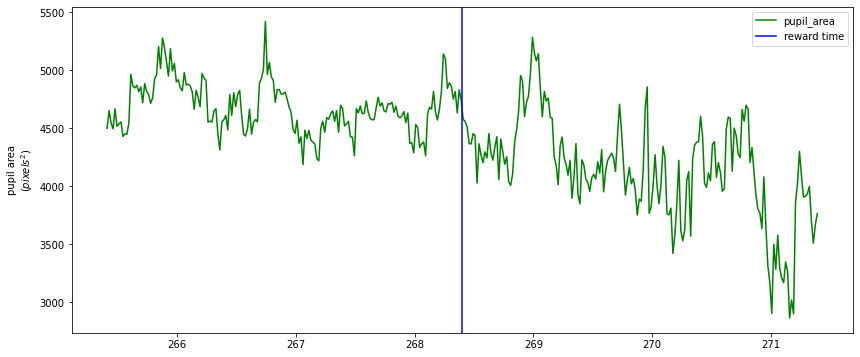

In [169]:
# First make a dataframe to store the eye tracking data in our time window
trial_eye_tracking_data = ?

# Now plot the pupil_area column for this dataframe. Use the timestamps column for your x values


# now plot the reward as we did above on our running plot


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

**Licking dataframe**: One entry for every detected lick onset time.

In [78]:
licks.head()

timestamps  frame
0    25.72309     91
1    25.85921    100
2    28.01198    229
3    32.39186    491
4    35.52050    679

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    <p><b>Task 5.2:</b> Now plot the licking data in this window. Plot the licks as magenta dots with 0 for the y coord. </div>

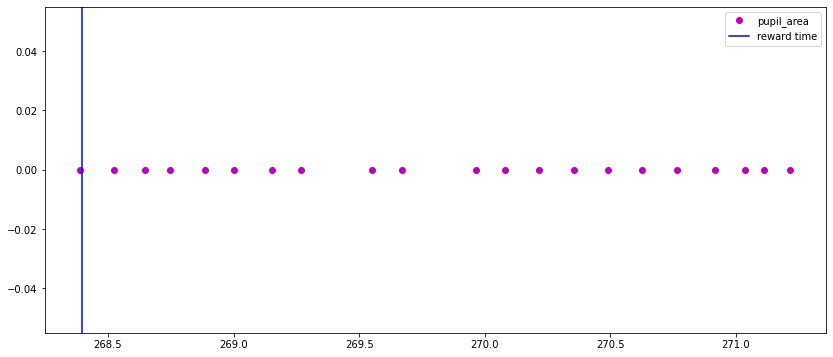

In [170]:
#Get licking aligned to this reward
trial_licking = ?

# plot it


# now plot the reward


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Below, we'll put all of these plots together, and add bars to denote the stimulus presentation times:

Text(0.5, 1.0, 'Single trial change-aligned running speed, pupil size, licks, and rewards')

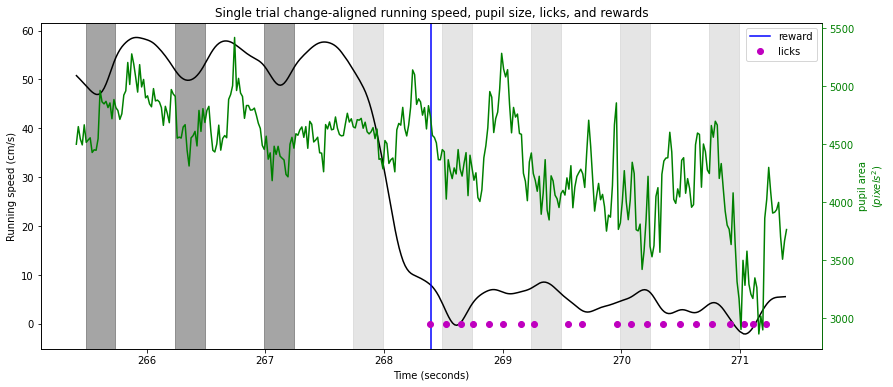

In [173]:
# Plot the running
fig, ax_running = plt.subplots()
fig.set_size_inches(14,6)
ax_running.plot(trial_running['timestamps'], trial_running['speed'], 'k')

# now plot the reward
rew_handle = ax_running.axvline(reward_time, color='b')

# label our axes
ax_running.set_xlabel('Time (seconds)')
ax_running.set_ylabel('Running speed (cm/s)')

# Plot the pupil area on a new axis with the same x-axis as the running data
ax_pupil = ax_running.twinx()
ax_pupil.plot(trial_eye_tracking_data['timestamps'], trial_eye_tracking_data['pupil_area'], 'g')
ax_pupil.set_ylabel('pupil area\n$(pixels^2)$')

# format the pupil axis to match the plot color
ax_pupil.yaxis.label.set_color('g')
ax_pupil.spines['right'].set_color('g')
ax_pupil.tick_params(axis='y', colors='g')

# Plot the licking. Just use the running axis.
lick_handle, = ax_running.plot(trial_licking['timestamps'], np.zeros(len(trial_licking['timestamps'])), 'mo')


#Now add a legend to label the reward and licks
ax_running.legend([rew_handle, lick_handle], ['reward', 'licks'])


#Plot the image flashes as grey bars. 
#Get stimulus presentations around this reward
behavior_presentations = stimulus_presentations[stimulus_presentations['active']]
trial_stimuli = behavior_presentations[(behavior_presentations['start_time']>=reward_time-time_before)&
                      (behavior_presentations['start_time'] < reward_time+time_after)]

#Specify different colors for the 2 images shown in this window
colors = ['0.3', '0.8']
stimulus_colors = {stim: c for stim,c in zip(trial_stimuli['image_name'].unique(), colors)}
for idx, stimulus in trial_stimuli.iterrows():
    ax_running.axvspan(stimulus['start_time'], stimulus['stop_time'], color=stimulus_colors[stimulus['image_name']], alpha=0.5)
    
ax_running.set_title('Single trial change-aligned running speed, pupil size, licks, and rewards')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

## How does novelty impact visual responsiveness in VISp?

### Plotting visual responses to novel and familiar images
    
Below, we'll try to answer whether units in VISp are modulated by stimulus novelty. First we'll need a way to identify which images are novel to the mouse.

Image novelty depends on whether a mouse has previously encountered an image during training. Even in the novel image set, 2 images are shared with the training set and therefore familiar. Moreover, some mice train with image set `G` and some with image set `H`, meaning which images are novel depends on all these factors. This can be tricky to sort out, so we have provided a convenient function that will add columns to the stimulus presentations table that indicate which image set a particular image is from (unique to `G`, unique to `H` or shared across both image sets), along with whether it was novel to the mouse during that session.

In [79]:
def getImageNovelty(image_name, sessionID, ecephys_sessions_table):
    '''
    Function to help annotate the stimulus_presentations table
    to indicate the following info:
        1) whether a given image was:
            a) unique to the G set
            b) unique to the H set
            c) shared across G and H
            d) omitted
        2) whether the image was novel to the mouse
    
    Meant to be run on the image names of the stimulus_presentations table
    
    OUTPUT:
        Tuple indicating (image_set, image_novelty) for this image

    '''
    session_id = session.metadata['ecephys_session_id']
    is_novel_image_set = ecephys_sessions_table.loc[session_id]['experience_level'] == 'Novel'

    IMAGE_GROUP_KEY={
                'G' : ['im012_r', 'im036_r', 'im044_r', 
                    'im047_r', 'im078_r', 'im115_r'],
                'H' : ['im005_r', 'im024_r', 'im034_r', 
                    'im087_r', 'im104_r', 'im114_r'],
                'shared' : ['im083_r', 'im111_r'],
                'omitted' : ['omitted']
                }
    
    # First check that this image is one of the Natural Images used
    image_in_image_set = any([np.isin(image_name, imset) \
                              for _,imset in IMAGE_GROUP_KEY.items()]) 
    if not image_in_image_set:
        return np.nan

    #Get the image set for this image
    image_set_for_this_image = [name for name, image_set in IMAGE_GROUP_KEY.items()\
                                if image_name in image_set][0]
    
    #Get the image novelty for this image
    if image_set_for_this_image == 'omitted':
        novelty_for_this_image = np.nan
    else:
        novelty_for_this_image = (is_novel_image_set) and \
                            (np.isin(image_set_for_this_image, ['G', 'H']))
    

    return bool(novelty_for_this_image)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now let's apply that function to our stimulus_presentations table and add the new columns indicating image novelty

In [80]:
is_novel = []
for rowindex, row in stimulus_presentations.iterrows():
    is_this_image_novel = getImageNovelty(row['image_name'], session_id, ecephys_sessions_table)
    is_novel.append(is_this_image_novel)

stimulus_presentations['is_novel'] = is_novel

/opt/anaconda3/envs/allensdk_38/lib/python3.8/site-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

**Note**: we could also do this by using pandas apply:

In [81]:
is_novel = stimulus_presentations.apply(lambda row: getImageNovelty(row['image_name'], session_id, ecephys_sessions_table), axis=1)  
stimulus_presentations['is_novel'] = is_novel

/opt/anaconda3/envs/allensdk_38/lib/python3.8/site-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [82]:
stimulus_presentations[120:130][['is_novel', 'image_name']]

is_novel image_name
stimulus_presentations_id                    
120                          False    im111_r
121                          False    im111_r
122                          False    im111_r
123                          False    im111_r
124                          False    im111_r
125                           True    im104_r
126                           True    im104_r
127                           True    im104_r
128                           True    im104_r
129                           True    im104_r

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    <p><b>Task 6.1:</b> Grab the active behavior portion of this updated stimulus table. Call the new table <code>task_stim_table</code>
</div>

In [83]:
#Grab the portion of the stim table that describes the active behavior stimuli
task_stim_table = ?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
This table stores all of the stimulus info we'll need to make our PSTHs for novel and familiar change stimuli. Now we'll need to get the unit spiking data and organize it into a useful format.  
  
<p>
<p>For this (and other) analyses, organizing the data into a 3D array can make things much more convenient. This 3D array will have shape (neurons, trial time, trials) and will store the spike counts for every neuron and time bin in every trial. For our purposes, we will define a trial as an image presentation (ie, every flash in the stim table will be one 'trial' for our array). So our array will be of shape (neurons in V1, flash time, number of image flashes).

<img src="https://brainmapportal-live-4cc80a57cd6e400d854-f7fdcae.divio-media.net/filer_public/8e/45/8e4554f8-029f-43dd-badd-32d77d48898a/tensor_diagram.png"
     width="400" 
     height="500" />
     
Williams et al. (2018). Neuron, 98(6): 1099-1115

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

To make this 3D array, first we'll need to get the spike times for VISp units during this experiment:

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    <p><b>Task 6.2:</b> Filter the units dataframe for only good units. Use the following quality criteria:
            <p> &emsp; 1) <code>quality</code> == 'good'
            <p> &emsp; 2) <code>snr</code> > 1
            <p> &emsp; 3) <code>isi_violations</code> < 1  
            <p> Call this new dataframe <code>good_units</code>                                    
</div>

In [84]:
# Filter units by the quality criteria
good_units = ?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now let's grab the good units in VISp by filtering on the structure_acronym column

In [85]:
visp_units = good_units[good_units['structure_acronym']=='VISp']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

We've provided a function to help make our 3D array. Let's look at it below:

In [86]:
def make_neuron_time_trials_array(units, spike_times, stim_table, 
                                   time_before, trial_duration,
                                   bin_size=0.001):
    '''
    Function to make a 3D array with dimensions [neurons, time bins, trials] to store
    the spike counts for stimulus presentation trials. 
    INPUTS:
        units: dataframe with unit info (same form as session.units table)
        stim_table: dataframe whose indices are trial ids and containing a
            'start_time' column indicating when each trial began
        time_before: seconds to take before each start_time in the stim_table
        trial_duration: total time in seconds to take for each trial
        bin_size: bin_size in seconds used to bin spike counts 
    OUTPUTS:
        unit_array: 3D array storing spike counts. The value in [i,j,k] 
            is the spike count for neuron i at time bin j in the kth trial.
        time_vector: vector storing the trial timestamps for the time bins
    '''
    # Get dimensions of output array
    neuron_number = len(units)
    trial_number = len(stim_table)
    num_time_bins = int(trial_duration/bin_size)
    
    # Initialize array
    unit_array = np.zeros((neuron_number, num_time_bins, trial_number))
    
    # Loop through units and trials and store spike counts for every time bin
    for u_counter, (iu, unit) in enumerate(units.iterrows()):
        
        # grab spike times for this unit
        unit_spike_times = spike_times[iu]
        
        # now loop through trials and make a PSTH for this unit for every trial
        for t_counter, (it, trial) in enumerate(stim_table.iterrows()):
            trial_start = trial.start_time - time_before
            unit_array[u_counter, :, t_counter] = makePSTH(unit_spike_times, 
                                                            [trial_start], 
                                                            trial_duration, 
                                                            binSize=bin_size)[0]
    
    # Make the time vector that will label the time axis
    time_vector = np.arange(num_time_bins)*bin_size - time_before
    
    return unit_array, time_vector

In [87]:
#Make 3D data array
time_before_flash = 1.0
trial_duration = 2.0
bin_size = 0.001
flash_stim_array, time = make_neuron_time_trials_array(visp_units, spike_times,
                                                       task_stim_table, time_before_flash, 
                                                       trial_duration)

In [88]:
flash_stim_array.shape

(49, 2000, 4804)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now let's use our 3D array to find the change responses to novel and familiar images. We'll do this by: 

1) finding the trial ids for our trials of interest, and  
    2) Using those ids to index the 'trials' dimension of <code>flash_stim_array</code>


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    <p><b>Task 6.3:</b> Get the trial ids for the famliar and novel image changes. We'll need to:
       <p>&emsp; 1) Filter the <code>task_stim_table</code> for changes (using <code>is_change</code>)
       <p>&emsp; 2) Find the novel and familiar changes (using our new <code>is_novel</code> column). Store these in two new dataframes called <code>novel_change_flashes</code> and <code>familiar_change_flashes</code> 
       <p>&emsp; 3) Find the indices in our 3D array that correspond to the novel/familiar change stimuli
           
</div>

In [89]:
# Filter the task_stim_table for change stimuli
change_flashes = task_stim_table[?]

In [90]:
# make the novel_changes and familiar_changes dataframes
novel_change_flashes = change_flashes[?]
familiar_change_flashes = change_flashes[?]

In [91]:
# Find indices for novel and familiar change flashes in our 3D array
novel_flash_ids = ? #Hint: These should be the index values or the novel_change_flashes dataframe
novel_array_indices = task_stim_table.index.get_indexer(novel_flash_ids)

familiar_flash_ids = ?
familiar_array_indices = task_stim_table.index.get_indexer(familiar_flash_ids)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now we can use these indices to plot the PSTHs across V1 for familiar and novel change stimuli!


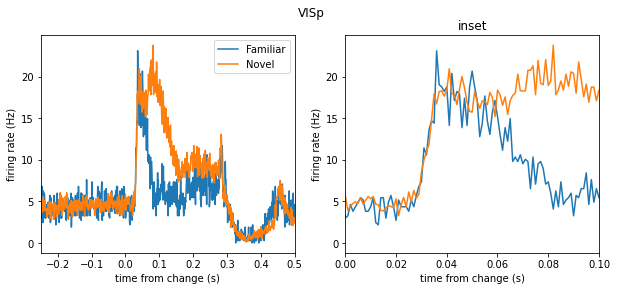

In [92]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches([10, 4])
fig.suptitle('VISp')

# Loop through our familiar and novel array indices
for array_flash_indices in [familiar_array_indices, novel_array_indices]:
    
    # Use these indices to select the corresponding data from our data array
    relevant_trials = flash_stim_array[:, :, array_flash_indices]
    
    # We can use numpy mean to average over units and trials (the 0th and 2nd dimension of our array)
    mean_over_neurons_trials = np.mean(relevant_trials, axis=(0, 2))
    
    # Now plot. We're plotting twice to show two time scales.
    xlims = ([-0.25, 0.5], [0, 0.1])
    for ax, xlim in zip(axes, xlims):
        ax.plot(time, mean_over_neurons_trials)
        ax.set_xlim(xlim)
        ax.set_xlabel('time from change (s)')
        ax.set_ylabel('firing rate (Hz)')

axes[1].set_title('inset')
axes[0].legend(['Familiar', 'Novel'])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

# How does novelty impact mouse behavior?
    
It looks like novelty can have a pretty dramatic impact on VISp visual responses. What about the behavior of the mouse? Let's calculate hit rates for novel and familiar changes during this session.
    
## Calculating hit rates for novel and familiar images
    
Let's use the trials table to calculate the hit rates for the novel and familiar images. First, we'll need to annotate the trials dataframe so we know which trials had novel and familiar change stimuli.

In [93]:
#First, let's annotate the trials by the novelty of their change image using the getImageNovelty function
is_novel = trials.apply(lambda row: getImageNovelty(row['change_image_name'], session_id, 
                                                    ecephys_sessions_table), axis=1)

trials['is_novel_change_image'] = is_novel

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    <p><b>Task 7.1:</b> Filter the trials table for <code>go</code> trials, since these are the ones with change stimuli. Call the new dataframe <code>go_trials</code>.
           
</div>

In [94]:
go_trials = ?

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    <p><b>Task 7.2:</b> Use the <code>groupby</code> method on the <code>change_image_name</code> column to:
       <p> 1) count the total number of go trials for each image
       <p> 2) count the total number of hits for each image
    <p> You can accomplish both of these with one line. It will look like:
    <p> <code>go_trials.groupby(?).agg(?)</code>
    <p> What column name should go in the first '?'
    <p> What function should go in the second '?'
    <p> Store the results in a dataframe called <code>image_go_data</code>
           
</div>

In [95]:
image_go_data = go_trials.groupby(?).agg(?)
image_go_data

start_time    stop_time  stimulus_change  \
change_image_name                                              
im005_r            66278.31651  66601.42743               37   
im024_r            70498.11635  70821.67676               38   
im034_r            61094.10692  61403.95666               36   
im083_r            67113.28172  67418.37764               37   
im087_r            66328.95456  66630.59603               36   
im104_r            73963.47882  74310.99703               38   
im111_r            68966.89556  69298.28168               37   
im114_r            63861.33726  64176.40990               36   

                   change_time_no_display_delay  go  catch  response_time  \
change_image_name                                                           
im005_r                             66443.48397  37      0    42653.39982   
im024_r                             70659.51601  38      0    42258.99858   
im034_r                             61250.28807  36      0    37536.47135   
im083_r                             67260.43538  37      0    10239.68140   
im087_r                             66476.87455  36      0    38704.83252   
im104_r                             74148.90177  38      0    53014.26438   
im111_r                             69140.35637  37      0    18331.06582   
im114_r                             64022.77149  36      0    29520.72484   

                   reward_time  reward_volume  hit  false_alarm  miss  \
change_image_name                                                       
im005_r            39849.35887          0.066   22            0    15   
im024_r            36948.48343          0.066   22            0    16   
im034_r            34718.01143          0.072   24            0    12   
im083_r             7313.64286          0.015    5            0    32   
im087_r            32105.18421          0.057   19            0    17   
im104_r            49252.35657          0.075   25            0    13   
im111_r            15800.14059          0.015    5            0    32   
im114_r            24792.64106          0.051   17            0    19   

                   correct_reject  aborted  auto_rewarded  change_frame  \
change_image_name                                                         
im005_r                         0        0              0     3929475.0   
im024_r                         0        0              0     4180774.0   
im034_r                         0        0              0     3619610.0   
im083_r                         0        0              0     3978451.0   
im087_r                         0        0              0     3932931.0   
im104_r                         0        0              0     4389965.0   
im111_r                         0        0              0     4091158.0   
im114_r                         0        0              0     3785808.0   

                   trial_length  is_novel_change_image  
change_image_name                                       
im005_r               323.11092                     37  
im024_r               323.56041                     38  
im034_r               309.84974                     36  
im083_r               305.09592                      0  
im087_r               301.64147                     36  
im104_r               347.51821                     38  
im111_r               331.38612                      0  
im114_r               315.07264                     36

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
As you can see, many of these columns aren't very meaningful. Let's select only the <code>stimulus_change</code>, <code>hit</code> and <code>is_novel_change_image</code> columns to make this dataframe easier to work with:

In [96]:
image_go_data = image_go_data[['stimulus_change', 'hit', 'is_novel_change_image']]
image_go_data

stimulus_change  hit  is_novel_change_image
change_image_name                                             
im005_r                         37   22                     37
im024_r                         38   22                     38
im034_r                         36   24                     36
im083_r                         37    5                      0
im087_r                         36   19                     36
im104_r                         38   25                     38
im111_r                         37    5                      0
im114_r                         36   17                     36

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Let's clean this dataframe up a bit by setting all of the rows with <code>is_novel_change_image</code>>0 to <code>True</code> and <code>is_novel_change_image</code>==0 to <code>False</code>
</div>

In [97]:
image_go_data.loc[image_go_data['is_novel_change_image']>0, 'is_novel_change_image'] = True
image_go_data.loc[image_go_data['is_novel_change_image']==0, 'is_novel_change_image'] = False

/var/folders/7s/q3zz_qj910x07vwrdqkcgczr0000gp/T/ipykernel_65346/1593584136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_go_data.loc[image_go_data['is_novel_change_image']>0, 'is_novel_change_image'] = True


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    <p><b>Task 7.3:</b> Use this new table to calculate the hit rates for every image. Store these in a new column called <code>hit_rate</code>.
</div>

In [98]:
hit_rates = ?
image_go_data['hit_rate'] = hit_rates

/var/folders/7s/q3zz_qj910x07vwrdqkcgczr0000gp/T/ipykernel_65346/1506095693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_go_data['hit_rate'] = hit_rates


In [99]:
# We can display the results with cells color-coded by their hit rate to make it easier to see what's going on here
display(image_go_data.style.background_gradient(cmap='bwr', subset='hit_rate'))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Now let's plot this data. 
</div>

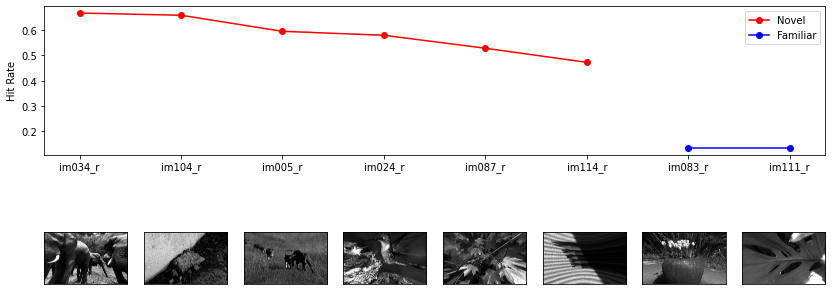

In [100]:
fig = plt.figure()
fig.set_size_inches(14, 6)
gs = GridSpec(2, 8, figure=fig)

hit_rate_ax = fig.add_subplot(gs[0, :])
colors = ['r', 'b']
image_order = []
for isnovel, color in zip([True, False], colors):
    rows = image_go_data[image_go_data['is_novel_change_image']==isnovel]
    rows = rows.sort_values('hit_rate', ascending=False)
    
    hit_rates = rows['hit_rate']
    hit_rate_ax.plot(hit_rates, color+'o-')
    
    image_order.extend(rows.index.values)
    
hit_rate_ax.set_ylabel('Hit Rate')
hit_rate_ax.legend(['Novel', 'Familiar'])

# Let's add the images themselves under each dot.    
for ind, im in enumerate(image_order):
    im_ax = fig.add_subplot(gs[1, ind])
    im_ax.imshow(session.stimulus_templates['warped'][im], cmap='gray')
    im_ax.axes.xaxis.set_visible(False)
    im_ax.axes.yaxis.set_visible(False)
